In [ ]:
import pandas as pd

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
import pandas as pd
pd.options.display.max_columns=None
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import csv
import psycopg2
import pickle as pk

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt  # Ensure matplotlib is also imported


# About Dataset

## CONTEXT
The market for used and refurbished devices has expanded significantly over the past ten years as a result of the availability of affordable options to consumers and businesses seeking to save costs when making a purchase. Increasing a device's lifespan through used-goods trading also lessens its influence on the environment, aids in recycling, and decreases waste. Here is a sample dataset of prices for new and used equipment that have been reconditioned or used.

## OBJECTIVE  
The objective is to do Exploratory Data Analytics and apply Linear Regression to create a model which can help in pricing of such devices.
## Variables  
__device_brand__: Name of manufacturing brand  
__os__: OS on which the device runs  
__screen_size__: Size of the screen in cm  
__4g__: Whether 4G is available or not  
__5g__: Whether 5G is available or not  
__front_camera_mp__: Resolution of the rear camera in megapixels  
__back_camera_mp__: Resolution of the front camera in megapixels  
__internal_memory__: Amount of internal memory (ROM) in GB  
__ram__: Amount of RAM in GB  
__battery__: Energy capacity of the device battery in mAh  
__weight__: Weight of the device in grams  
__release_year__: Year when the device model was released  
__days_used__: Number of days the used/refurbished device has been used  
__normalized_new_price__: Normalized price of a new device of the same model  
__normalized_used_price (TARGET)__: Normalized price of the used/refurbished device  

# Importing libraries

# Connecting PostgreSQL with Python

In [ ]:
df=pd.read_csv(r'/content/used_device_data.csv')

# Getting data

In [ ]:
data = pd.read_csv("used_device_data.csv")


# Initial Review

In [ ]:
data.head()

device_brand       os  screen_size   4g   5g  rear_camera_mp  \
0        Honor  Android        14.50  yes   no            13.0   
1        Honor  Android        17.30  yes  yes            13.0   
2        Honor  Android        16.69  yes  yes            13.0   
3        Honor  Android        25.50  yes  yes            13.0   
4        Honor  Android        15.32  yes   no            13.0   

   front_camera_mp  internal_memory  ram  battery  weight  release_year  \
0              5.0             64.0  3.0   3020.0   146.0          2020   
1             16.0            128.0  8.0   4300.0   213.0          2020   
2              8.0            128.0  8.0   4200.0   213.0          2020   
3              8.0             64.0  6.0   7250.0   480.0          2020   
4              8.0             64.0  3.0   5000.0   185.0          2020   

   days_used  normalized_used_price  normalized_new_price  
0        127               4.307572              4.715100  
1        325               5.162097              5.519018  
2        162               5.111084              5.884631  
3        345               5.135387              5.630961  
4        293               4.389995              4.947837

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.describe()

screen_size  rear_camera_mp  front_camera_mp  internal_memory  \
count  3454.000000     3275.000000      3452.000000      3450.000000   
mean     13.713115        9.460208         6.554229        54.573099   
std       3.805280        4.815461         6.970372        84.972371   
min       5.080000        0.080000         0.000000         0.010000   
25%      12.700000        5.000000         2.000000        16.000000   
50%      12.830000        8.000000         5.000000        32.000000   
75%      15.340000       13.000000         8.000000        64.000000   
max      30.710000       48.000000        32.000000      1024.000000   

               ram      battery       weight  release_year    days_used  \
count  3450.000000  3448.000000  3447.000000   3454.000000  3454.000000   
mean      4.036122  3133.402697   182.751871   2015.965258   674.869716   
std       1.365105  1299.682844    88.413228      2.298455   248.580166   
min       0.020000   500.000000    69.000000   2013.000000    91.000000   
25%       4.000000  2100.000000   142.000000   2014.000000   533.500000   
50%       4.000000  3000.000000   160.000000   2015.500000   690.500000   
75%       4.000000  4000.000000   185.000000   2018.000000   868.750000   
max      12.000000  9720.000000   855.000000   2020.000000  1094.000000   

       normalized_used_price  normalized_new_price  
count            3454.000000           3454.000000  
mean                4.364712              5.233107  
std                 0.588914              0.683637  
min                 1.536867              2.901422  
25%                 4.033931              4.790342  
50%                 4.405133              5.245892  
75%                 4.755700              5.673718  
max                 6.619433              7.847841

# Checking missing values

In [ ]:
data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

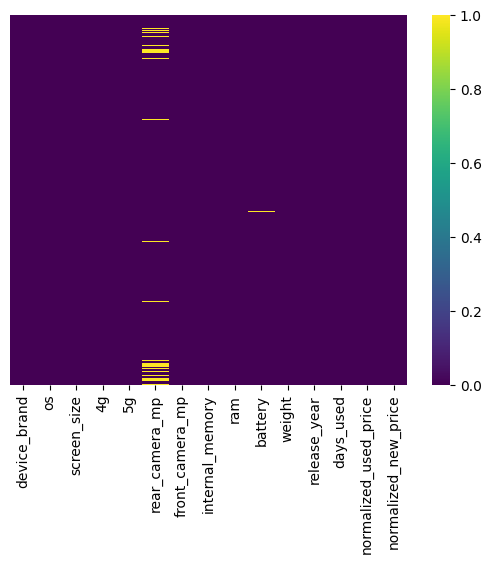

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

# Missing Values found

In [ ]:
data=data.dropna()

In [ ]:
data.shape

(3253, 15)

# Missing values dropped

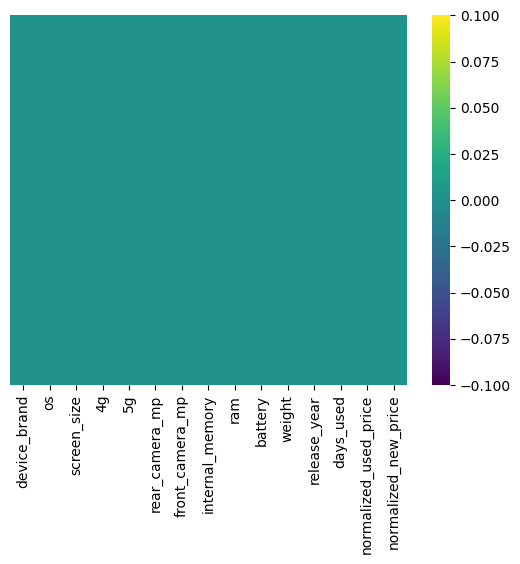

In [ ]:
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis')
plt.show()

# Checking duplicate values

In [ ]:
data.duplicated().sum()

np.int64(0)

# Encoding categorical features(4G,5G)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['4g']=le.fit_transform(data['4g'])
data['5g']=le.fit_transform(data['5g'])

In [ ]:
data.head()

device_brand       os  screen_size  4g  5g  rear_camera_mp  front_camera_mp  \
0        Honor  Android        14.50   1   0            13.0              5.0   
1        Honor  Android        17.30   1   1            13.0             16.0   
2        Honor  Android        16.69   1   1            13.0              8.0   
3        Honor  Android        25.50   1   1            13.0              8.0   
4        Honor  Android        15.32   1   0            13.0              8.0   

   internal_memory  ram  battery  weight  release_year  days_used  \
0             64.0  3.0   3020.0   146.0          2020        127   
1            128.0  8.0   4300.0   213.0          2020        325   
2            128.0  8.0   4200.0   213.0          2020        162   
3             64.0  6.0   7250.0   480.0          2020        345   
4             64.0  3.0   5000.0   185.0          2020        293   

   normalized_used_price  normalized_new_price  
0               4.307572              4.715100  
1               5.162097              5.519018  
2               5.111084              5.884631  
3               5.135387              5.630961  
4               4.389995              4.947837

# Exploring categorical features

In [ ]:
len(data.device_brand.value_counts())

33

In [ ]:
data.device_brand.unique()

array(['Honor', 'Others', 'HTC', 'Huawei', 'Lava', 'Lenovo', 'LG',
       'Micromax', 'Nokia', 'Oppo', 'Samsung', 'Vivo', 'Xiaomi', 'ZTE',
       'Apple', 'Asus', 'Acer', 'Alcatel', 'BlackBerry', 'Celkon',
       'Coolpad', 'Gionee', 'Google', 'Karbonn', 'Meizu', 'Microsoft',
       'Motorola', 'OnePlus', 'Panasonic', 'Realme', 'Sony', 'Spice',
       'XOLO'], dtype=object)

In [ ]:
brand_dict = data.groupby(['device_brand'])['normalized_used_price'].median().to_dict()
data['Device_Brand'] = data['device_brand'].map(brand_dict)

In [ ]:
Max_brand = data['device_brand'].value_counts().sort_values(ascending=False)
Max_brand.name='Counts'
Max_brand.index.name = 'Brands'

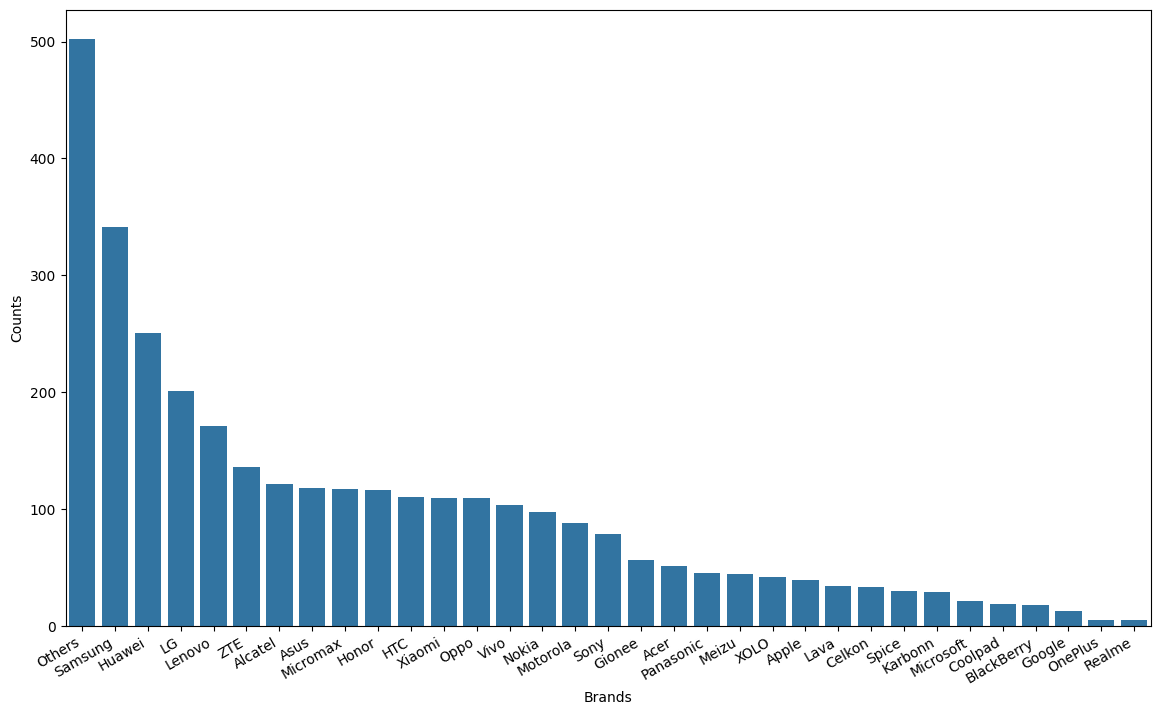

In [ ]:
fig = plt.figure(figsize=(14,8))
ax=sns.barplot(x=Max_brand.index,y= Max_brand)
ax.set_xticklabels(Max_brand.index,rotation=30,ha='right')
plt.show()


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32],
 [Text(0, 0, 'Honor'),
  Text(1, 0, 'Others'),
  Text(2, 0, 'HTC'),
  Text(3, 0, 'Huawei'),
  Text(4, 0, 'Lava'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'LG'),
  Text(7, 0, 'Micromax'),
  Text(8, 0, 'Nokia'),
  Text(9, 0, 'Oppo'),
  Text(10, 0, 'Samsung'),
  Text(11, 0, 'Vivo'),
  Text(12, 0, 'Xiaomi'),
  Text(13, 0, 'ZTE'),
  Text(14, 0, 'Apple'),
  Text(15, 0, 'Asus'),
  Text(16, 0, 'Acer'),
  Text(17, 0, 'Alcatel'),
  Text(18, 0, 'BlackBerry'),
  Text(19, 0, 'Celkon'),
  Text(20, 0, 'Coolpad'),
  Text(21, 0, 'Gionee'),
  Text(22, 0, 'Google'),
  Text(23, 0, 'Karbonn'),
  Text(24, 0, 'Meizu'),
  Text(25, 0, 'Microsoft'),
  Text(26, 0, 'Motorola'),
  Text(27, 0, 'OnePlus'),
  Text(28, 0, 'Panasonic'),
  Text(29, 0, 'Realme'),
  Text(30, 0, 'Sony'),
  Text(31, 0, 'Spice'),
  Text(32, 0, 'XOLO')])

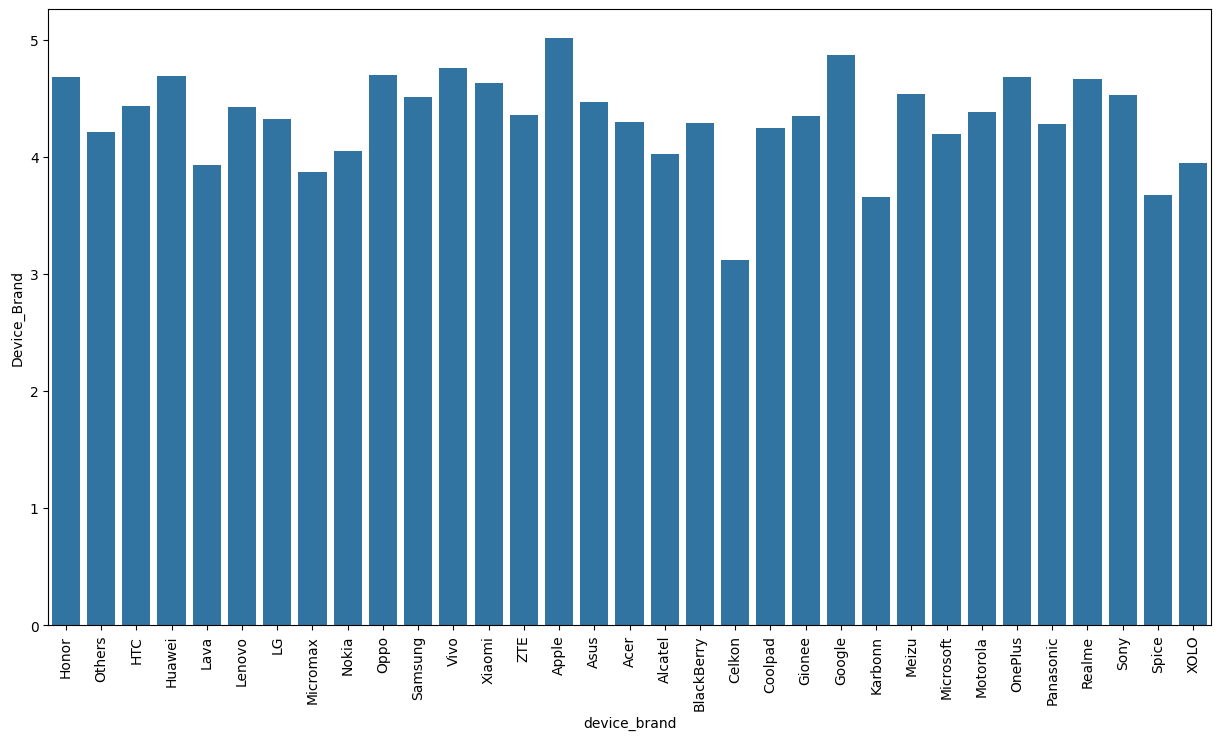

In [ ]:
fig = plt.figure(figsize=(15,8))
sns.barplot(y=data['Device_Brand'],x=data['device_brand'])
plt.xticks(rotation=90)

In [ ]:
data.os.value_counts()

os
Android    3024
Others      128
Windows      65
iOS          36
Name: count, dtype: int64

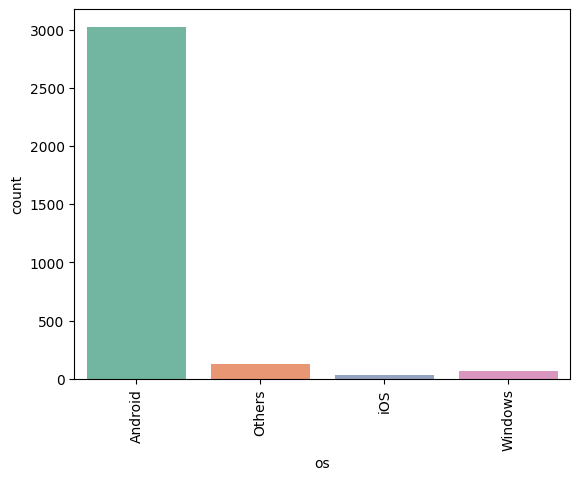

In [ ]:
sns.countplot(x=data['os'], palette='Set2')  # x-axis as 'os'
plt.xticks(rotation=90)  # Rotate x-axis labels to vertical
plt.show()


### Android phones are highest in number

In [ ]:
data['5g'].value_counts()

5g
0    3168
1      85
Name: count, dtype: int64

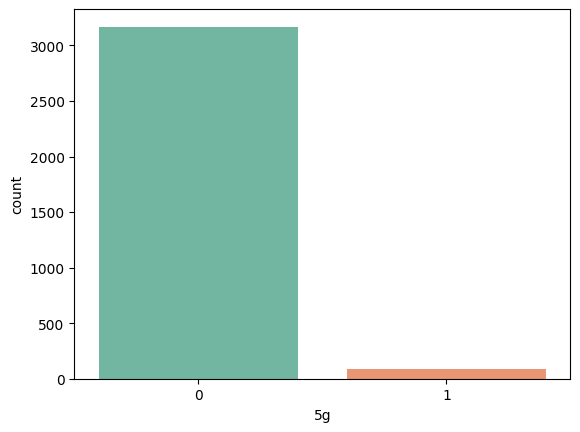

In [ ]:
sns.countplot(x=data['5g'], palette='Set2')
plt.xticks(rotation=0)
plt.show()

### There are fewer 5g phones

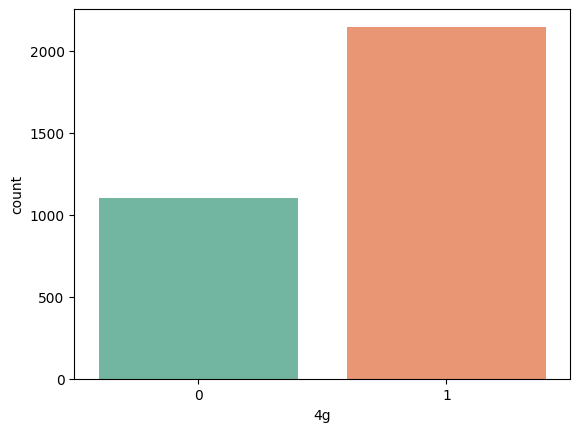

In [ ]:
sns.countplot(x=data['4g'], palette='Set2')
plt.xticks(rotation=0)
plt.show()

### There are more phones 4G enabled

In [ ]:
data['ram'].value_counts()

ram
4.00     2755
6.00      109
8.00       88
0.25       83
2.00       70
3.00       64
1.00       34
0.03       16
0.02       14
12.00      10
0.50        9
1.50        1
Name: count, dtype: int64

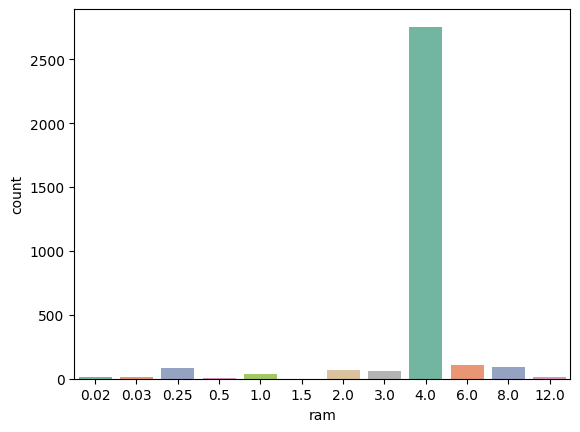

In [ ]:
sns.countplot(x=data['ram'], palette='Set2')
plt.xticks(rotation=0)
plt.show()

### Most phones have 4GB Ram

In [ ]:
data['release_year'].value_counts()

release_year
2014    639
2013    567
2015    507
2019    399
2016    381
2018    310
2017    297
2020    153
Name: count, dtype: int64

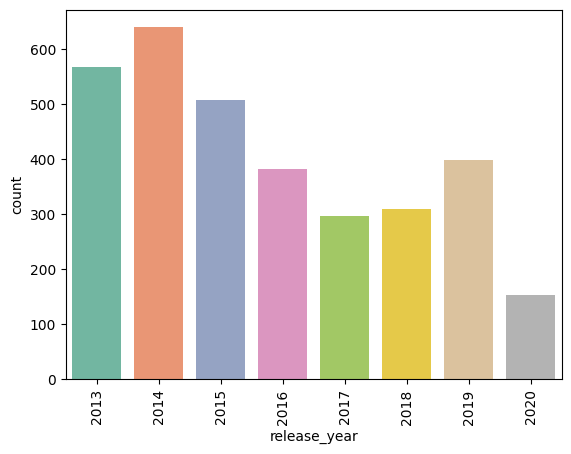

In [ ]:
sns.countplot(x=data['release_year'], palette='Set2')
plt.xticks(rotation=90)
plt.show()

### Most phones were released in the year 2014

In [ ]:
data['internal_memory'].value_counts()

internal_memory
16.00      1278
32.00      1042
64.00       455
128.00      297
256.00       69
512.00       44
0.10         16
0.06         14
8.00         12
4.00         10
1024.00       8
0.50          4
0.20          2
24.00         1
0.01          1
Name: count, dtype: int64

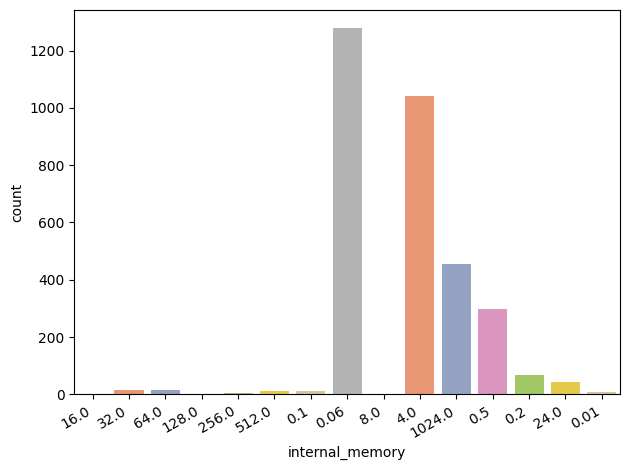

In [ ]:
sns.countplot(x=data['internal_memory'], palette='Set2')
plt.xticks(ticks=range(len(data['internal_memory'].value_counts().index)),
           labels=data['internal_memory'].value_counts().index,
           rotation=30, ha='right')
plt.tight_layout()
plt.show()


# Relation between target variable and categorical features

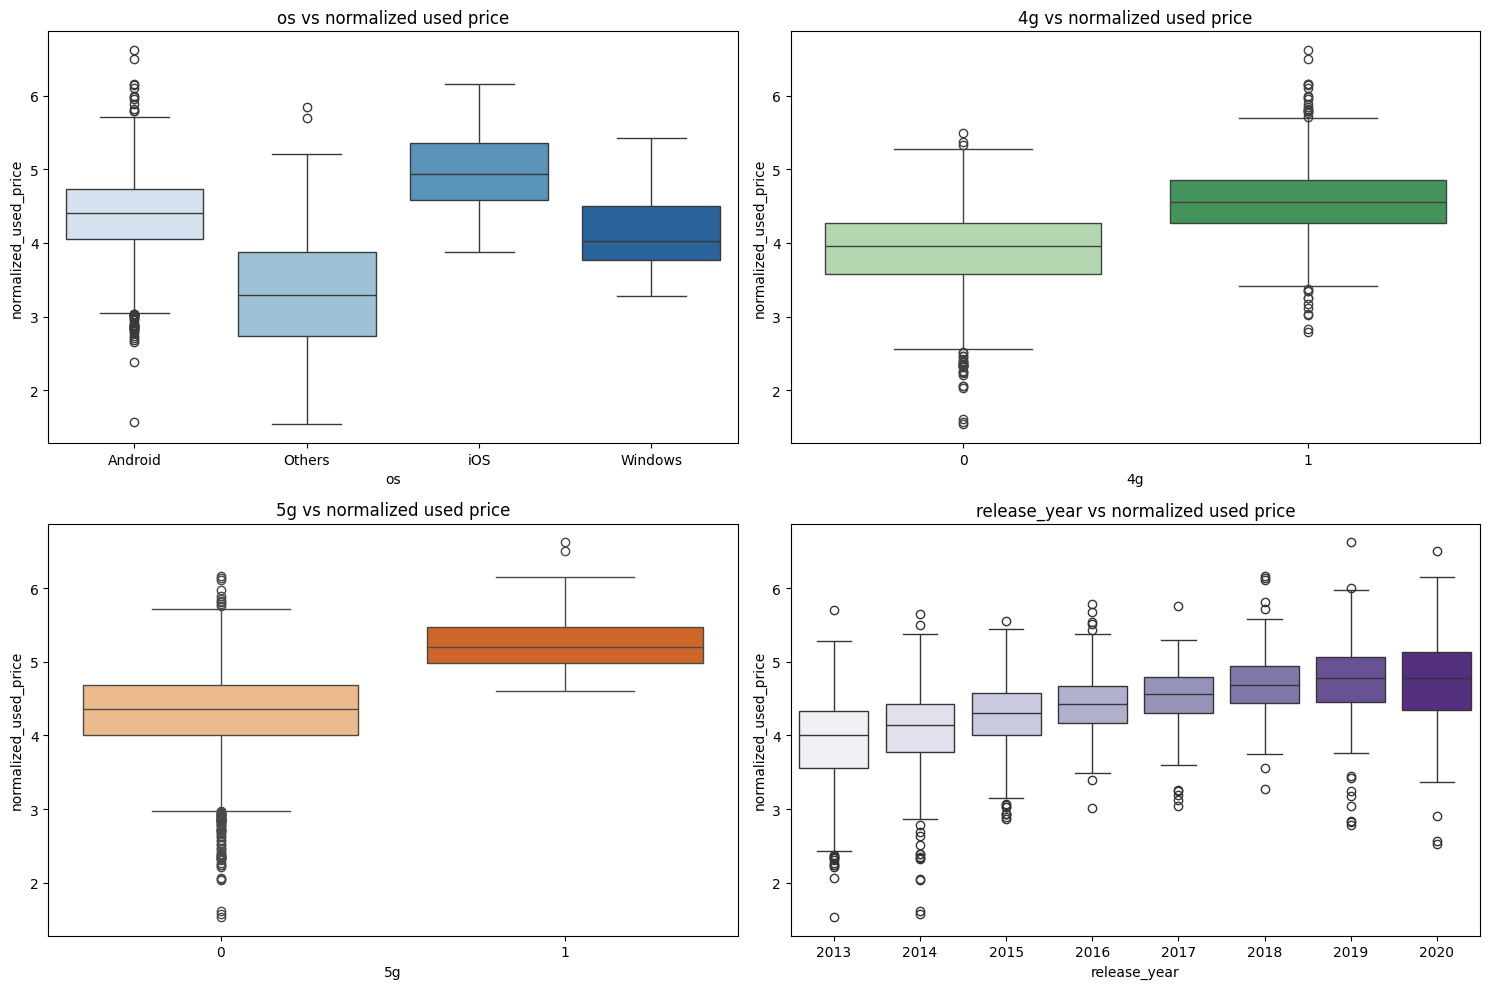

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='os', y='normalized_used_price', data=data, ax=ax[0, 0], palette='Blues')
ax[0, 0].set_title('os vs normalized used price')

sns.boxplot(x='4g', y='normalized_used_price', data=data, ax=ax[0, 1], palette='Greens')
ax[0, 1].set_title('4g vs normalized used price')

sns.boxplot(x='5g', y='normalized_used_price', data=data, ax=ax[1, 0], palette='Oranges')
ax[1, 0].set_title('5g vs normalized used price')

sns.boxplot(x='release_year', y='normalized_used_price', data=data, ax=ax[1, 1], palette='Purples')
ax[1, 1].set_title('release_year vs normalized used price')

plt.tight_layout()
plt.show()

## Through these visualizations we can see that :
- phones with os as ios are priced higher than phones with other os
- 5G enabled phones are priced higher
- 4G enabled phones are priced higher
- Phones from recent years are priced higher than phones from previous years

# Checking distribution of data

In [ ]:
numerical_features = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price', 'normalized_used_price']
numerical_features

['screen_size',
 'rear_camera_mp',
 'front_camera_mp',
 'battery',
 'weight',
 'days_used',
 'normalized_new_price',
 'normalized_used_price']

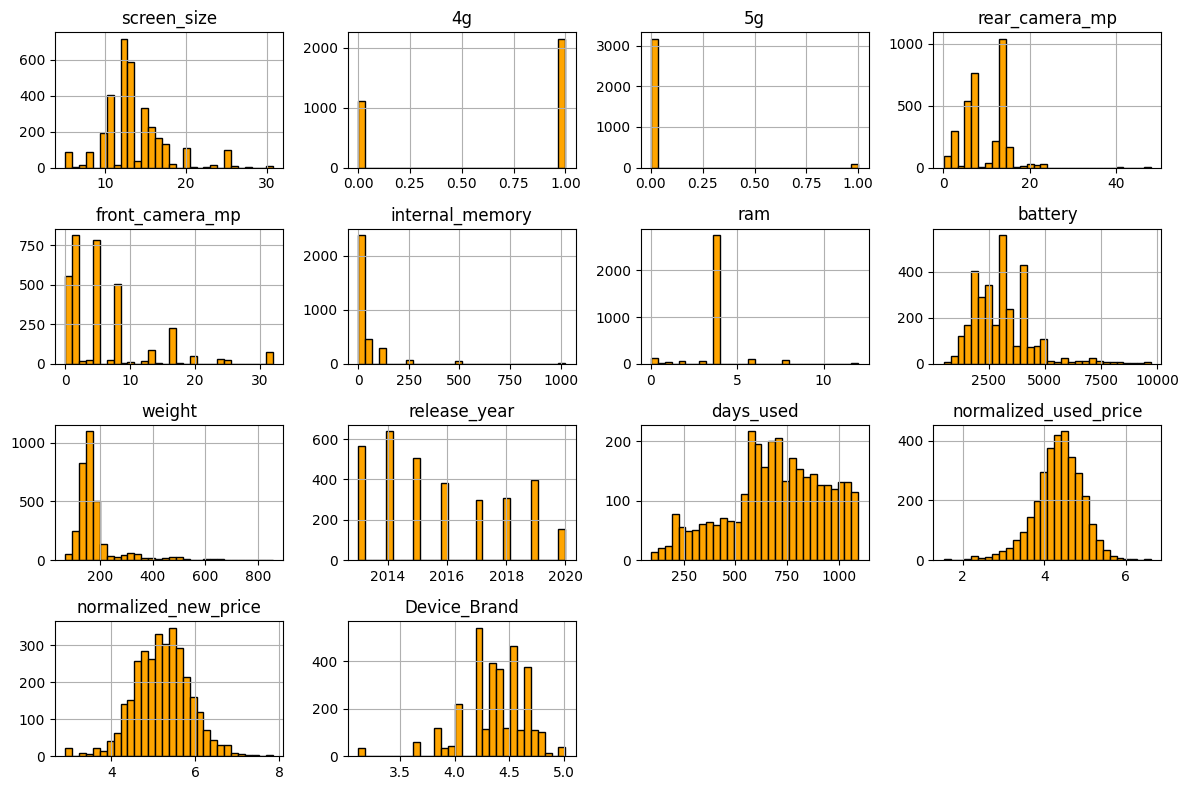

In [ ]:
data.hist(figsize=(12, 8), bins=30, color='orange', edgecolor='black')
plt.tight_layout()
plt.show()

## Function to visualize relationship between target variable and numerical features

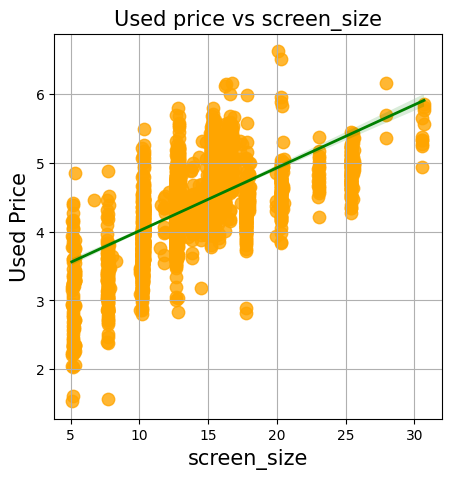

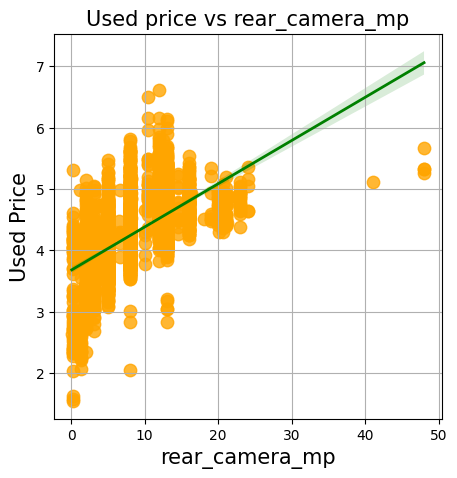

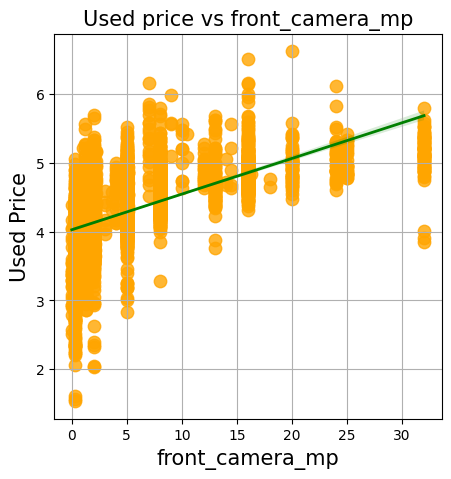

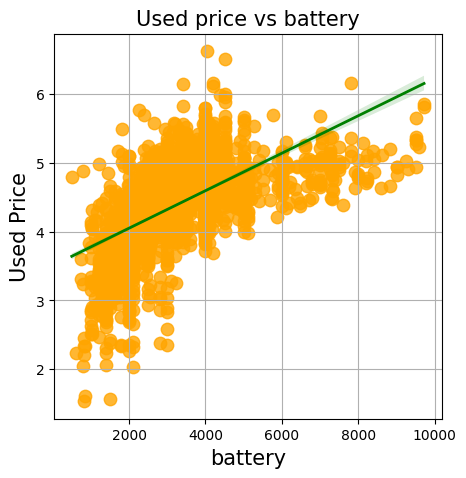

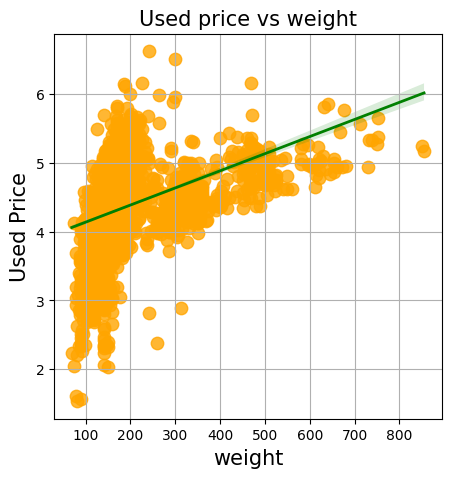

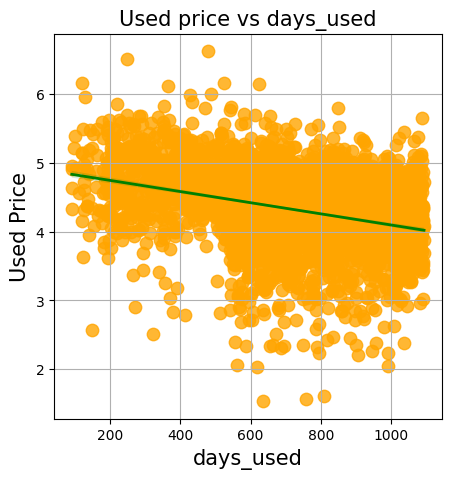

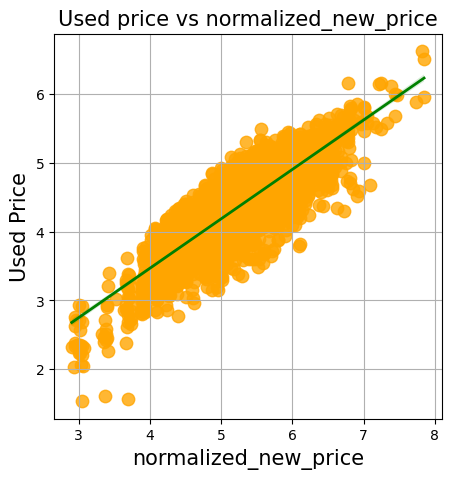

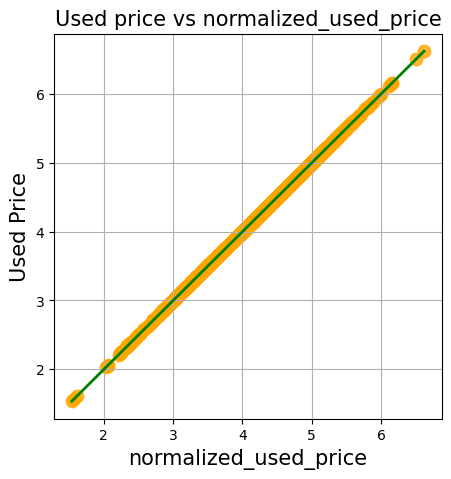

In [ ]:
def bivariate_analysis(x):
    plt.figure(figsize=(5,5))
    ax = sns.regplot(x=x, y='normalized_used_price', data=data,
                     scatter_kws={'color': 'orange', 's': 80},
                     line_kws={'color': 'green', 'linewidth': 2})
    ax.set_title("Used price vs " + x, fontsize=15)
    ax.set_xlabel(x, fontsize=15)
    ax.set_ylabel('Used Price', fontsize=15)
    plt.locator_params(axis='both', integer=True, tight=True)
    plt.grid(True)
    plt.show()

for i in numerical_features:
    bivariate_analysis(i)

# Multivariate Analysis

In [ ]:
sns.pairplot(data[numerical_features],diag_kind='kde')
plt.show()

NameError: name 'sns' is not defined

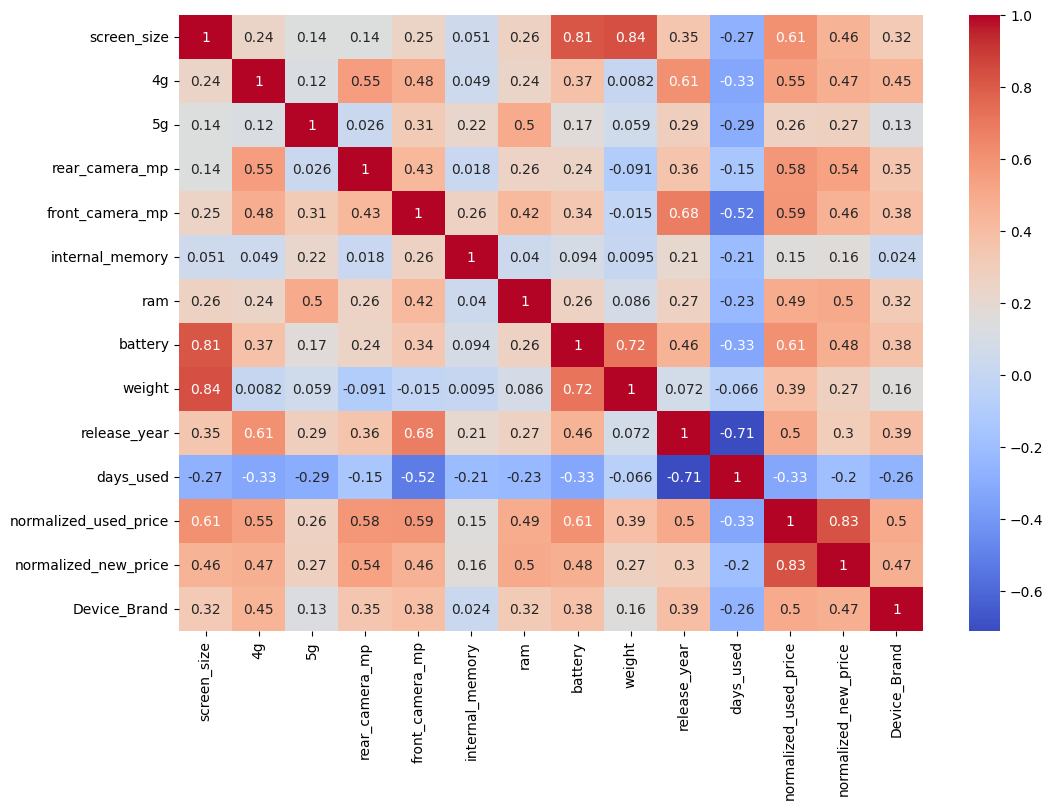

In [ ]:
numeric_data = data.select_dtypes(include=['number'])

# Compute and plot the heatmap
fig = plt.figure(figsize=(12,8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Relation between Features  
- __Used Price__ has the highest <font color=green>__positive__</font> correlation with __New Price__, followed by __battery__, __front camera__, __screen size__, __rear camera__ and __4G__.
- __Used Price__ has the highest <font color=red>__negative__</font> correlation with __Weight__ followed by __Days Used__.

### There is a <font color=green>__positive__</font> correlation between  
   -  __Battery__ and __Screen Size__ __(HIGH)__    
   -  __Release Year__ and __Front Camera__ __(MODERATE)__  
   -  __Front Camera__ and __4G__ __(MODERATE)__  
   -  __Front Camera__ and __Rear Camera__ __(MODERATE)__  
   -  __Release Year__ and __4G__ __(MODERATE)__  
   -  __Rear Camera__ and __4G__ __(LOW)__  
   -  __Rear Camera__ and __New Price__ __(LOW)__  
   -  __New Price__ and __Battery__ __(LOW)__
   -  __New Price__ and __Screen Size__ __(LOW)__  
   -  __New Price__ and __Front Camera__ __(LOW)__    

### There is a <font color=red>__negative__</font> correlation between  
   -  __Battery__ and __Weight__ __(HIGH)__  
   -  __Screen Size__ and __Weight__ __(HIGH)__    
   -  __Days Used__ and __Release Year__ __(MODERATE)__    
   -  __Days used__ and __Front Camera__ __(MODERATE)__   

## Checking Outliers

In [ ]:
cols=['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used','normalized_new_price','normalized_used_price']

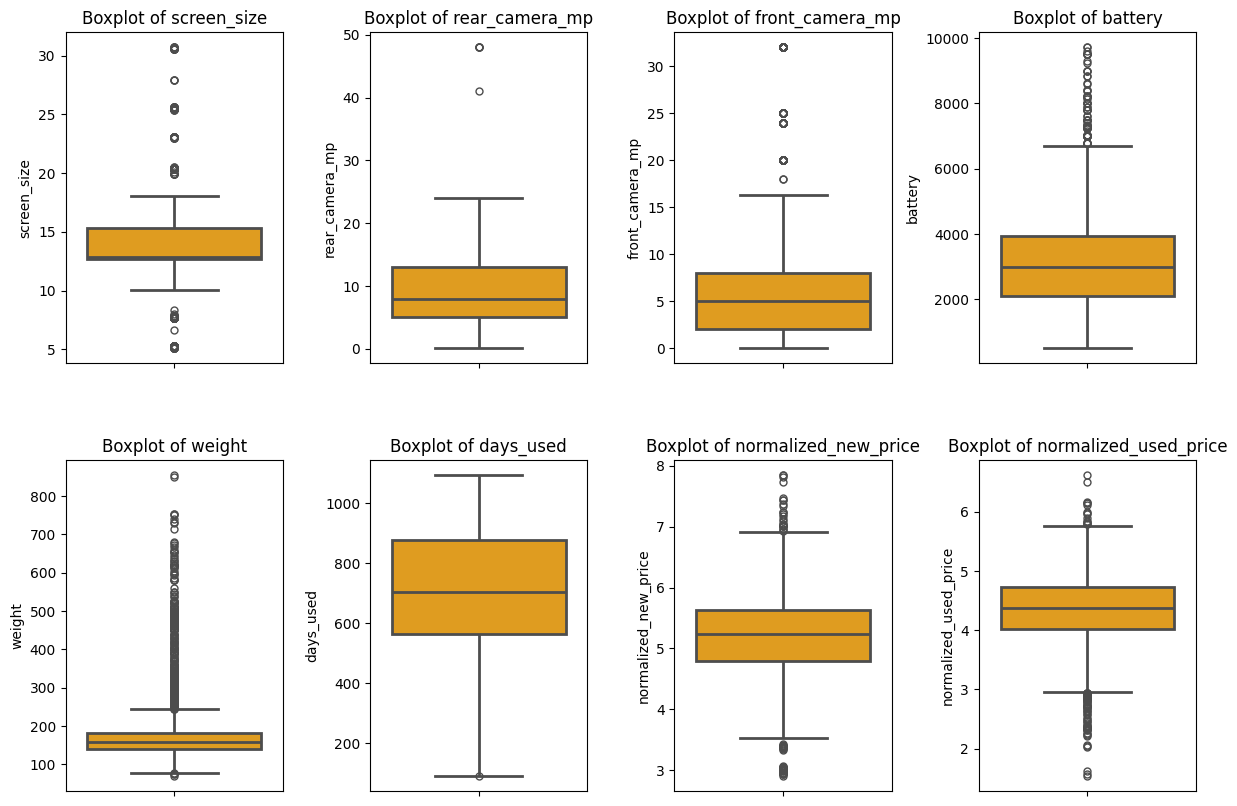

In [ ]:
fig, ax = plt.subplots(2, 4, figsize=(12, 8))
index = 0
ax = ax.flatten()

for col in cols:
    sns.boxplot(y=col, data=data, ax=ax[index], color='orange', fliersize=5, linewidth=2)
    ax[index].set_title(f'Boxplot of {col}', fontsize=12)
    index += 1

plt.tight_layout(pad=0.5, w_pad=1, h_pad=5.0)
plt.show()

# Function to detect outliers

In [ ]:
def detect_outliers(column):
    outlier_indices=[]

    for col in column:
        #1st quartile
        Q1=np.percentile(data[col],25)

        #3rd quartile
        Q3=np.percentile(data[col],75)
        #IQR
        IQR=Q3-Q1
        outlier_step=IQR*1.5

        #detect outlier and indices

        outlier_list_col=data[(data[col] < Q1 - outlier_step)
                              | (data[col] > Q3 + outlier_step)].index

        # store indeces
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

len(detect_outliers(cols))


440

__440__ outliers found _!_

# Checking skewness of data

In [ ]:
def check_skweness(columnName):
    print('''Before Correcting''')
    try:
        (mu, sigma) = norm.fit(data[columnName])
    except RuntimeError:
        (mu,sigma) = norm.fit(data[columnName].dropna())
    print("Mu before correcting {} : {}, Sigma before correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot before Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot=plt)
    plt.show();

Before Correcting
Mu before correcting SCREEN_SIZE : 13.617476175837686, Sigma before correcting SCREEN_SIZE : 3.850927722248345


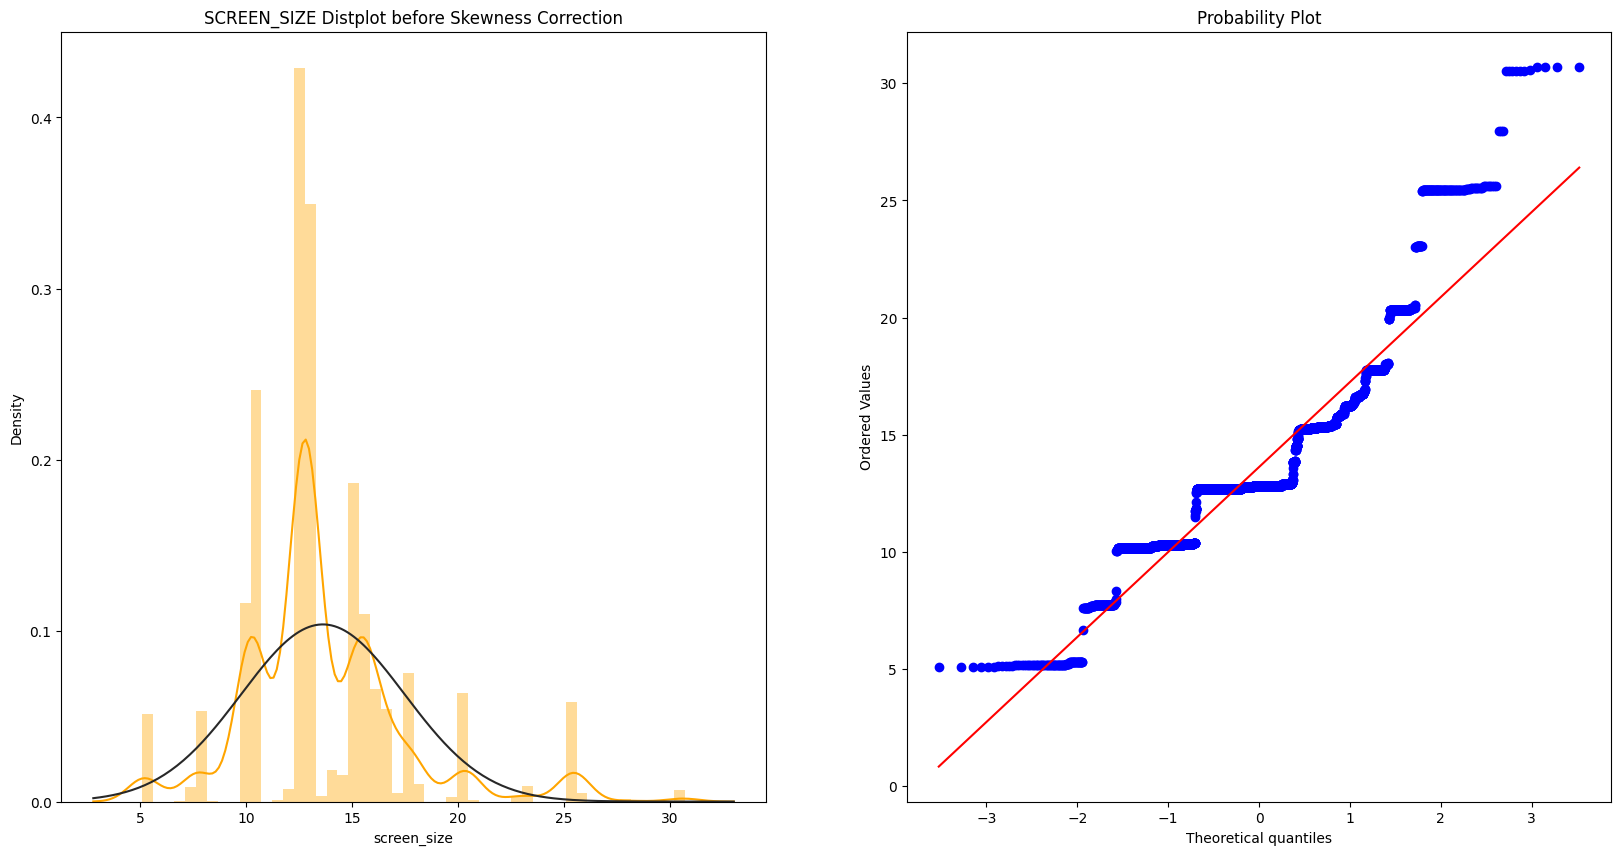

Before Correcting
Mu before correcting REAR_CAMERA_MP : 9.476354134644943, Sigma before correcting REAR_CAMERA_MP : 4.801461330992338


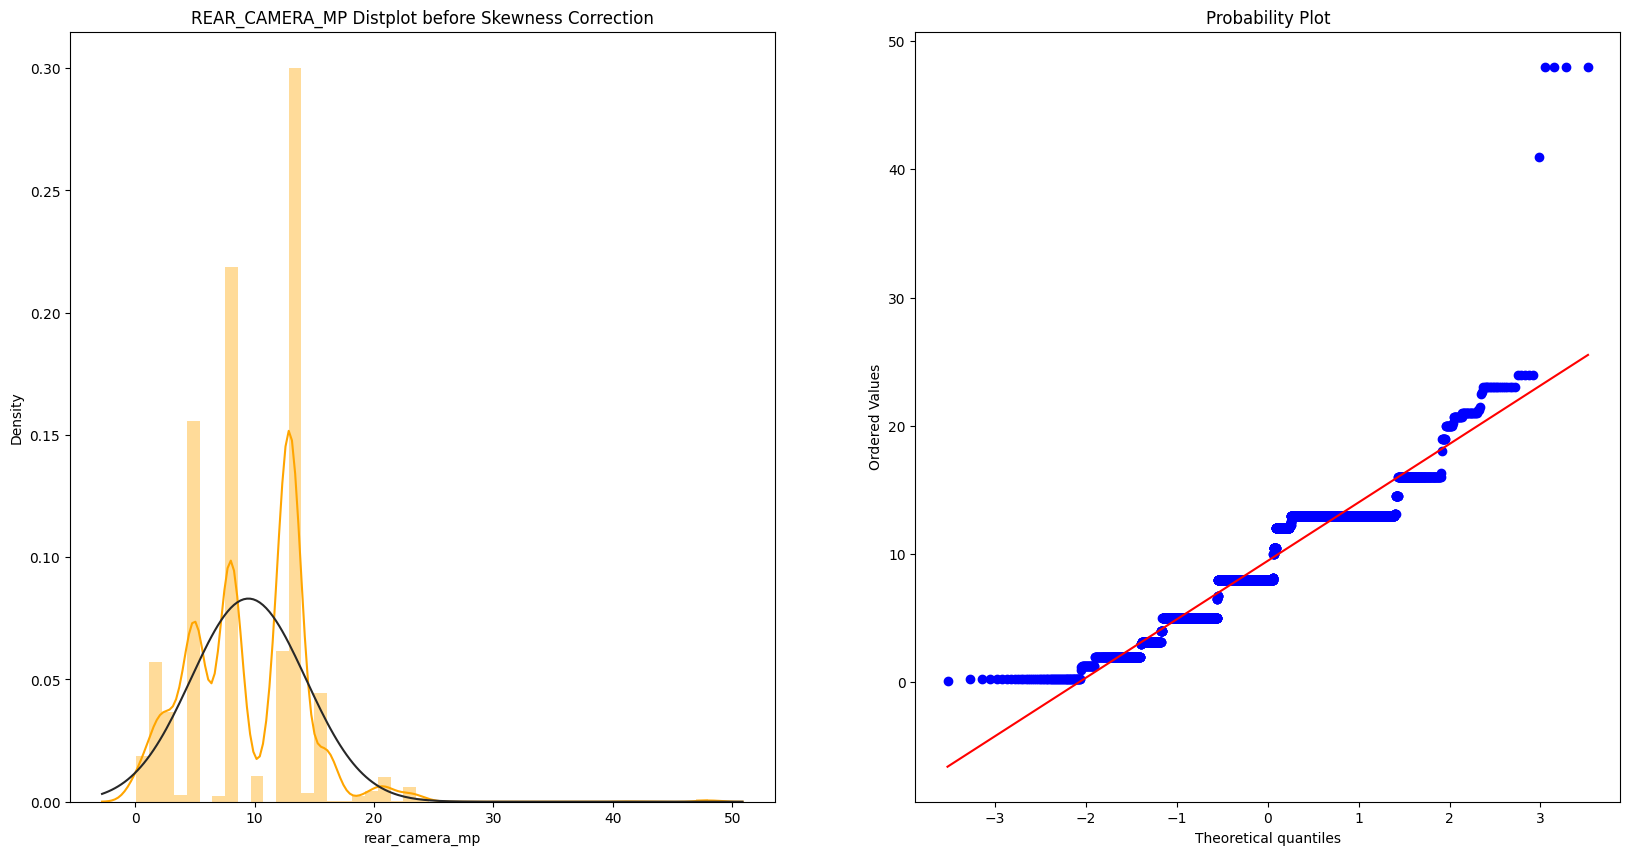

Before Correcting
Mu before correcting FRONT_CAMERA_MP : 6.093790347371658, Sigma before correcting FRONT_CAMERA_MP : 6.59856537717815


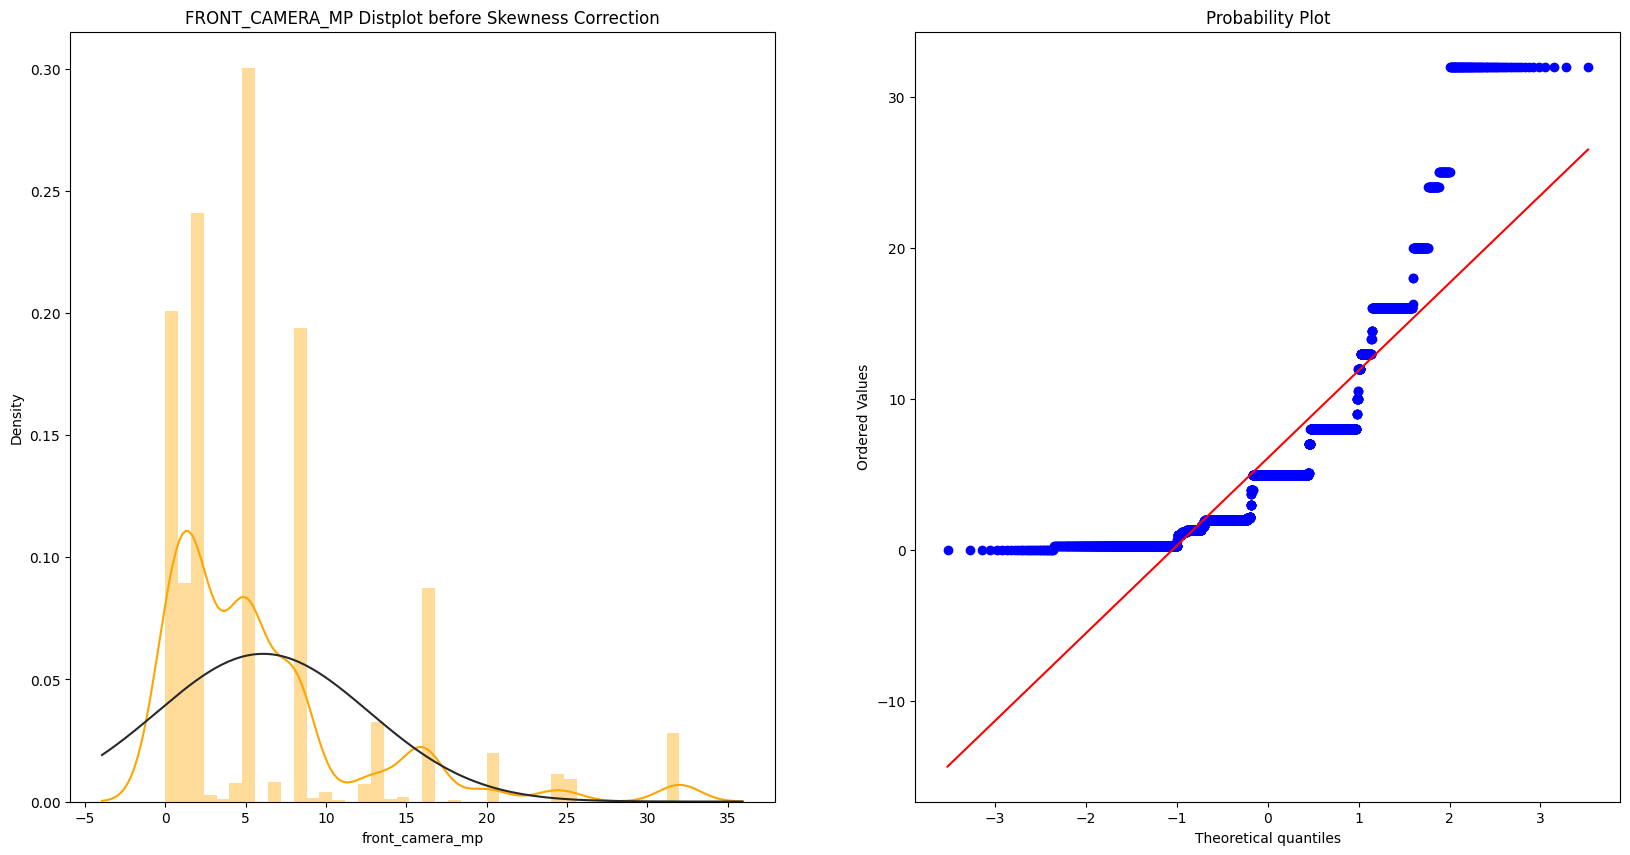

Before Correcting
Mu before correcting BATTERY : 3074.926990470335, Sigma before correcting BATTERY : 1296.758255626418


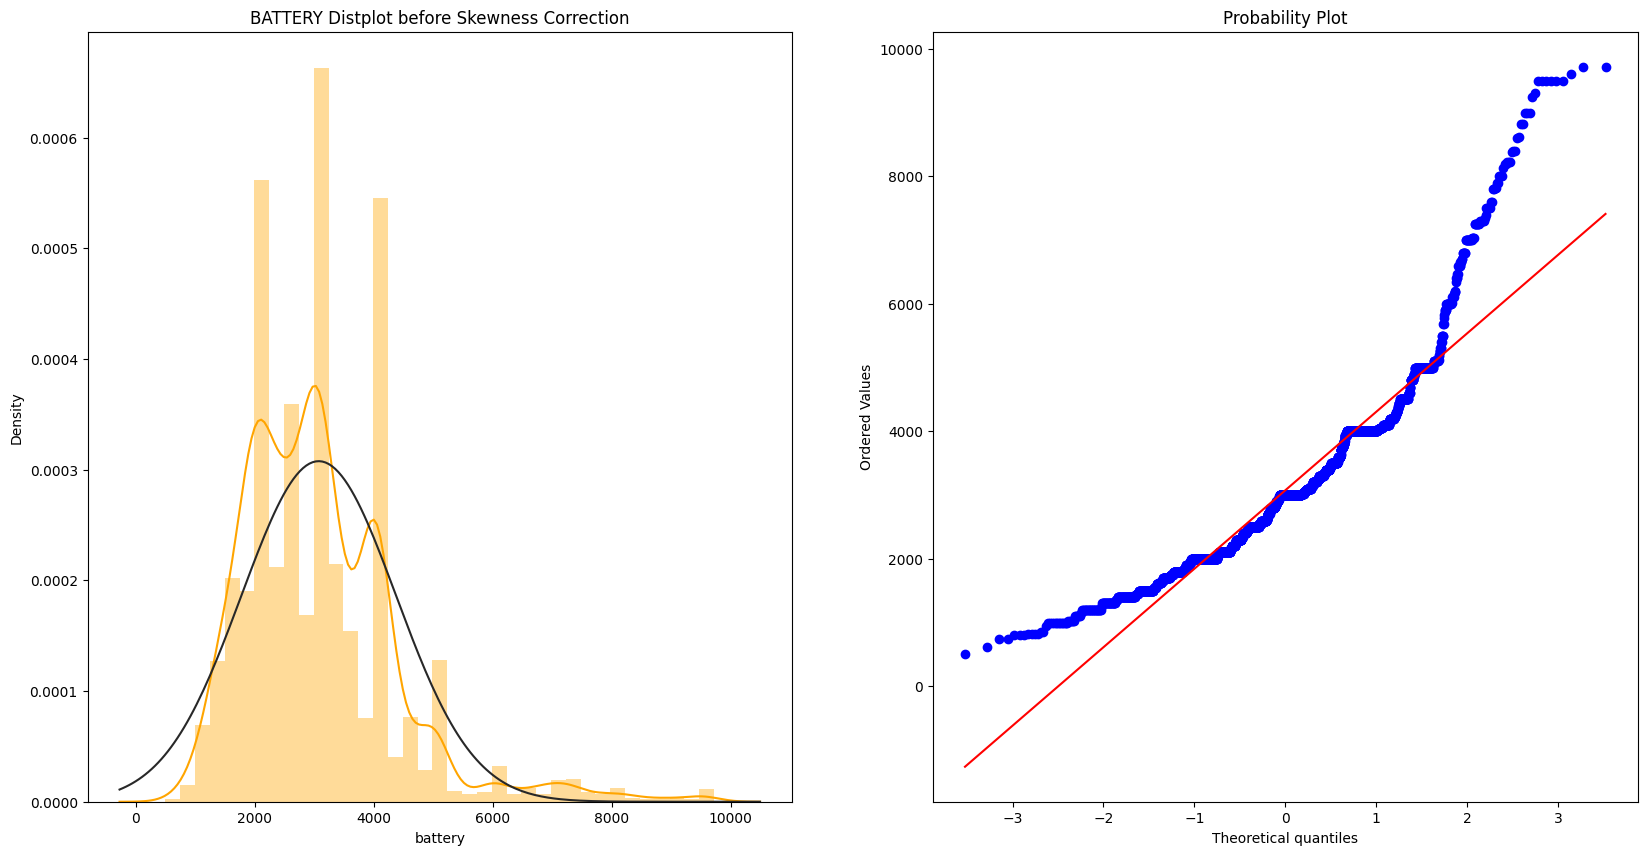

Before Correcting
Mu before correcting WEIGHT : 182.49363664309868, Sigma before correcting WEIGHT : 90.34592055359136


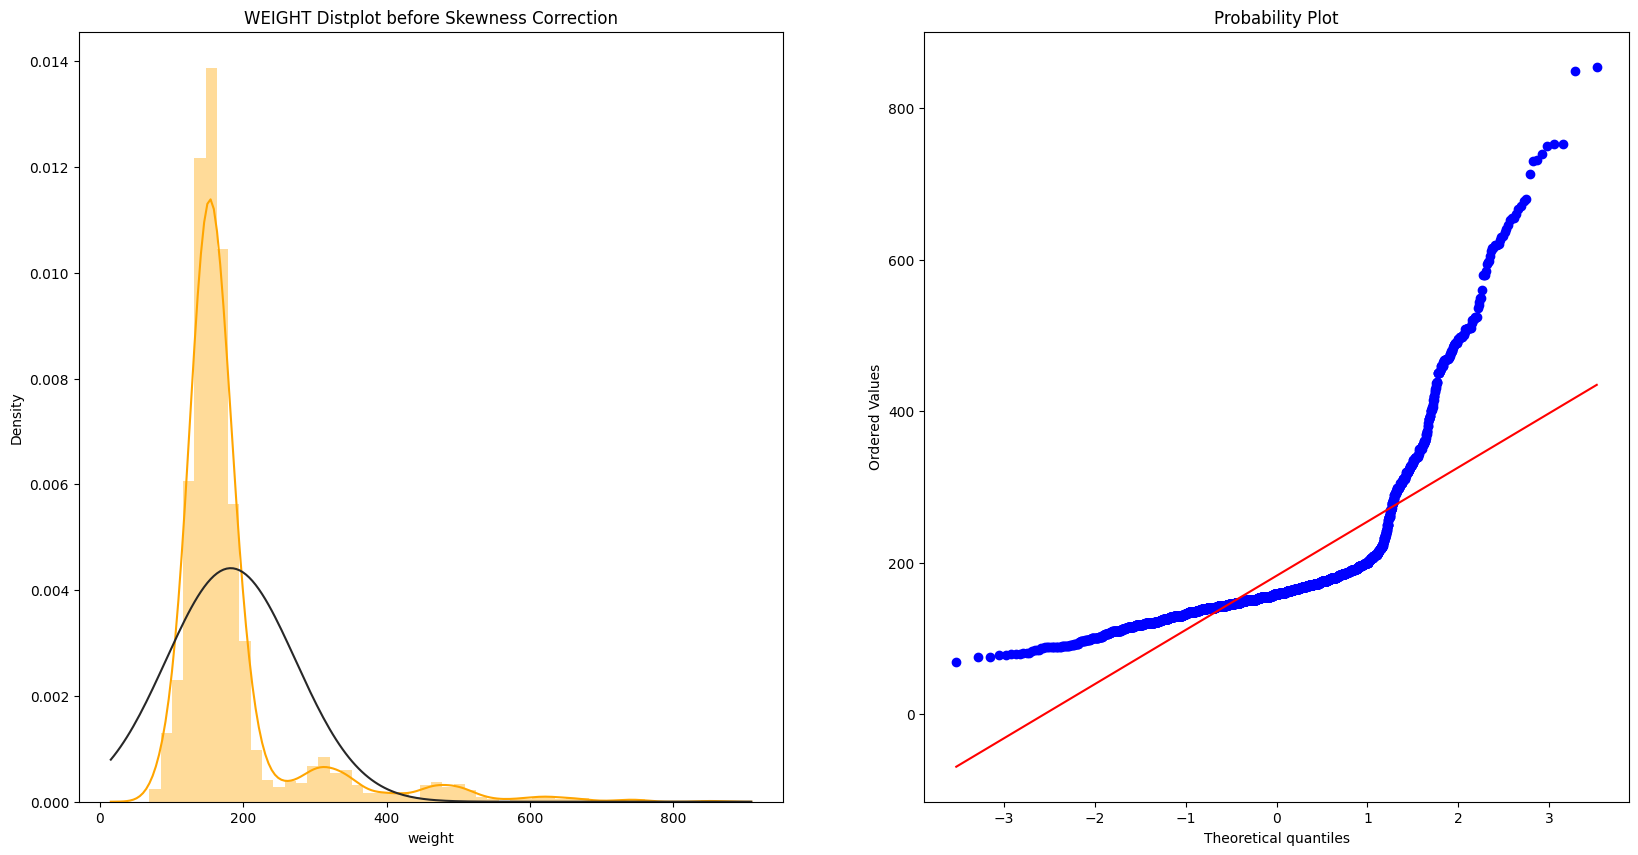

Before Correcting
Mu before correcting DAYS_USED : 695.695358130956, Sigma before correcting DAYS_USED : 235.4178911895456


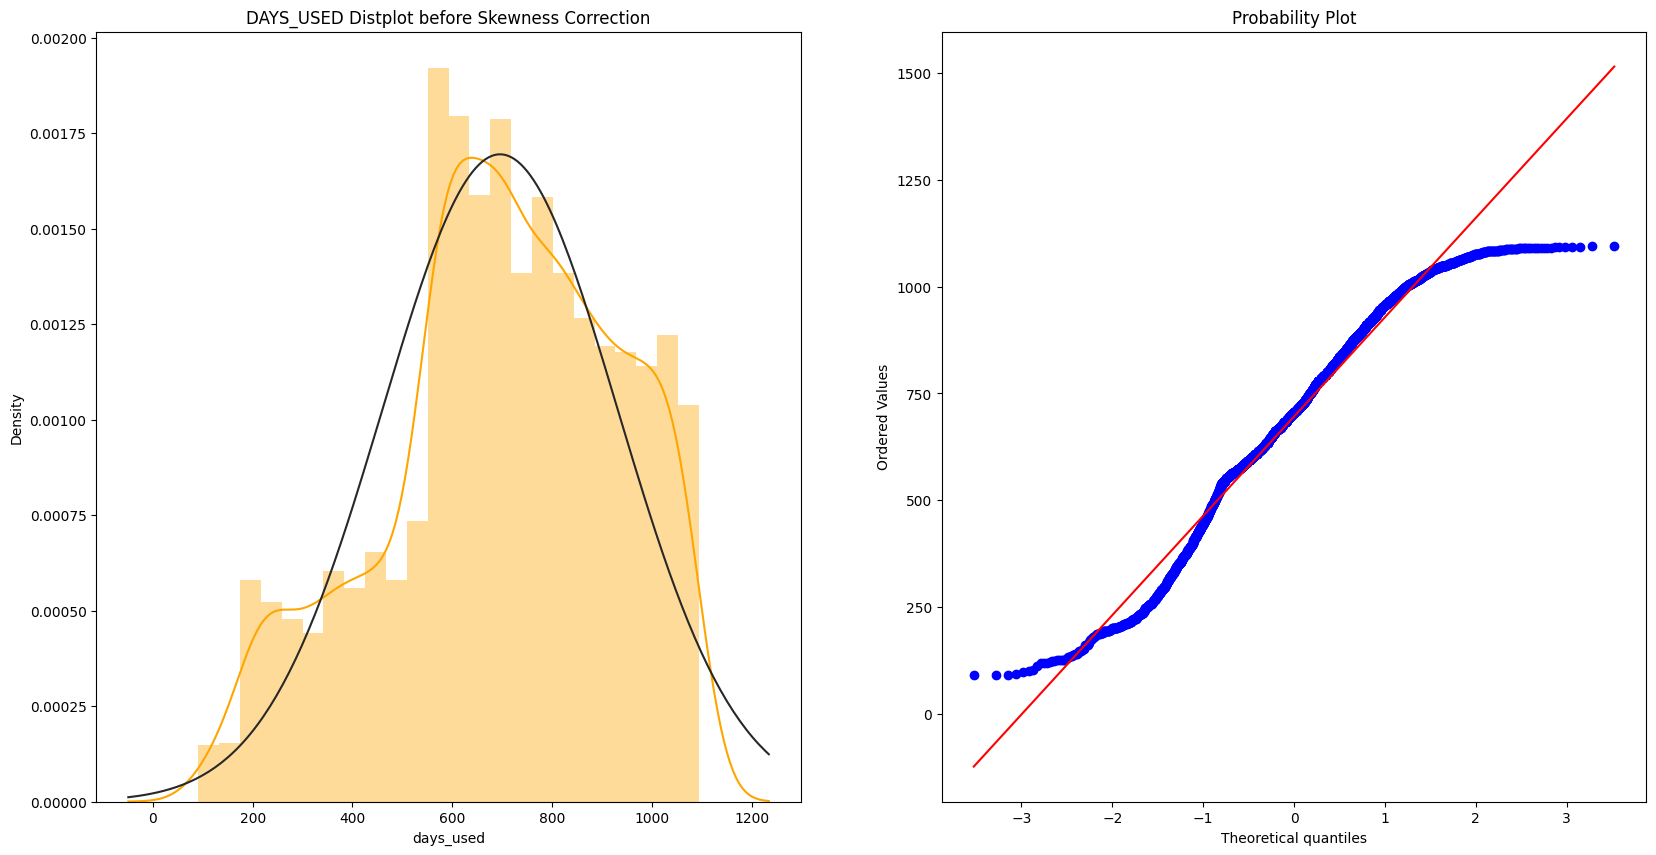

In [ ]:
skew_check_cols = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight','days_used']
for columns in skew_check_cols:
    check_skweness(columns)


# Function to apply different tranformations on variables to get normalized data

In [ ]:
def trying_different_transformations(column,transformation):
    if transformation=='boxcox':
        try:
            print("BoxCox - "+column)
            temp,temp_params = boxcox(data[column]+1)
            (mu,sigma)=norm.fit(temp)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp, plot = plt)
        except ValueError:
            pass
        except ValueError:
            pass
    elif transformation=='log':
        try:
            print("Log - "+column)
            (mu,sigma)=norm.fit(np.log1p(data[column]))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(np.log1p(data[column]), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(np.log1p(data[column]), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='reciprocal':
        try:
            print("Reciprocal - "+column)
            temp_r = 1/data[column]
            temp_r = temp_r.replace([np.inf, -np.inf], 0)
            (mu,sigma)=norm.fit(temp_r)
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(temp_r, fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(temp_r, plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    elif transformation=='sqroot':
        try:
            print("Square_Root - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass
    else:
        try:
            print("Exponential - "+column)
            (mu,sigma)=norm.fit(data[column]**(1/1.2))
            print("mu ",mu," sigma ",sigma)
            plt.figure(figsize=(20,10))
            plt.subplot(1,2,1)
            sns.distplot(data[column]**(1/1.2), fit=norm, color="orange")
            plt.subplot(1,2,2)
            stats.probplot(data[column]**(1/1.2), plot = plt)
        except RuntimeError:
            pass
        except ValueError:
            pass

# Transformations to try !
- __Boxcox__
- __Log__
- __Reciprocal__
- __Squareroot__
- __Exponential__

# Trying different transformations on screen_size feature

BoxCox - screen_size
mu  3.569840560136016  sigma  0.45451365943440997
Log - screen_size
mu  2.6489500119971527  sigma  0.2597925882344678
Reciprocal - screen_size
mu  0.07960684557547834  sigma  0.025525098428114866
Square_Root - screen_size
mu  3.6549818070083795  sigma  0.5085117169500123
Exponential - screen_size
mu  8.765467966999235  sigma  2.0485469876423363


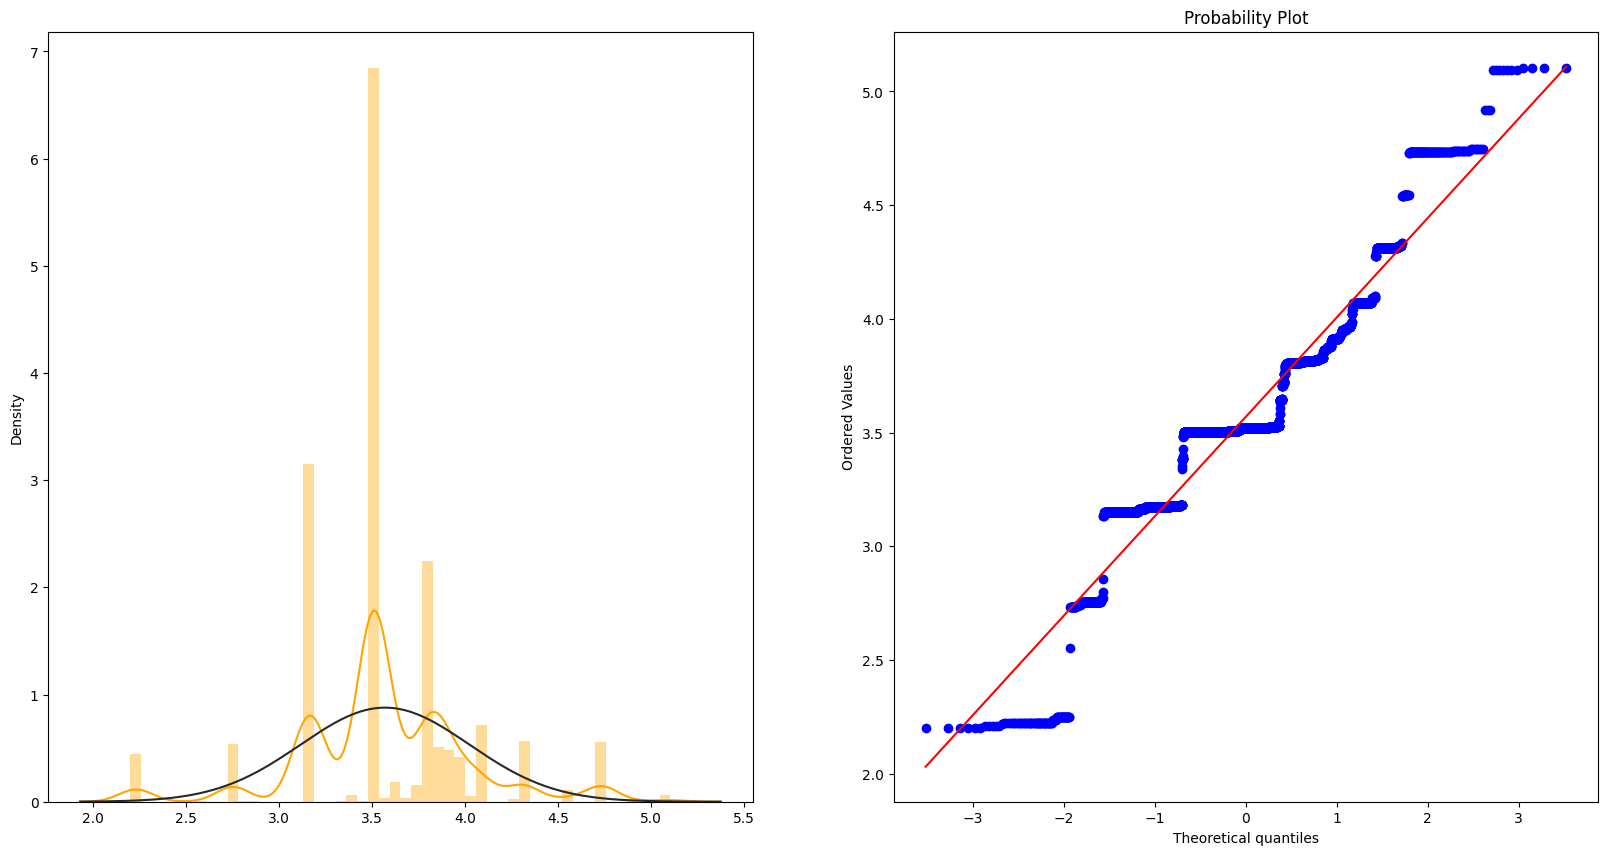

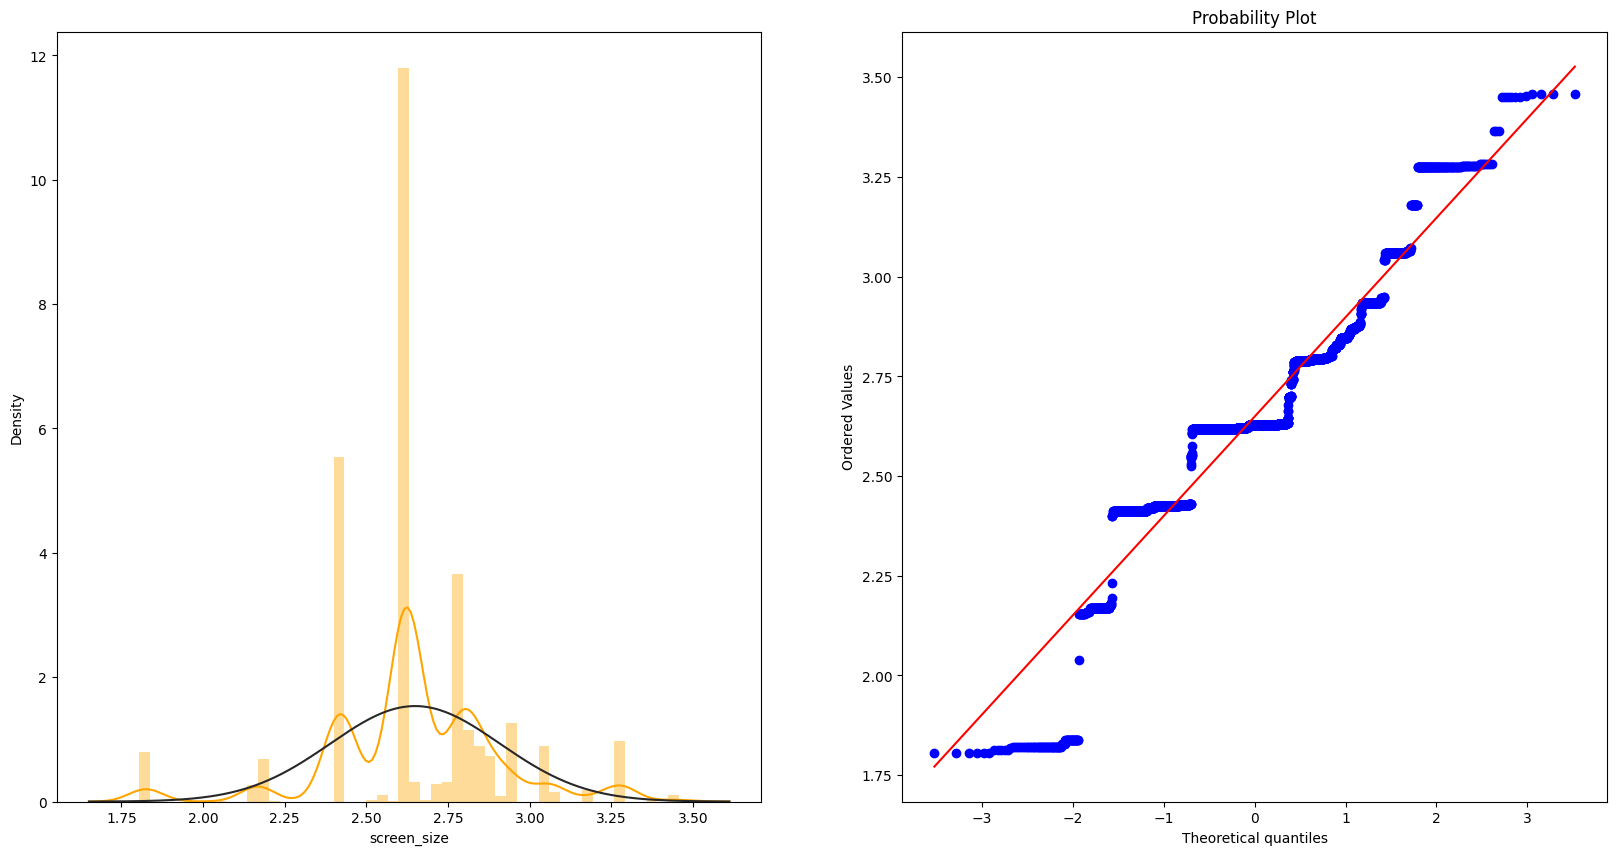

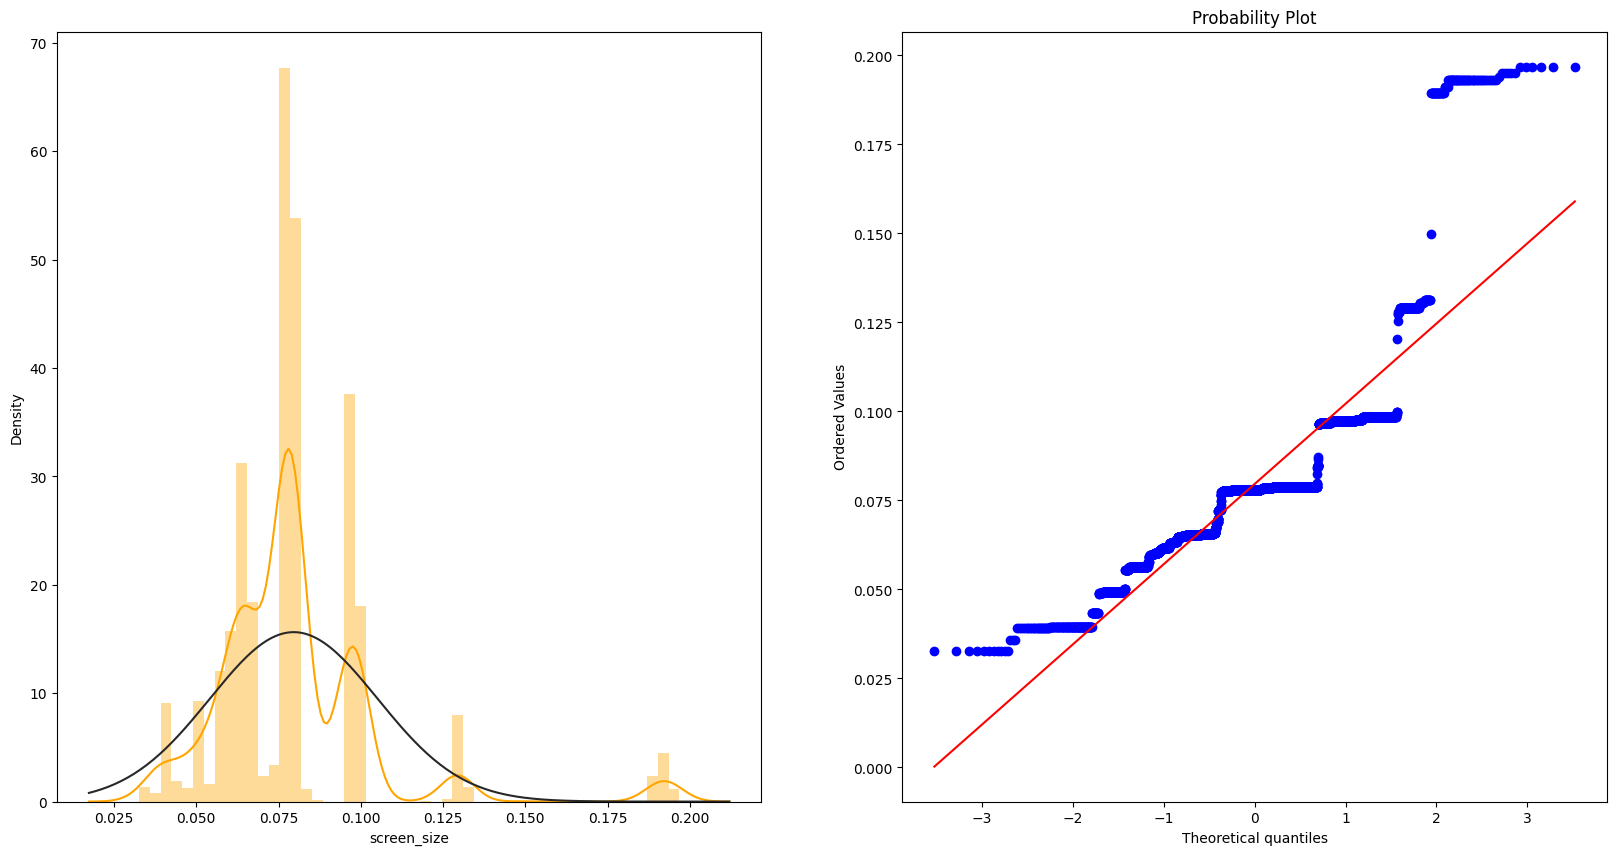

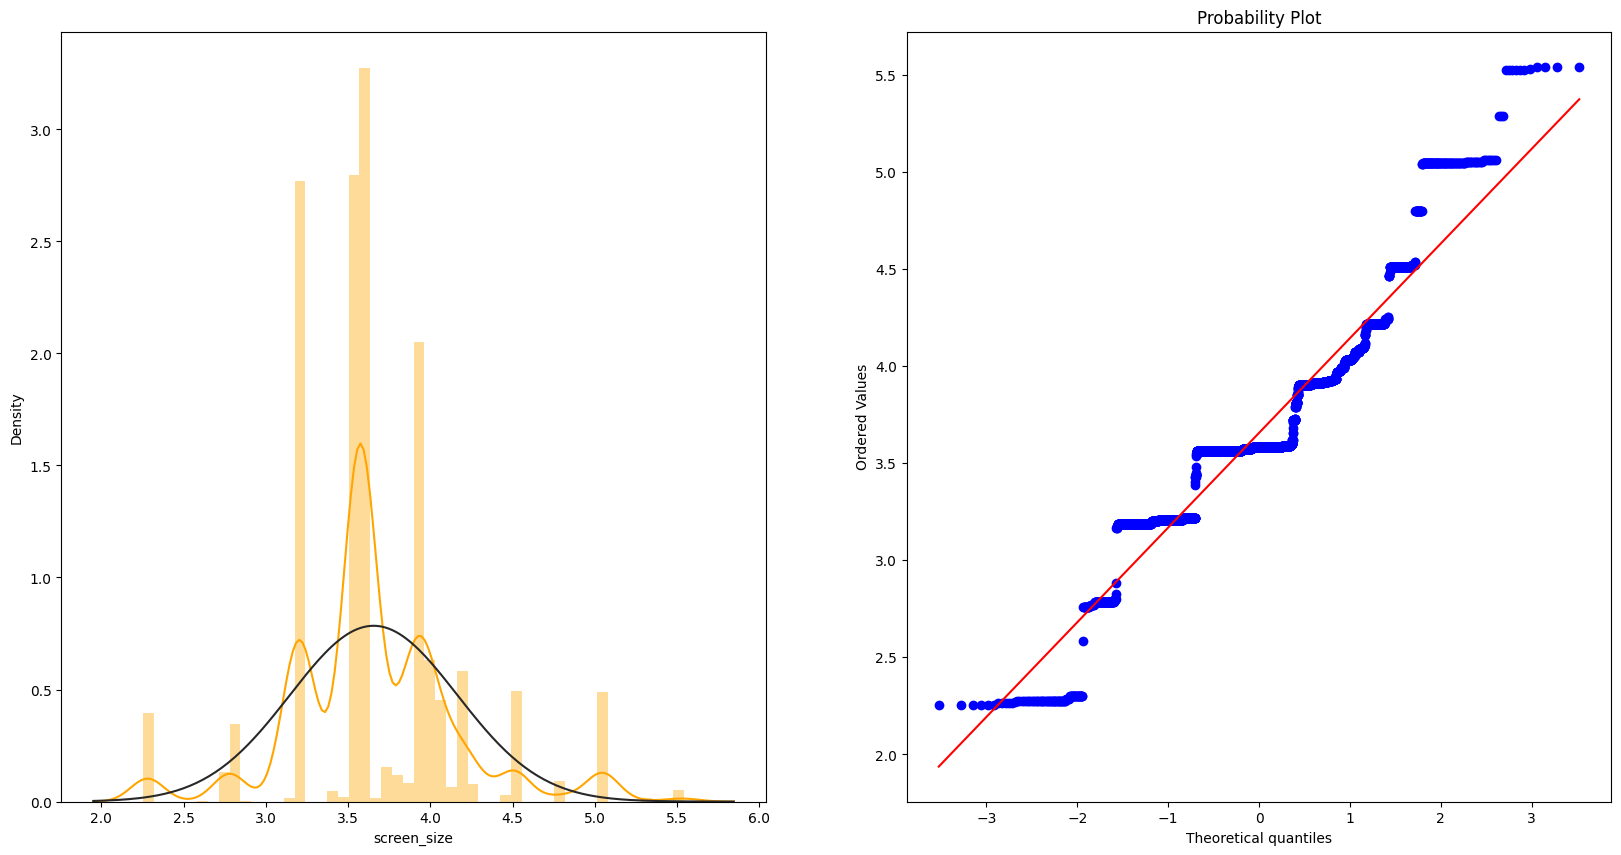

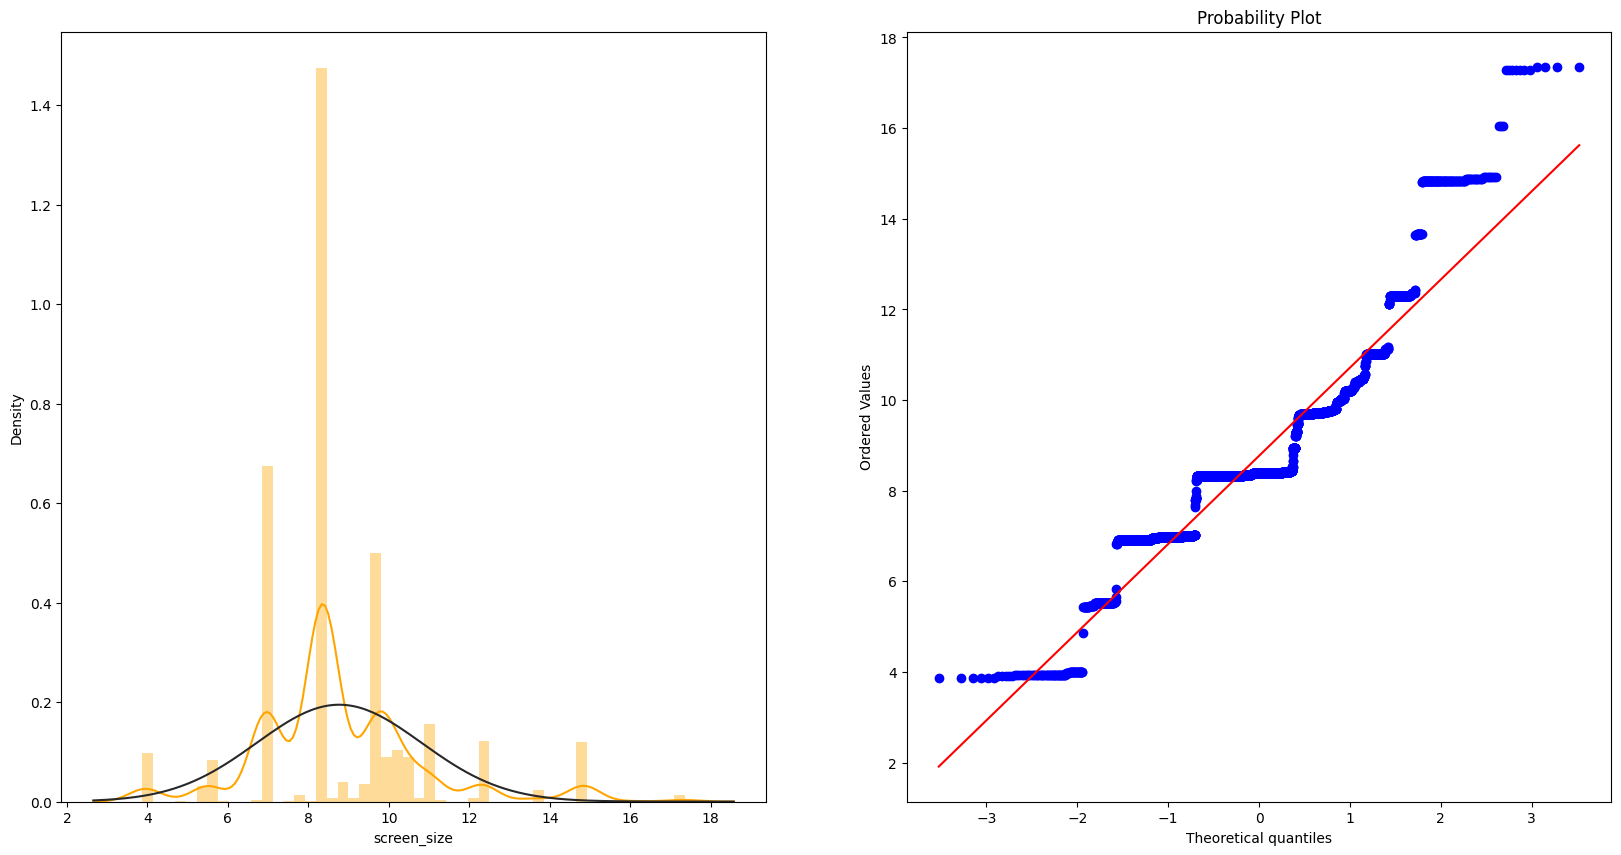

In [ ]:
transformations = ['boxcox','log','reciprocal','sqroot','exp']
for x in transformations:
    trying_different_transformations('screen_size',x)

# Trying different transformations on rear_camera_mp feature

BoxCox - rear_camera_mp
mu  5.561195754976198  sigma  2.2755113392406137
Log - rear_camera_mp
mu  2.2166565580441495  sigma  0.5686388346206583
Reciprocal - rear_camera_mp
mu  0.21288679387362286  sigma  0.5034662710014629
Square_Root - rear_camera_mp
mu  2.9592967600910938  sigma  0.847889627462975
Exponential - rear_camera_mp
mu  6.386109911940589  sigma  2.776726315977432


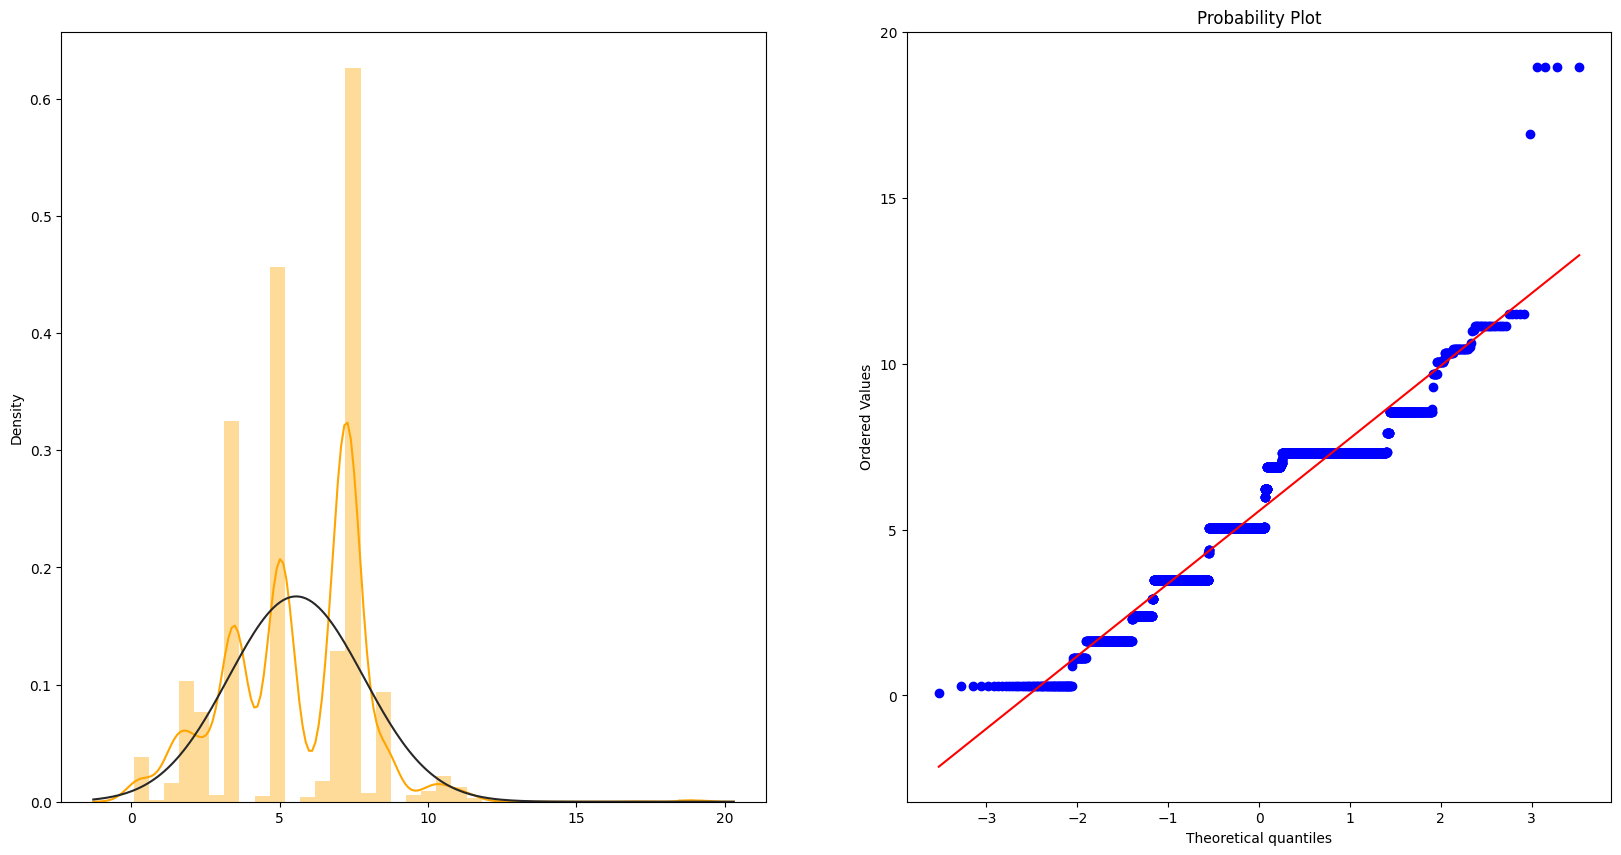

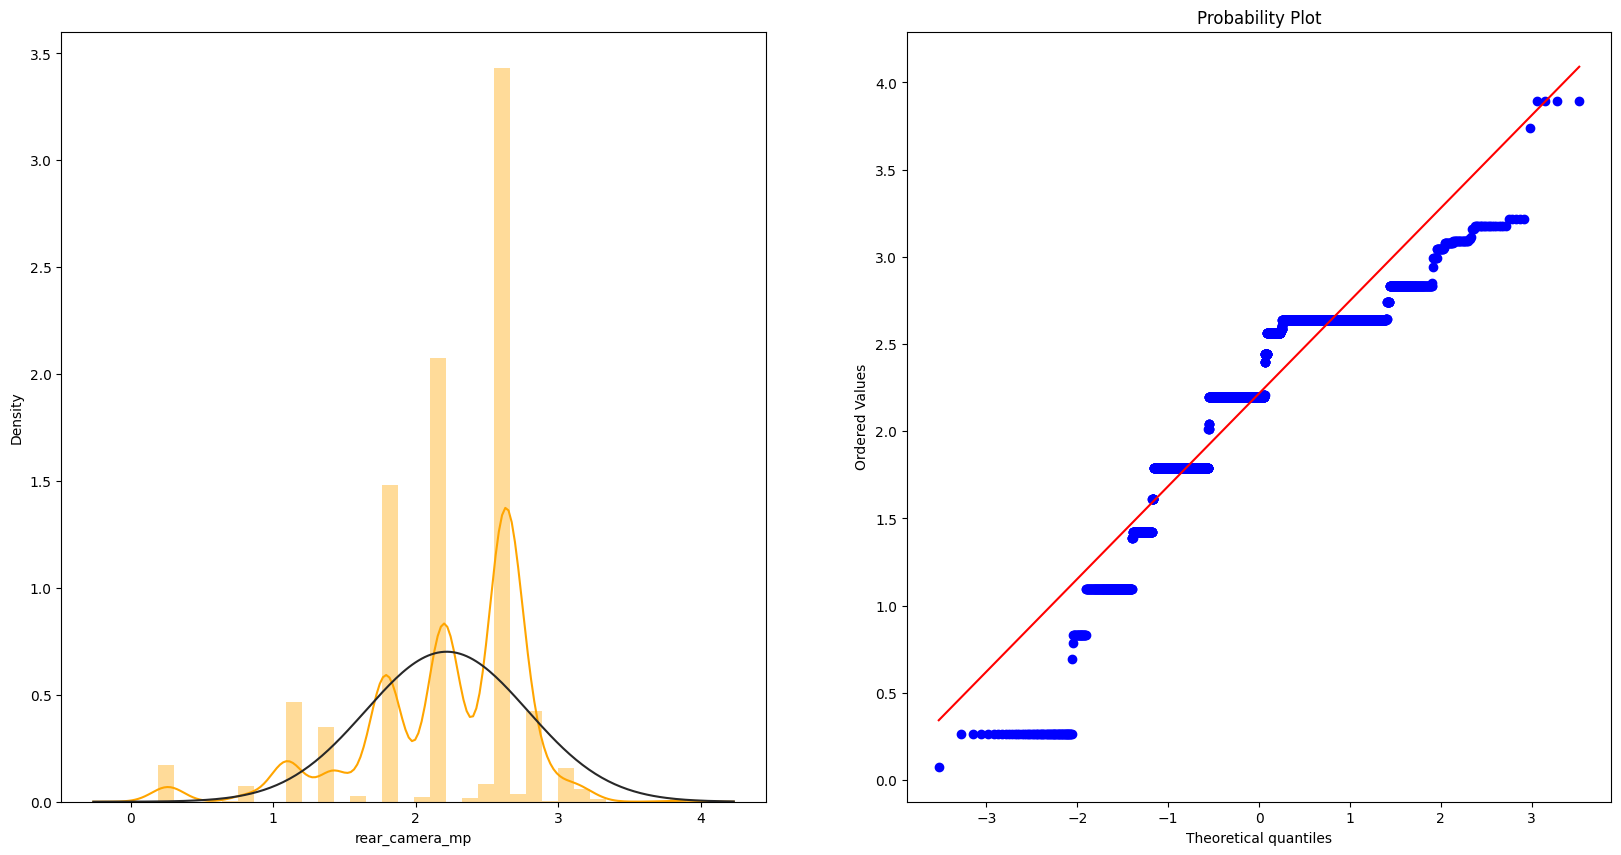

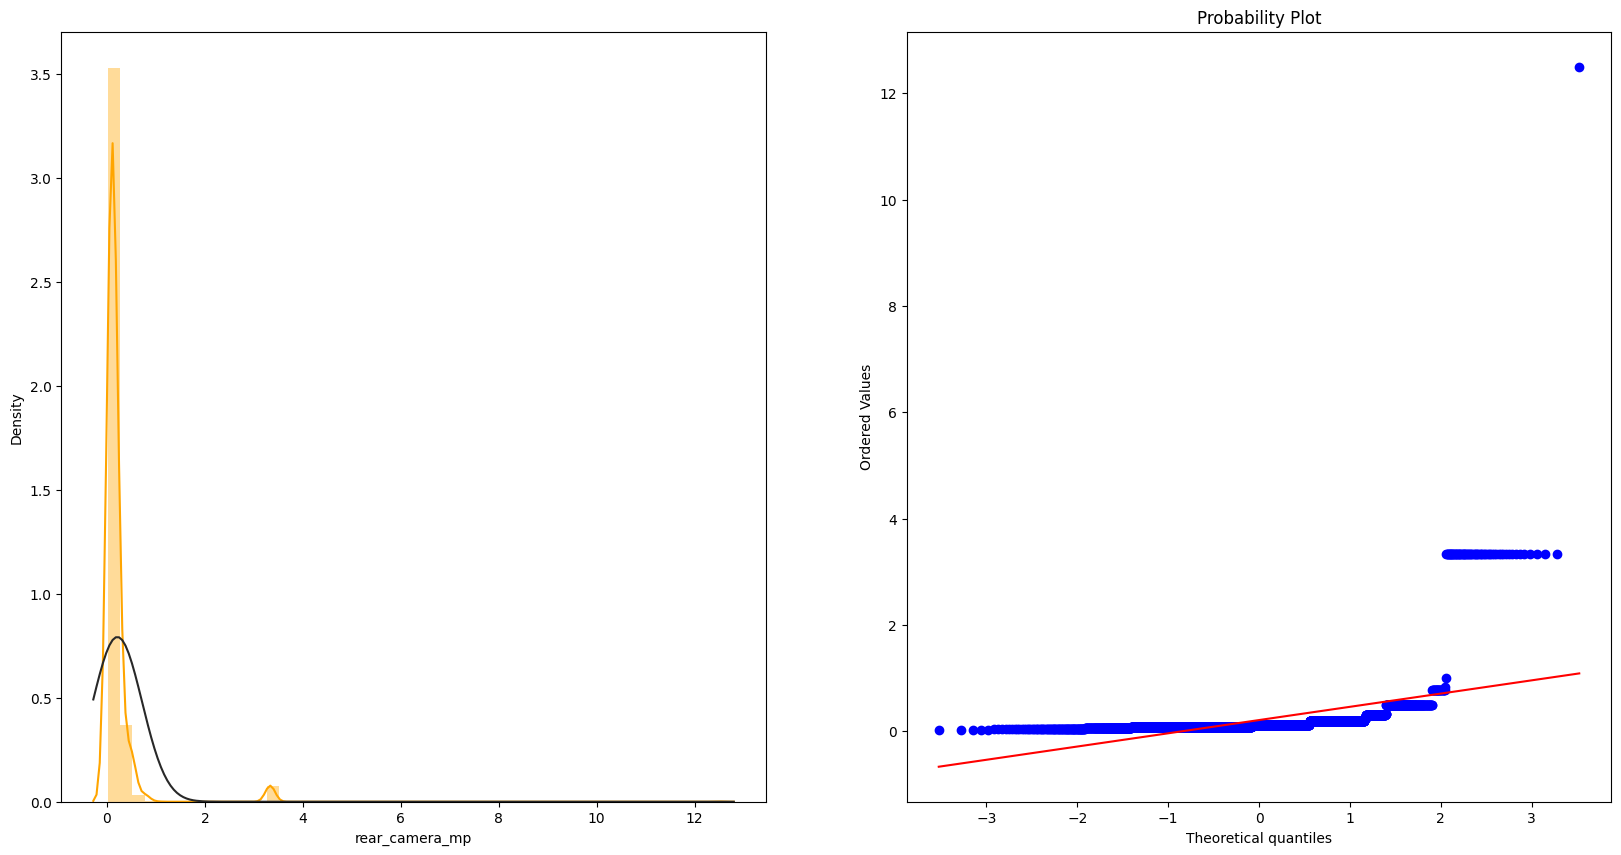

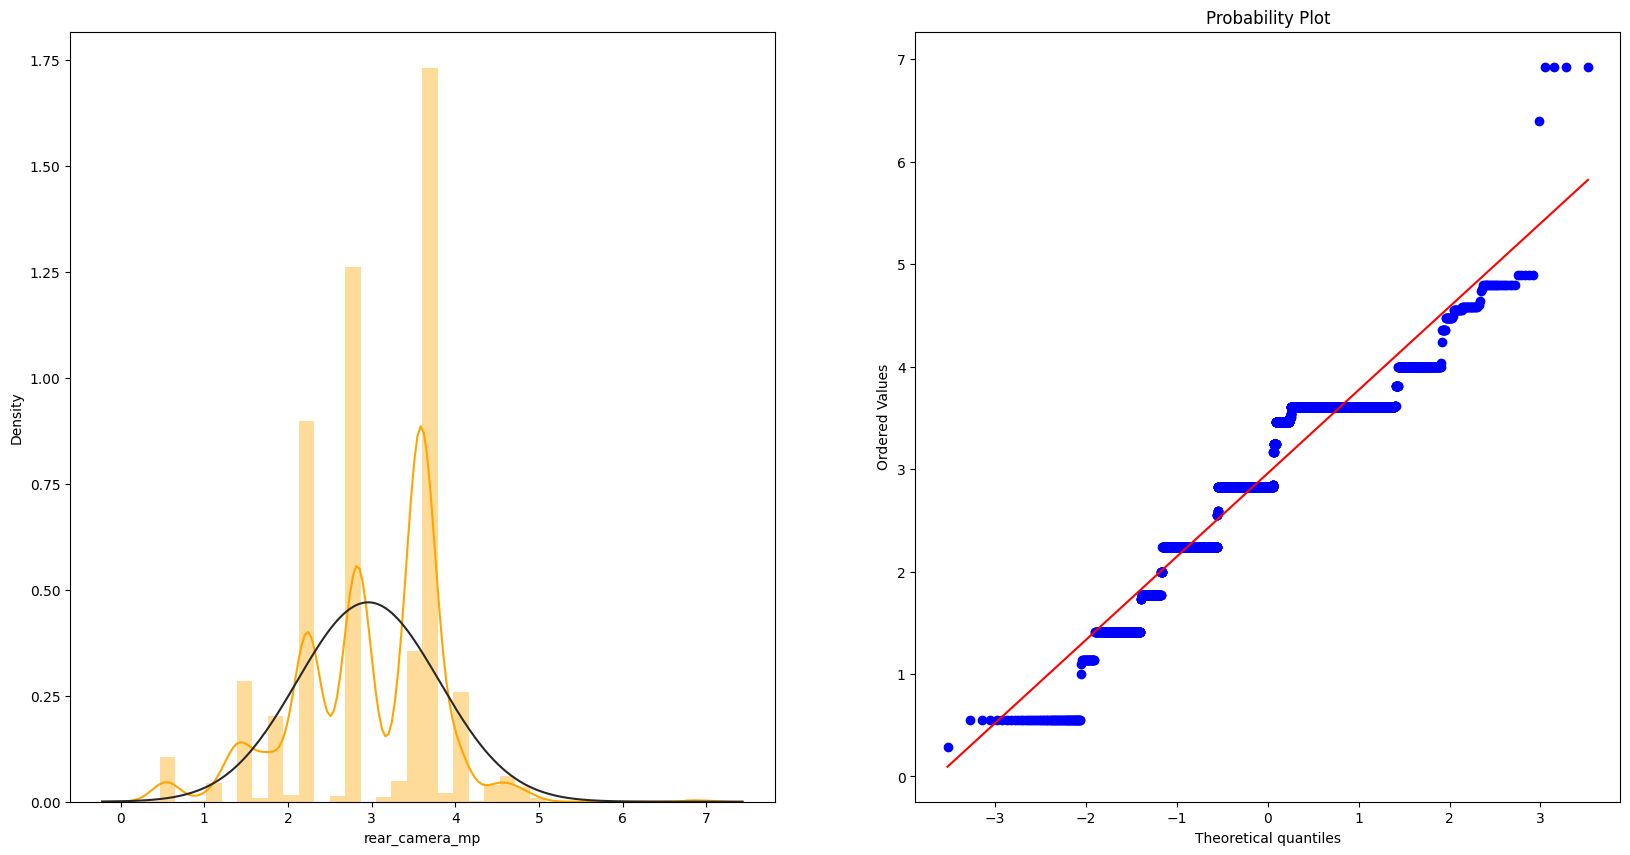

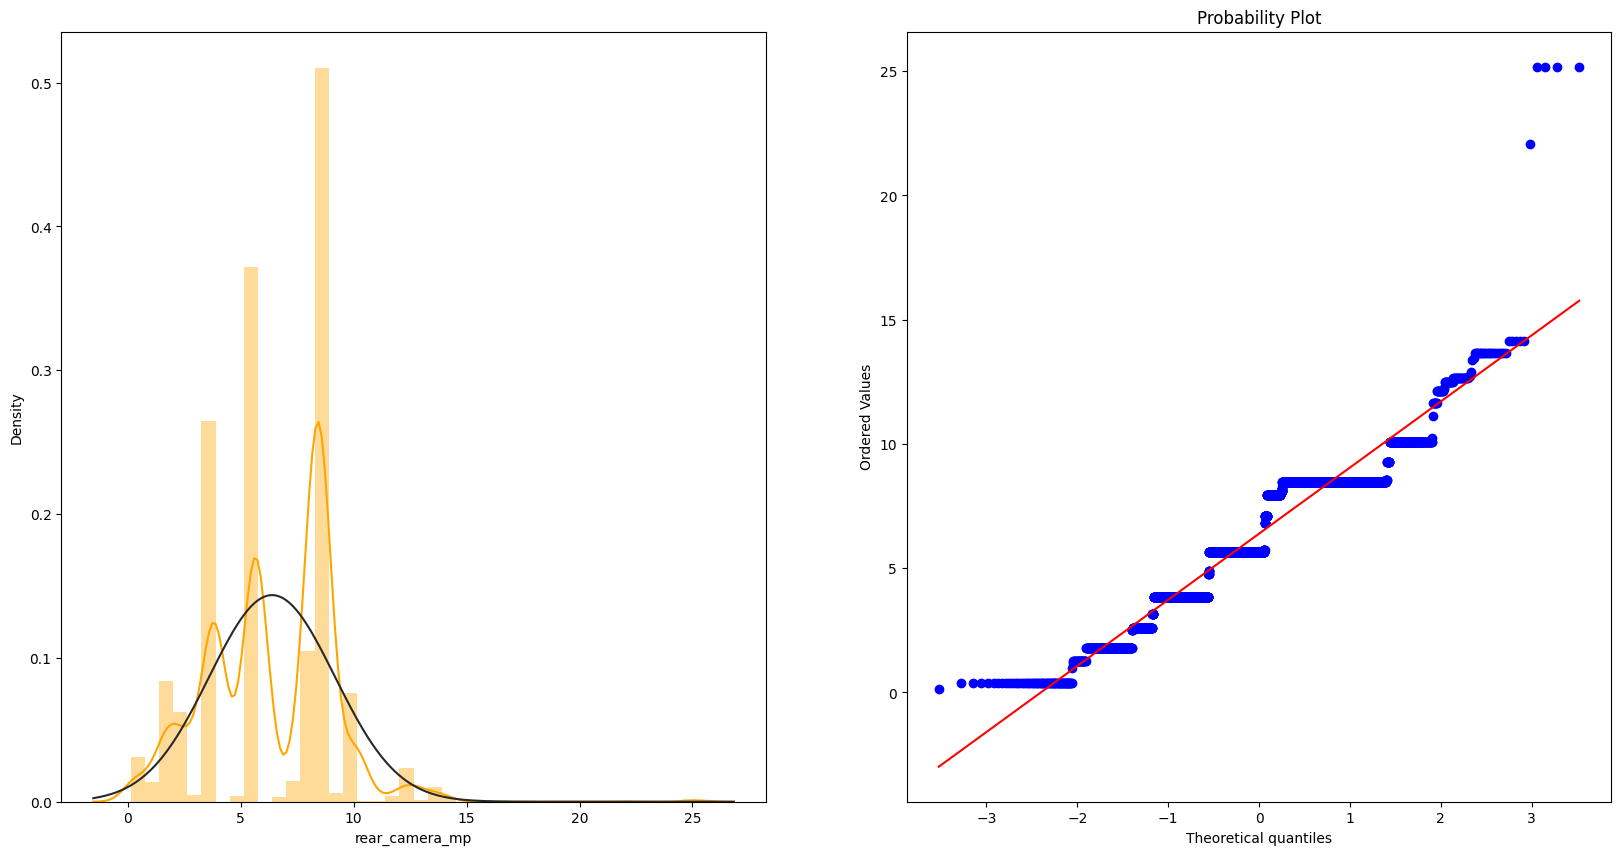

In [ ]:
for x in transformations:
    trying_different_transformations('rear_camera_mp',x)

# Trying different transformations on front_camera_mp feature

BoxCox - front_camera_mp
mu  1.526814487656646  sigma  0.8193688155070813
Log - front_camera_mp
mu  1.5881763402721587  sigma  0.8715756237382545
Reciprocal - front_camera_mp
mu  0.7395276436723018  sigma  1.1133356363904017
Square_Root - front_camera_mp
mu  2.1439325683717114  sigma  1.2236598749843581
Exponential - front_camera_mp
mu  4.201861528431512  sigma  3.8187590832601868


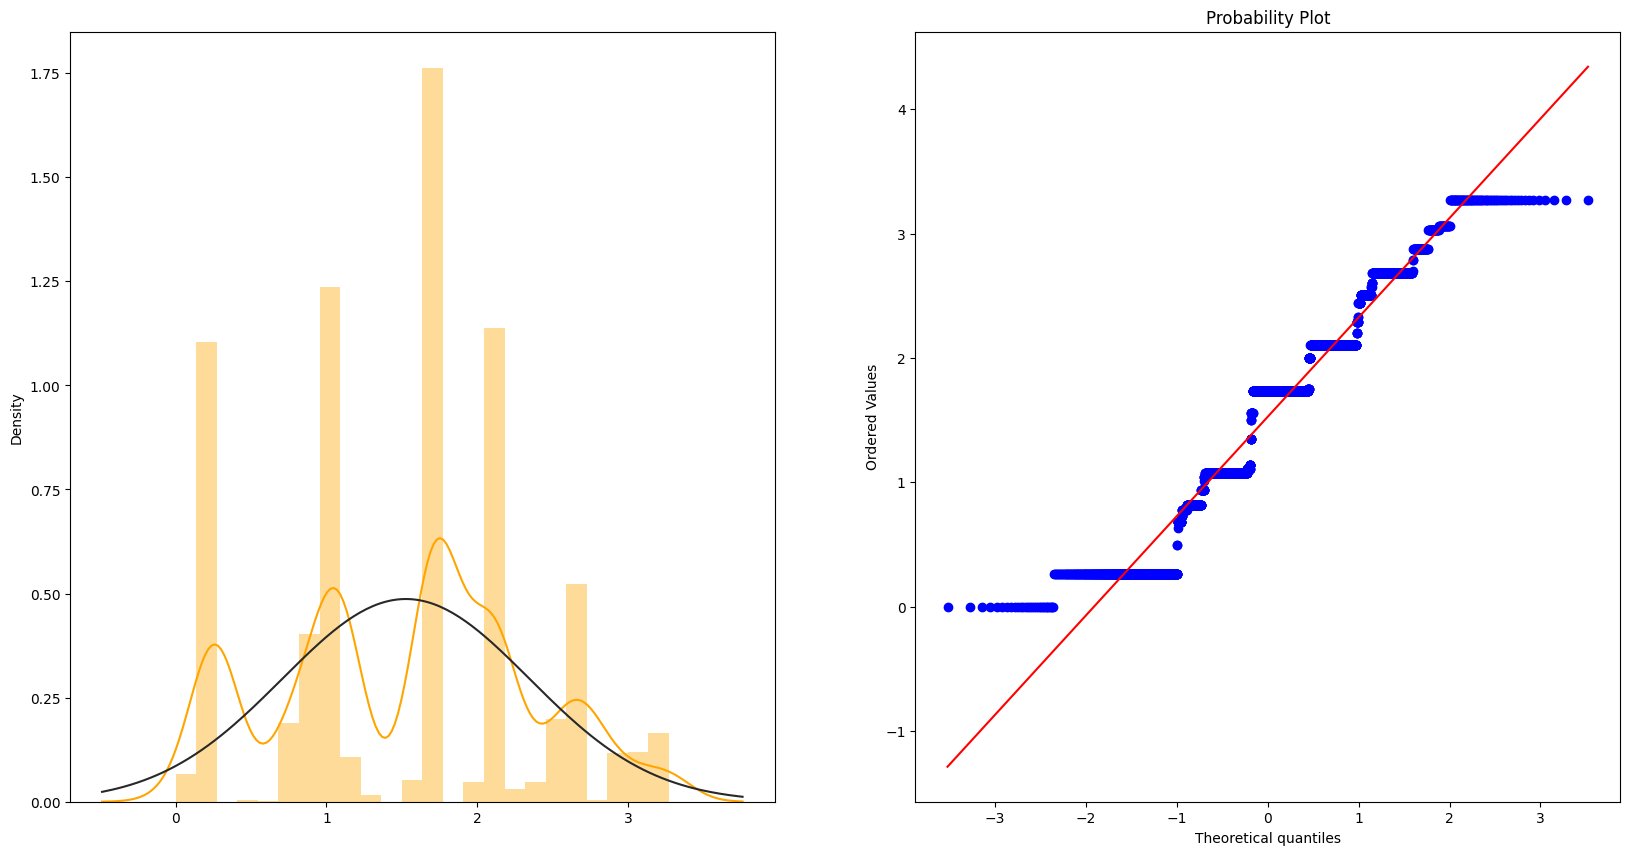

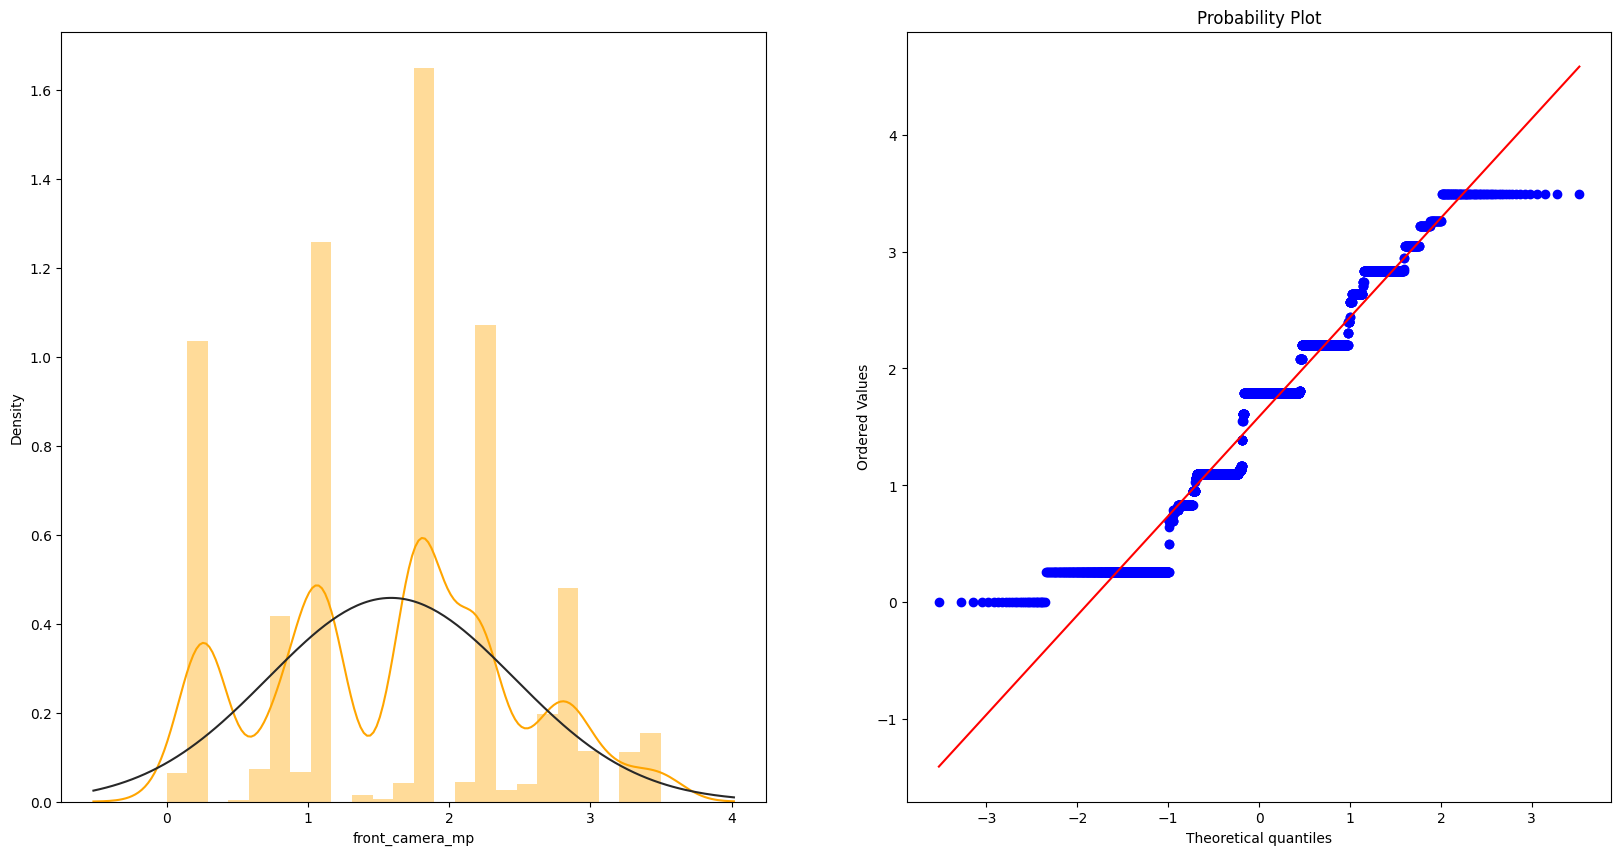

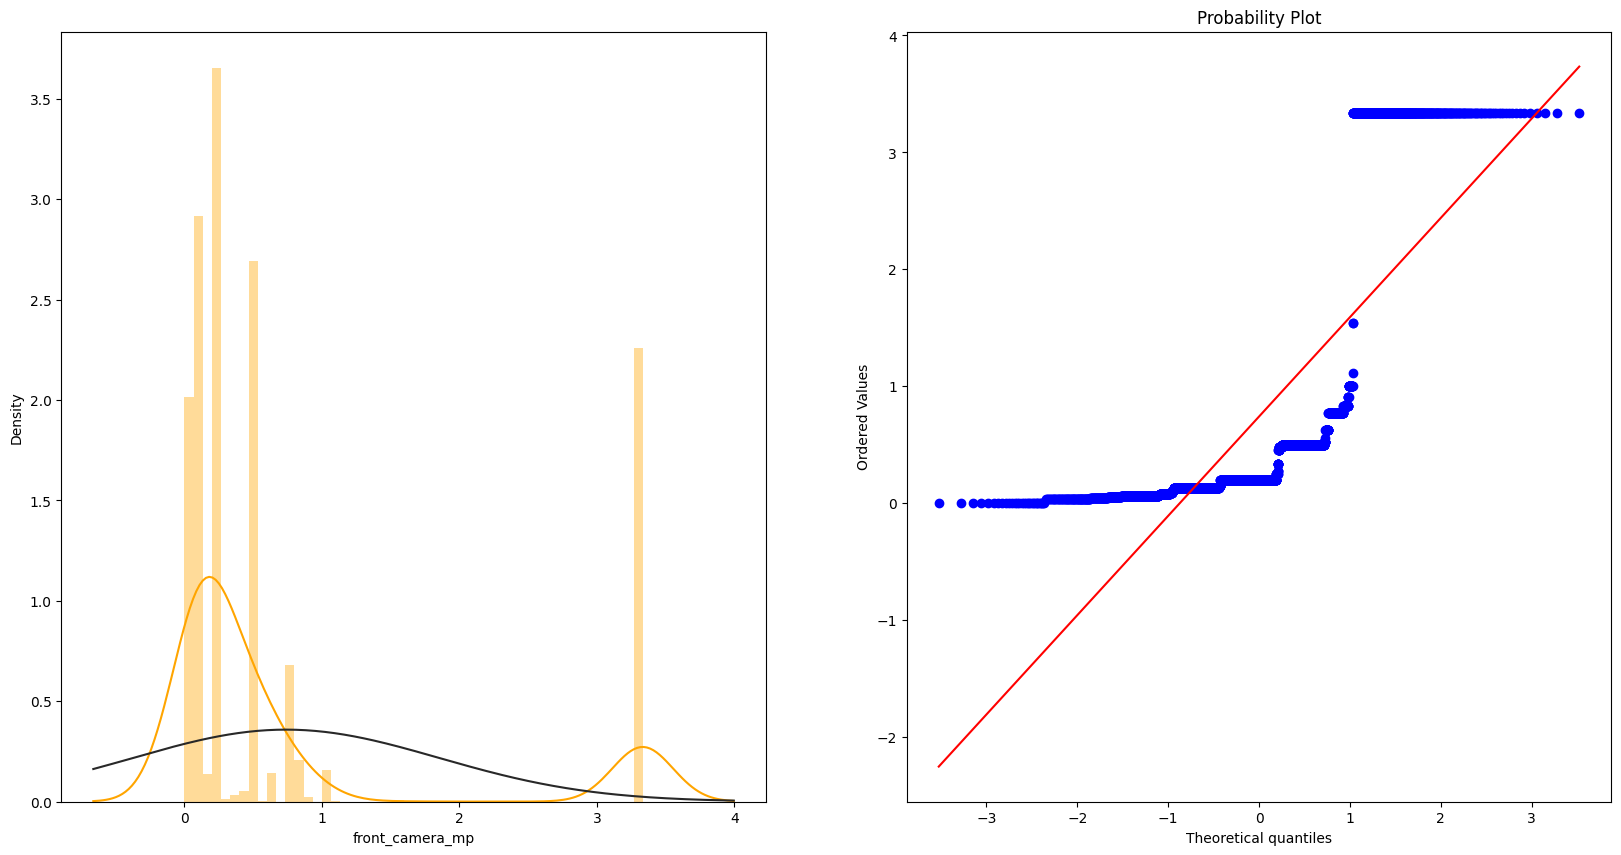

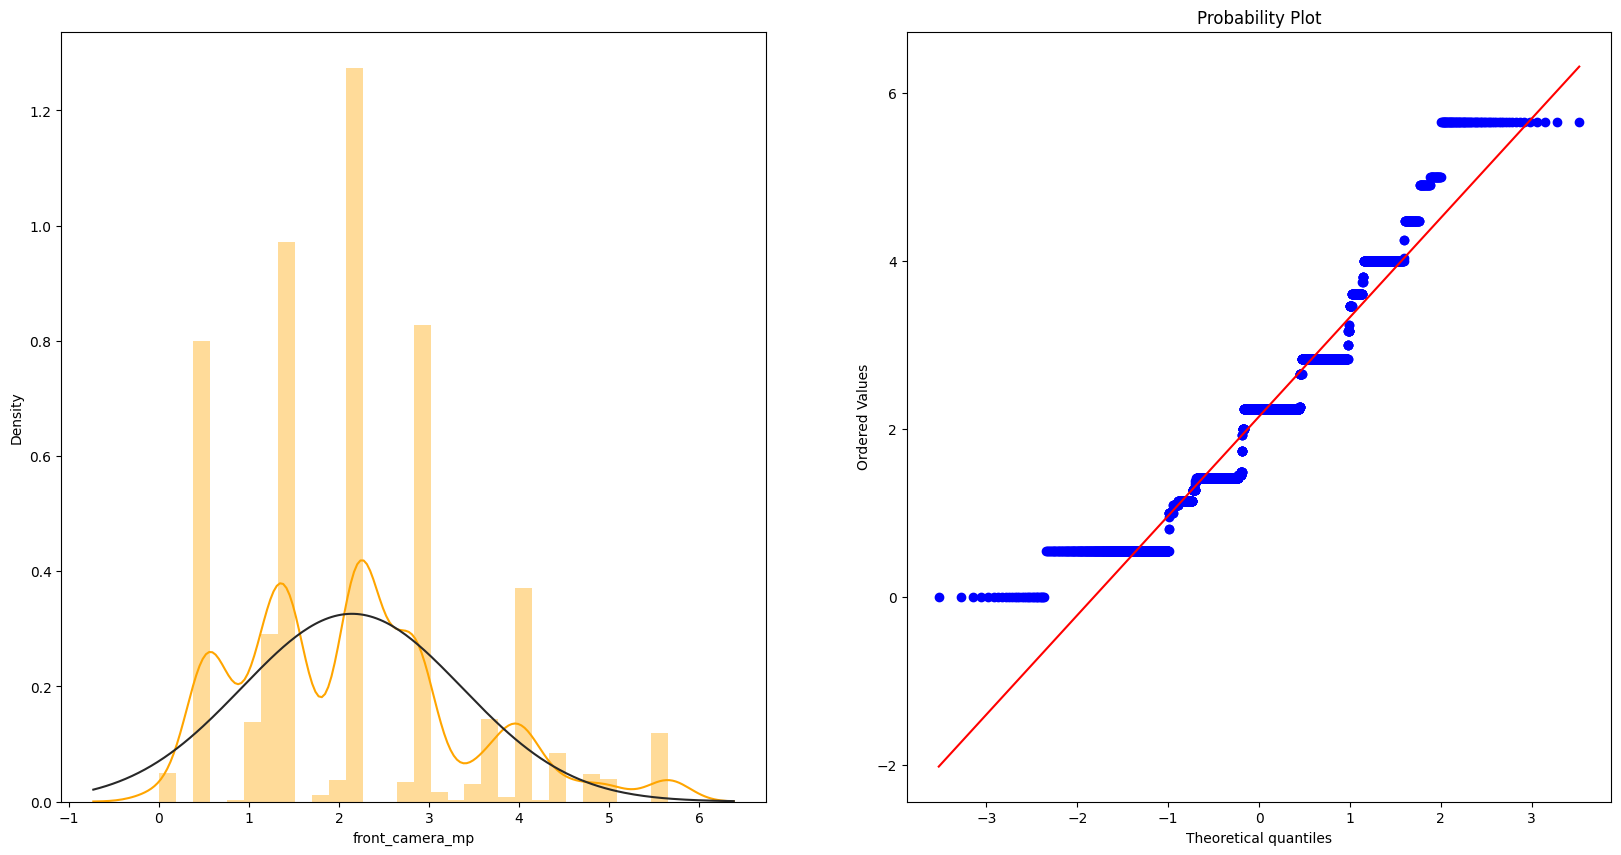

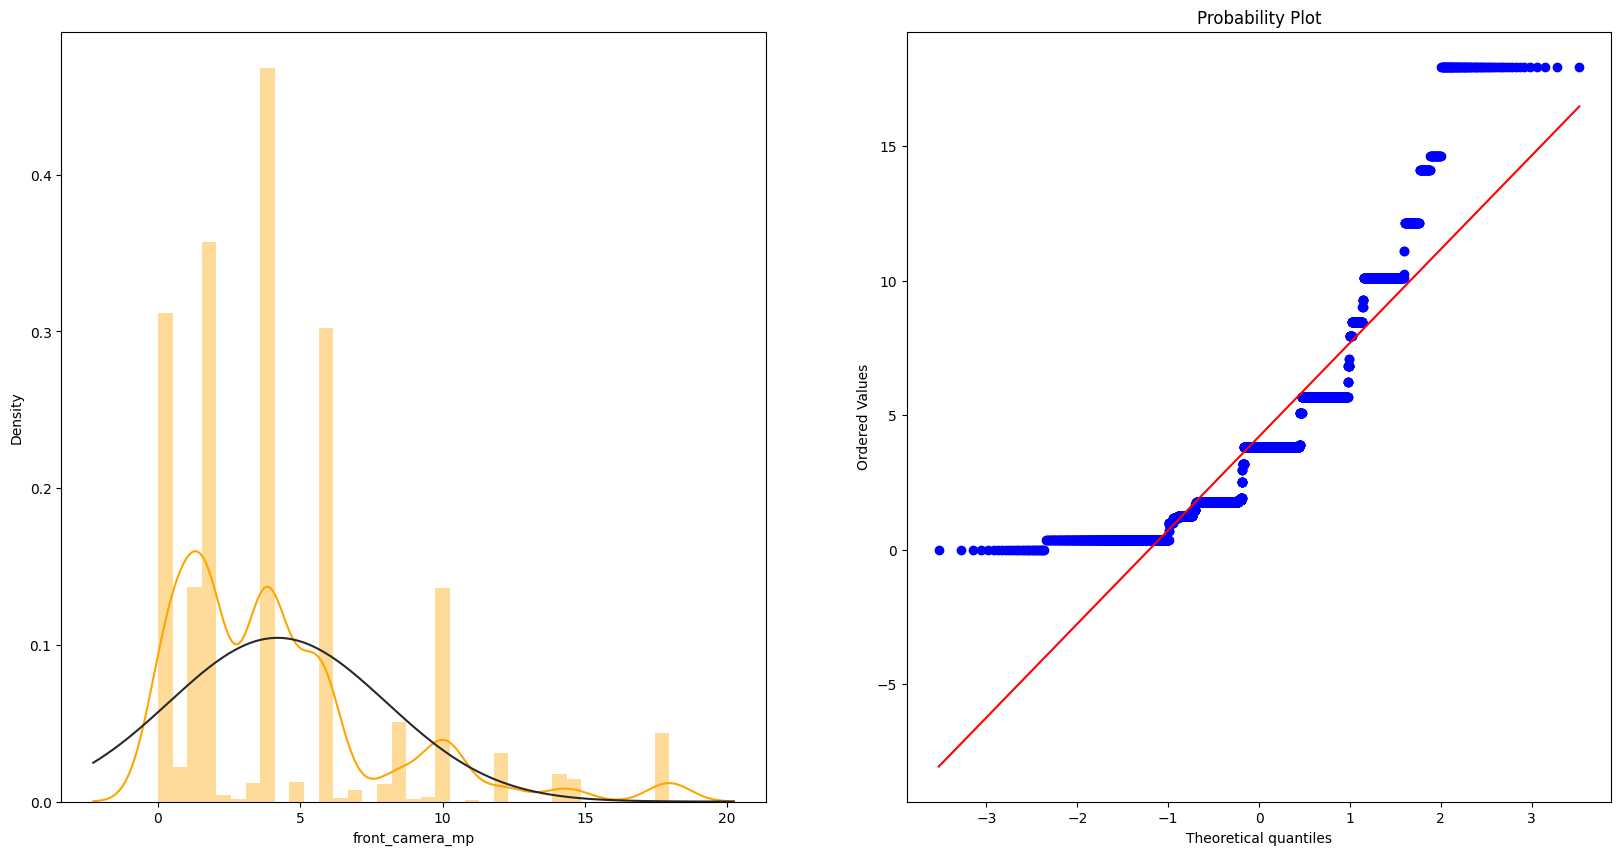

In [ ]:
for x in transformations:
    trying_different_transformations('front_camera_mp',x)

# Trying different transformations on battery feature

BoxCox - battery
mu  9.140953964131787  sigma  0.5274075304905204
Log - battery
mu  7.950738907016909  sigma  0.4018552646649475
Reciprocal - battery
mu  0.00038254872318301626  sigma  0.00016467025906119576
Square_Root - battery
mu  54.34431173601634  sigma  11.028271505952869
Exponential - battery
mu  797.3570202661799  sigma  275.7825894042893


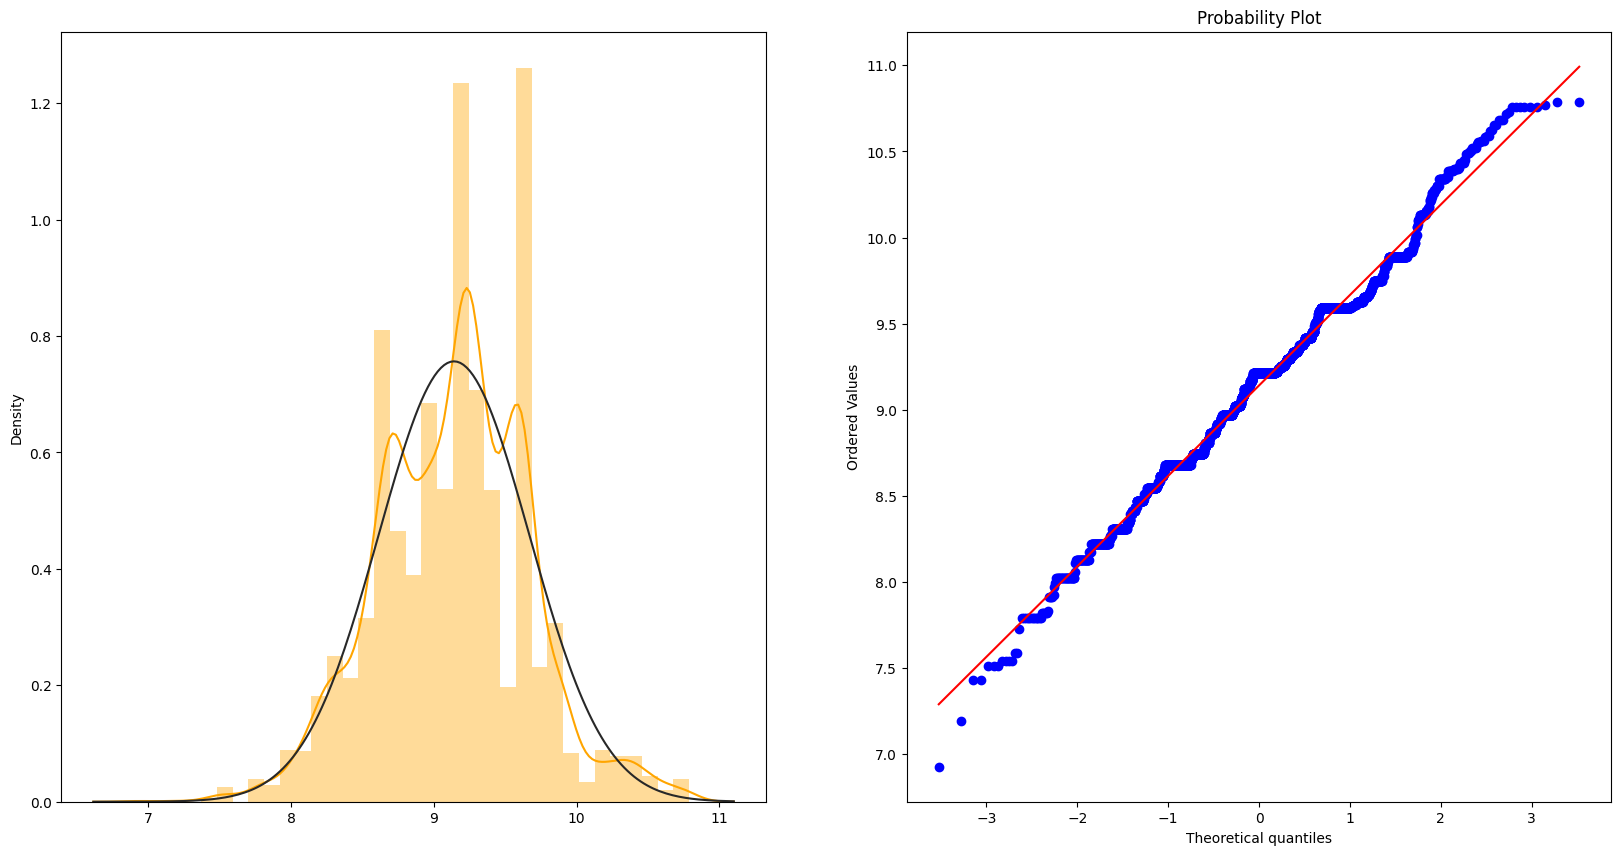

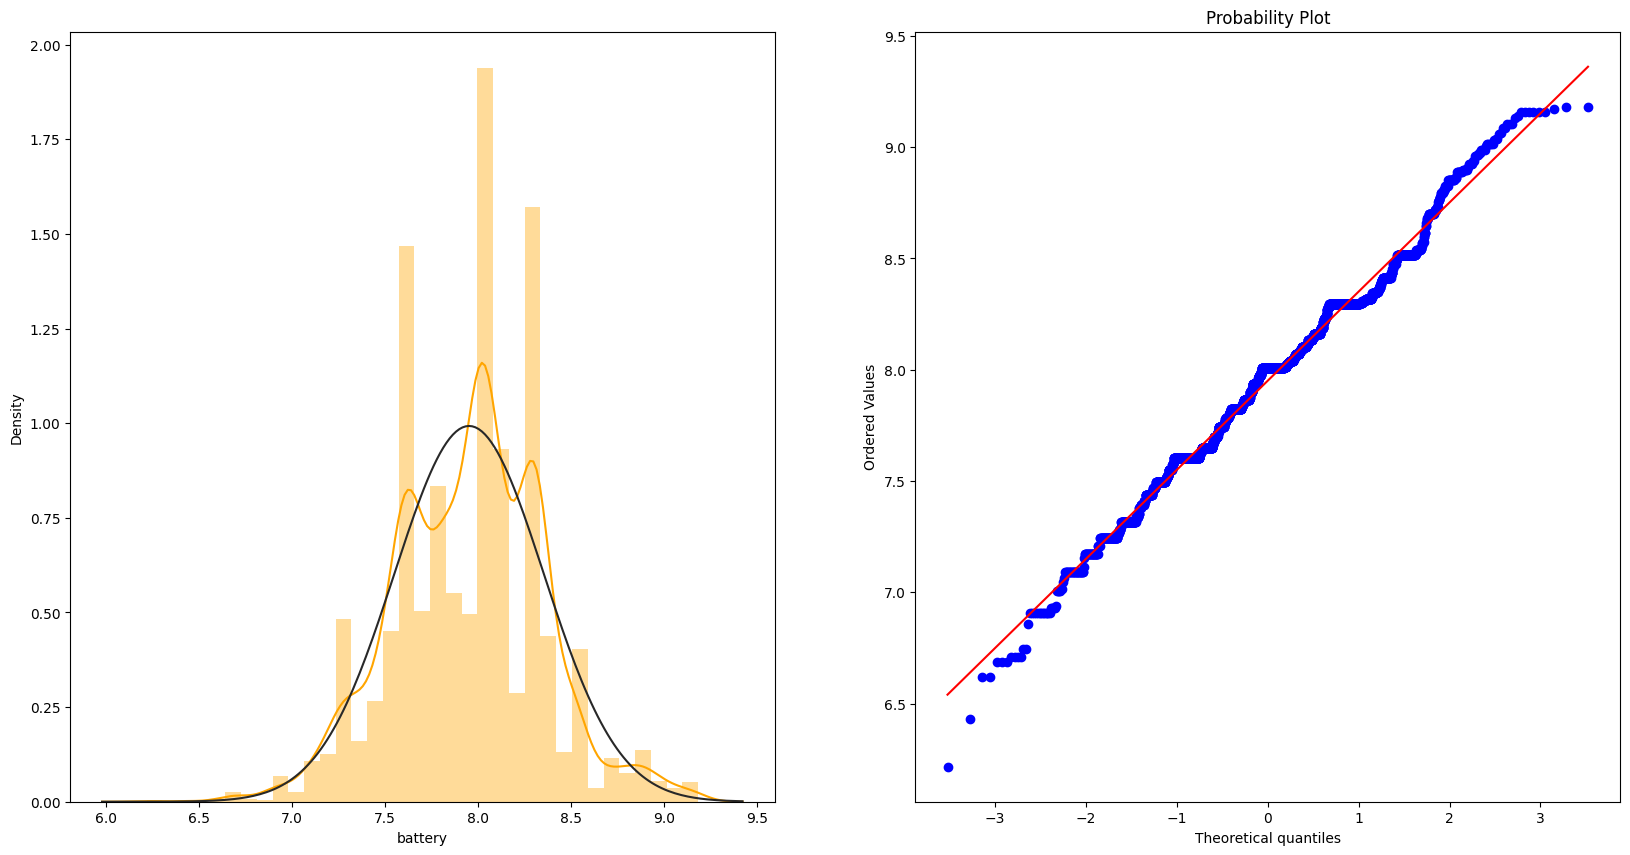

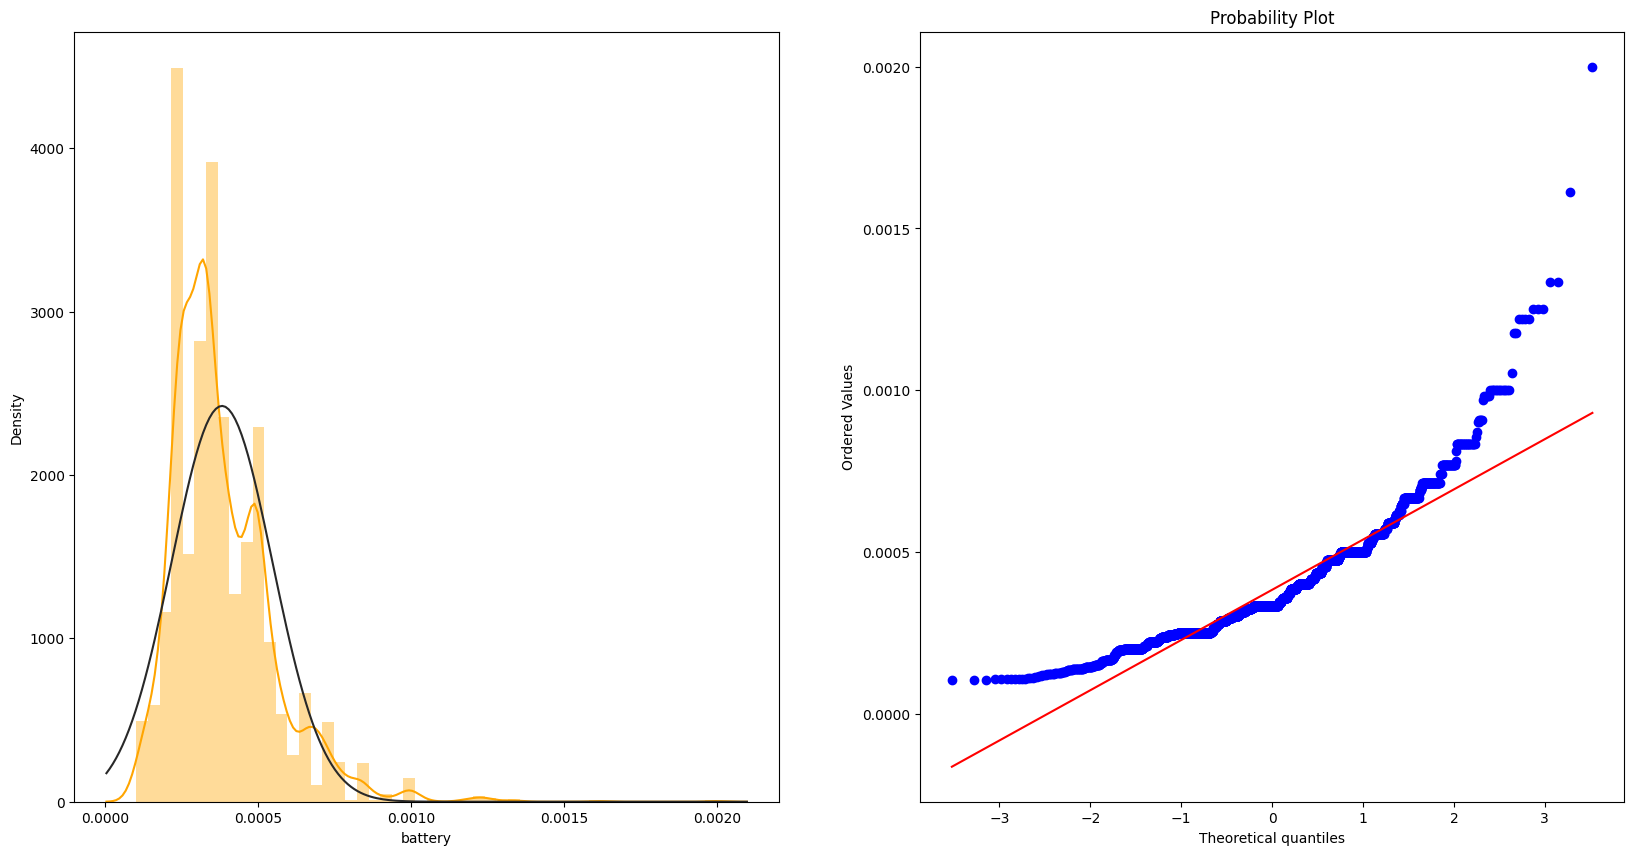

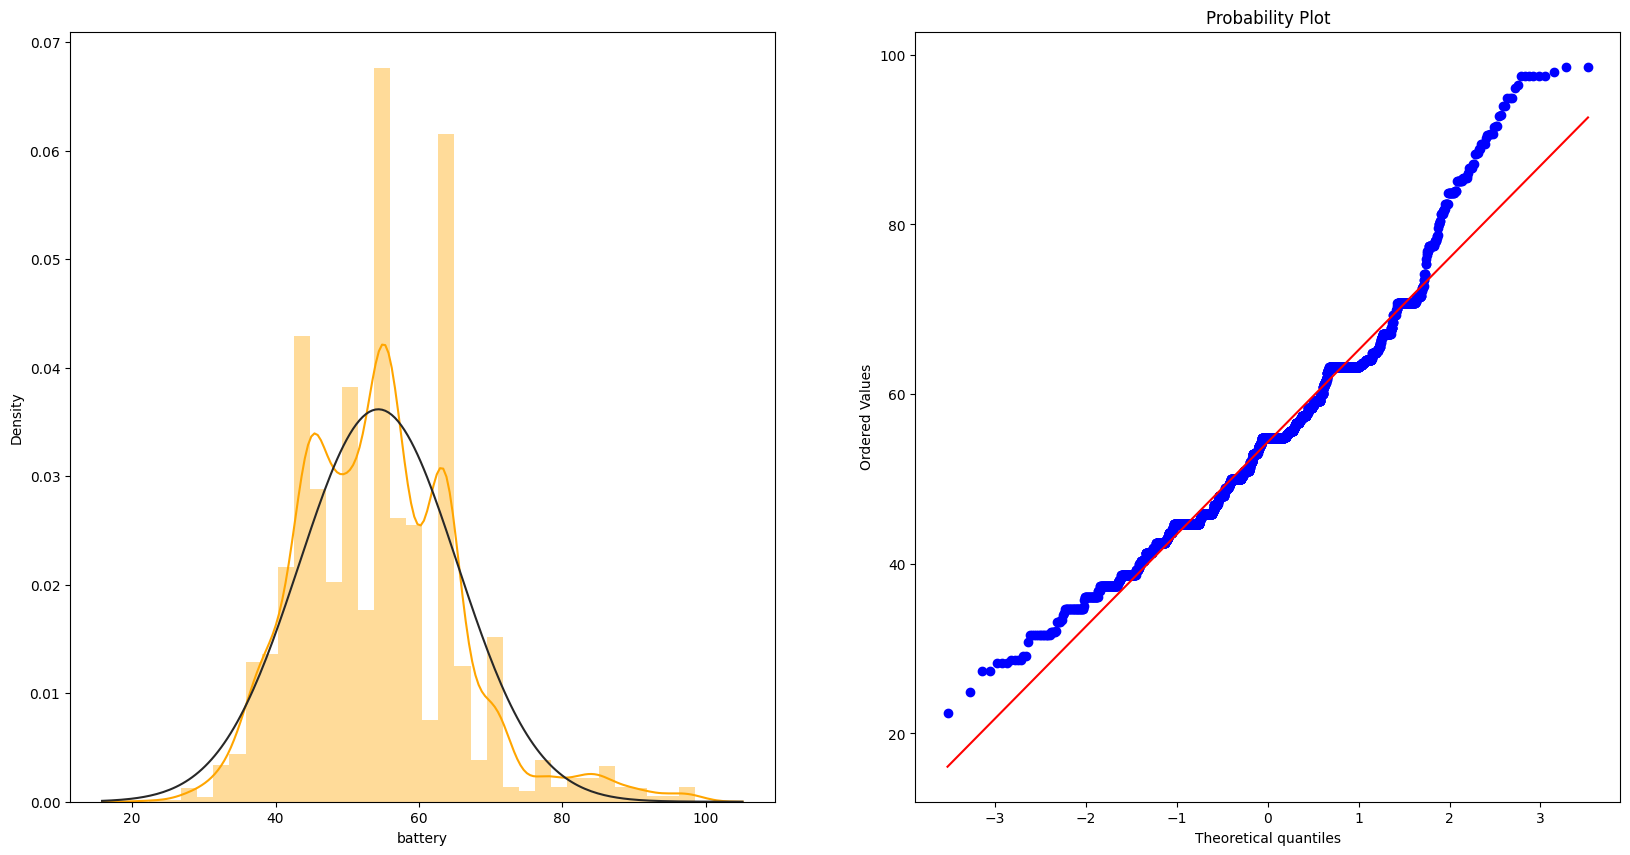

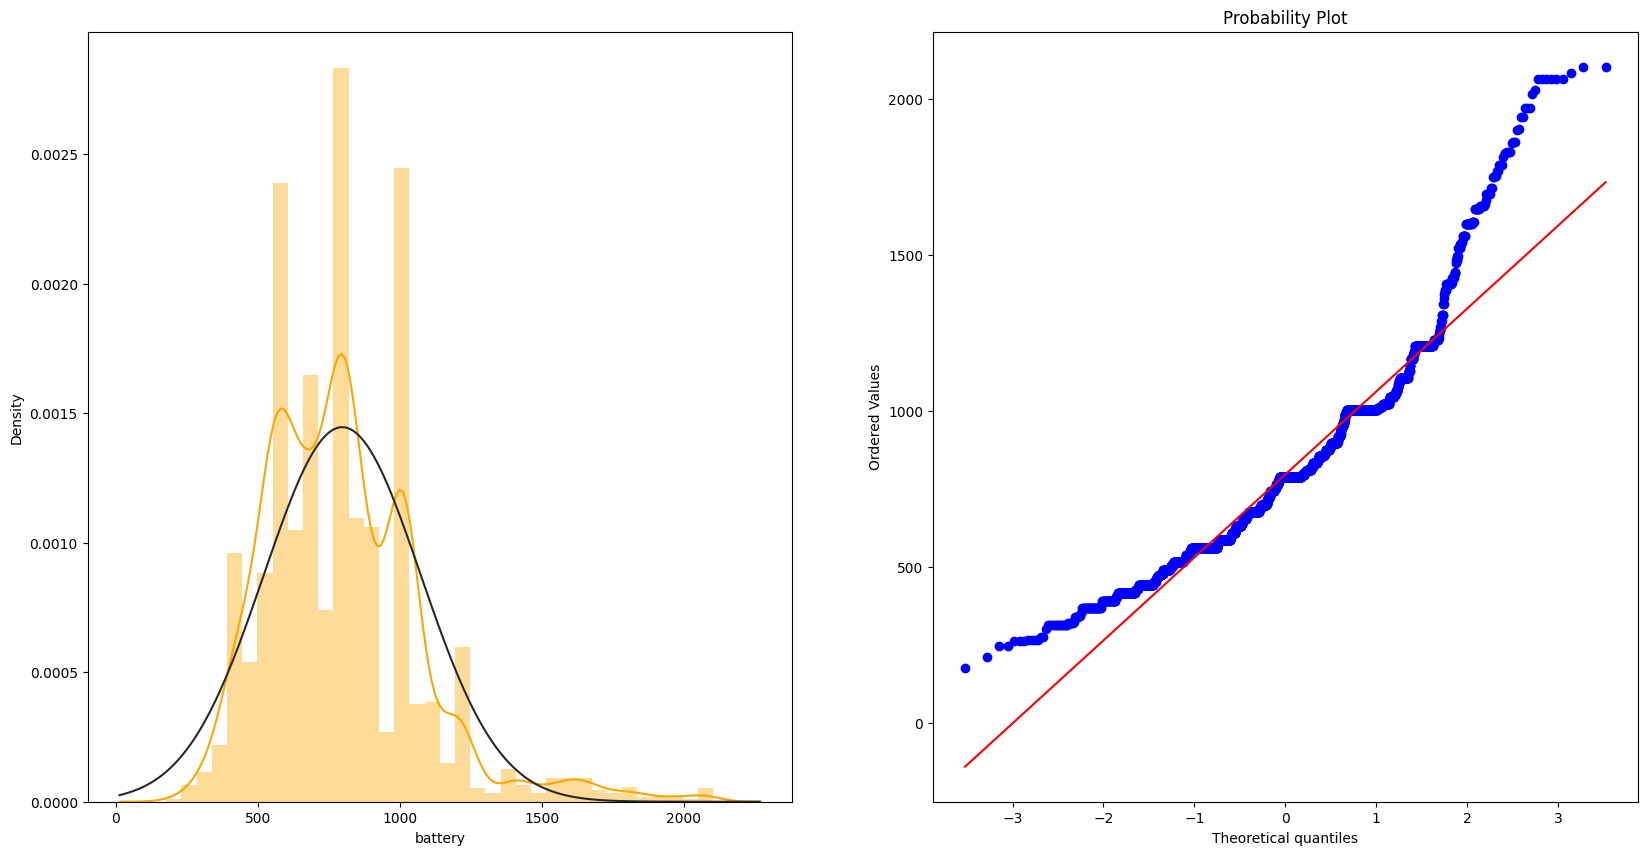

In [ ]:
for x in transformations:
    trying_different_transformations('battery',x)

# Trying different transformations on weight feature

BoxCox - weight
mu  0.8331452103173497  sigma  0.0006235641941258424
Log - weight
mu  5.1382326242001595  sigma  0.3466813526975624
Reciprocal - weight
mu  0.006213180426972396  sigma  0.0017488702471315902
Square_Root - weight
mu  13.23412673316506  sigma  2.711369811299194
Exponential - weight
mu  75.69601373789506  sigma  29.257851090331783


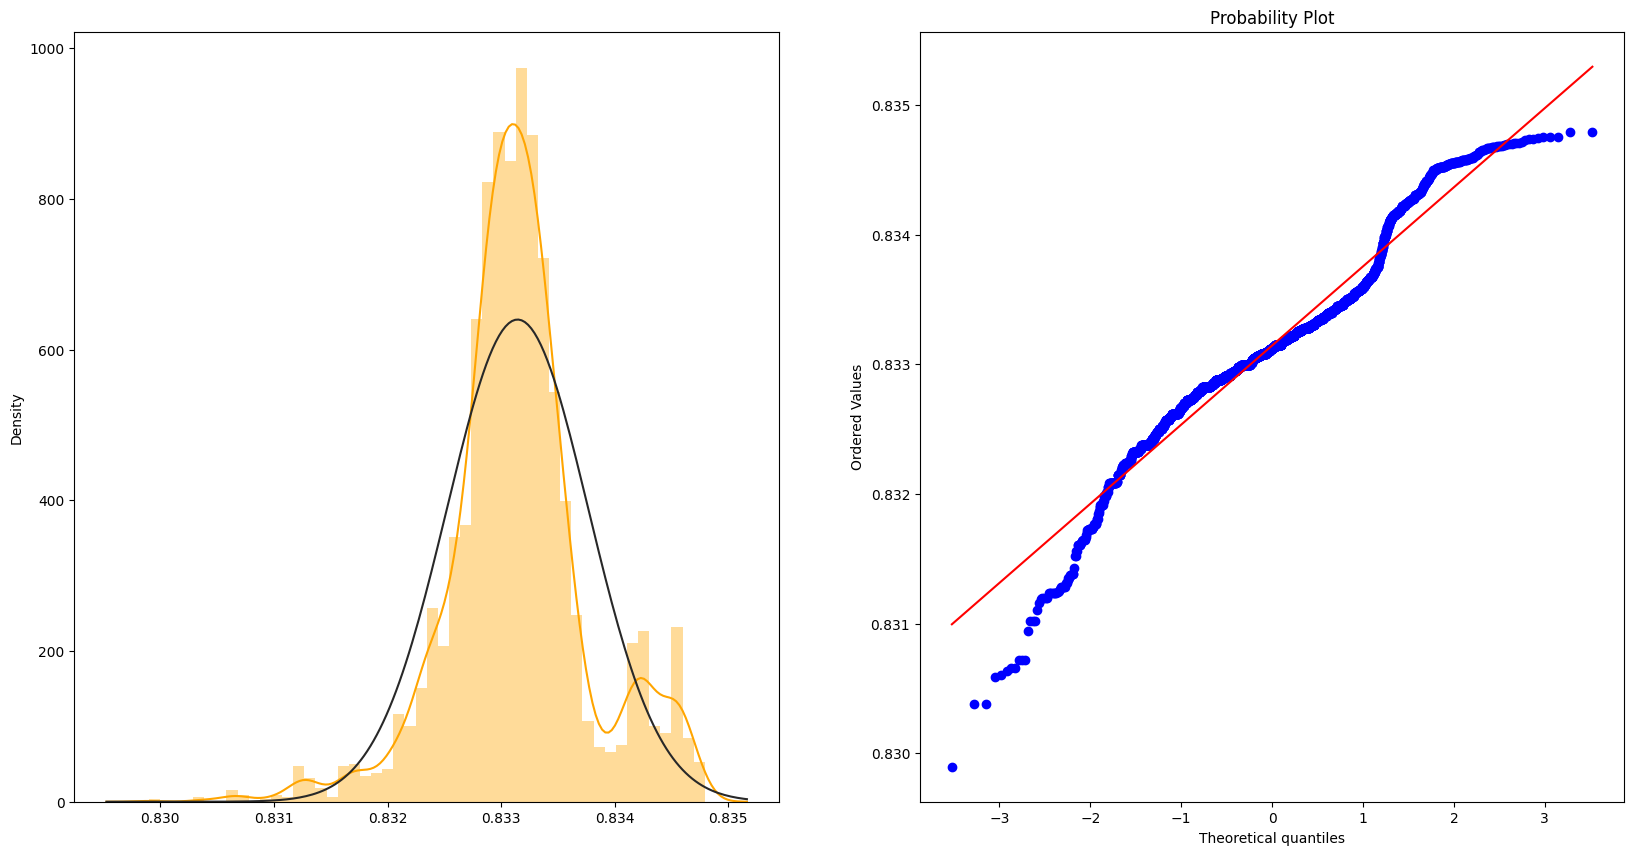

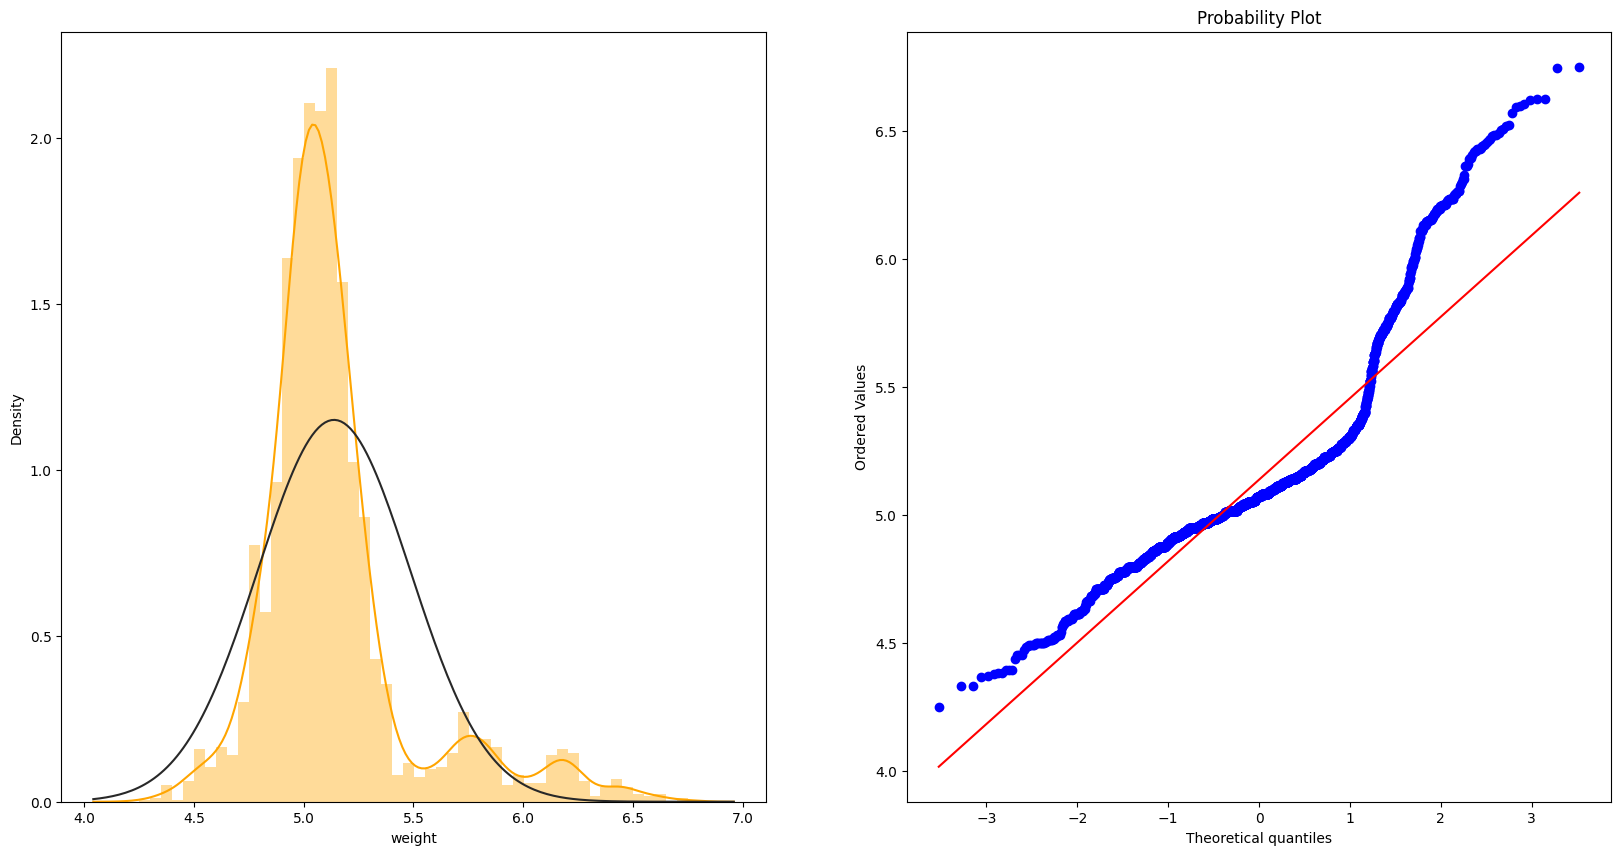

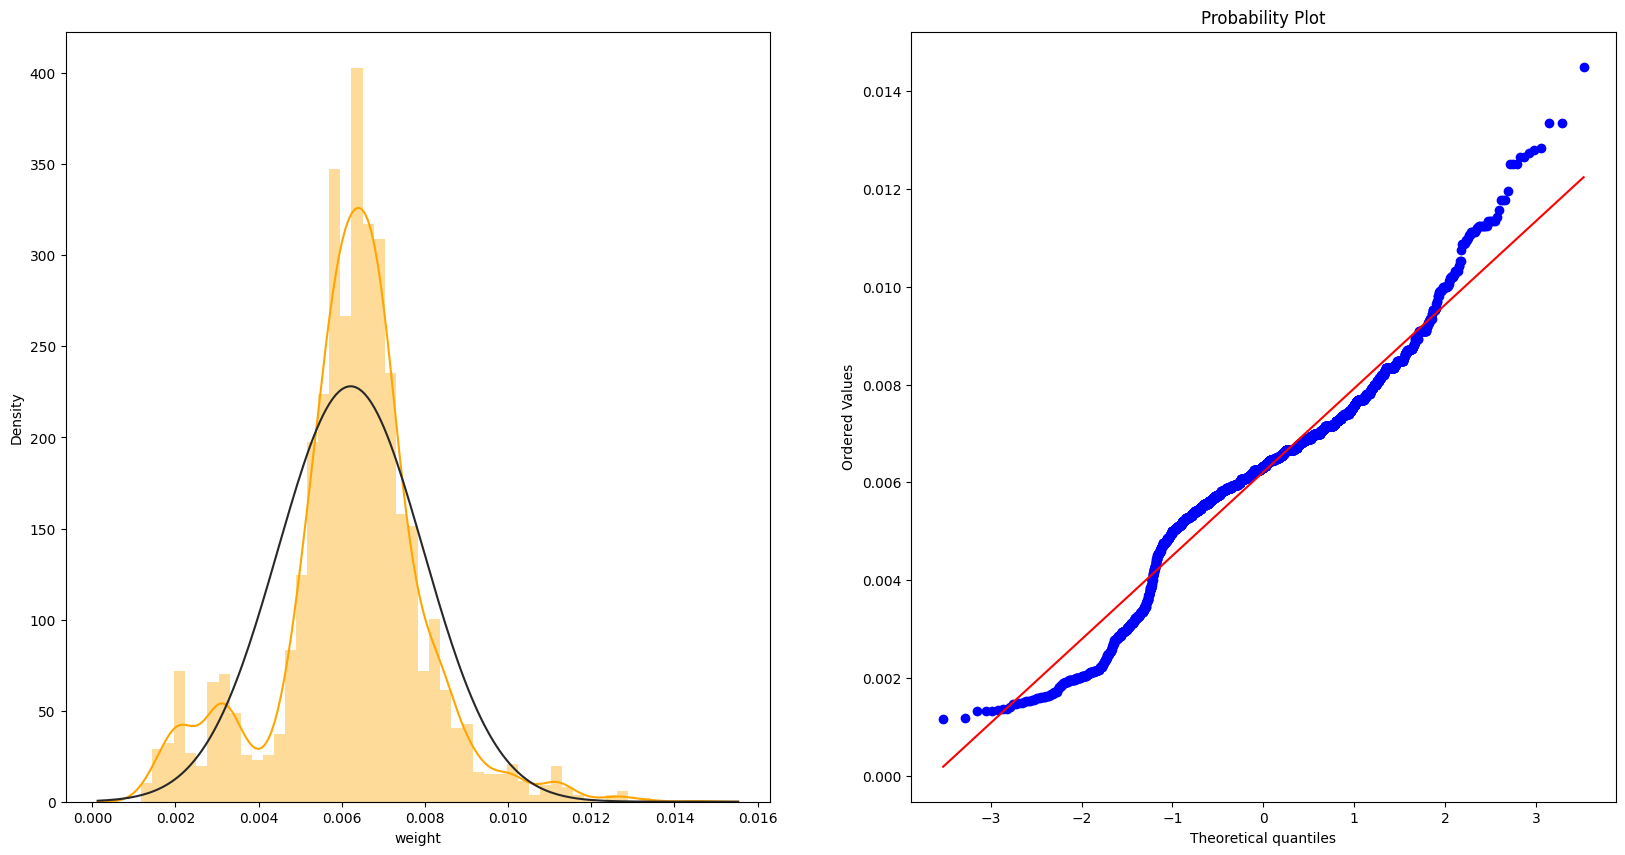

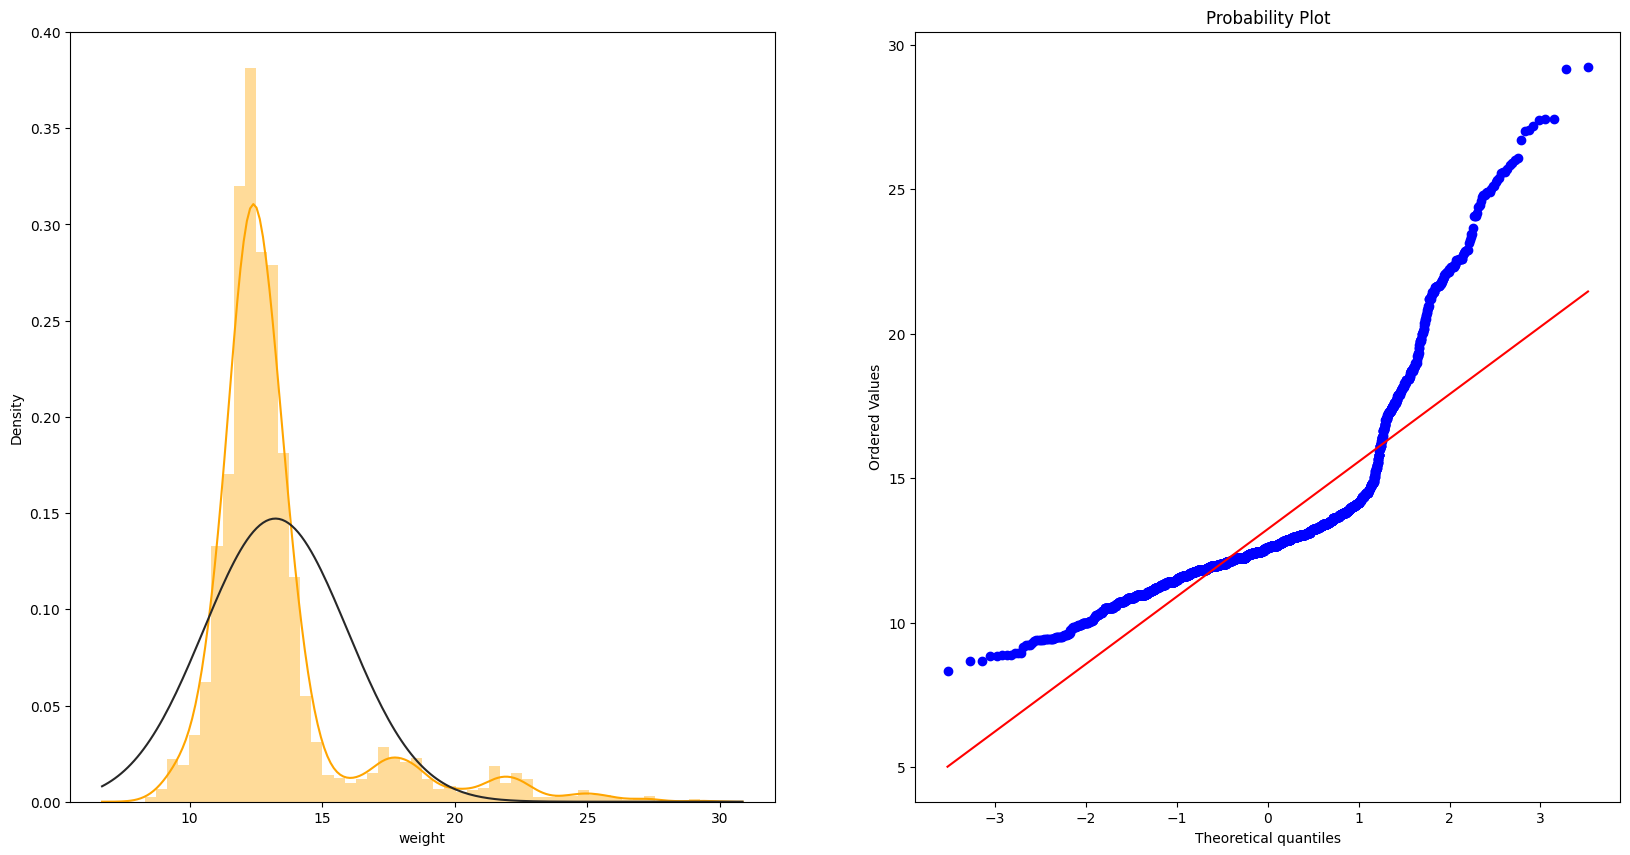

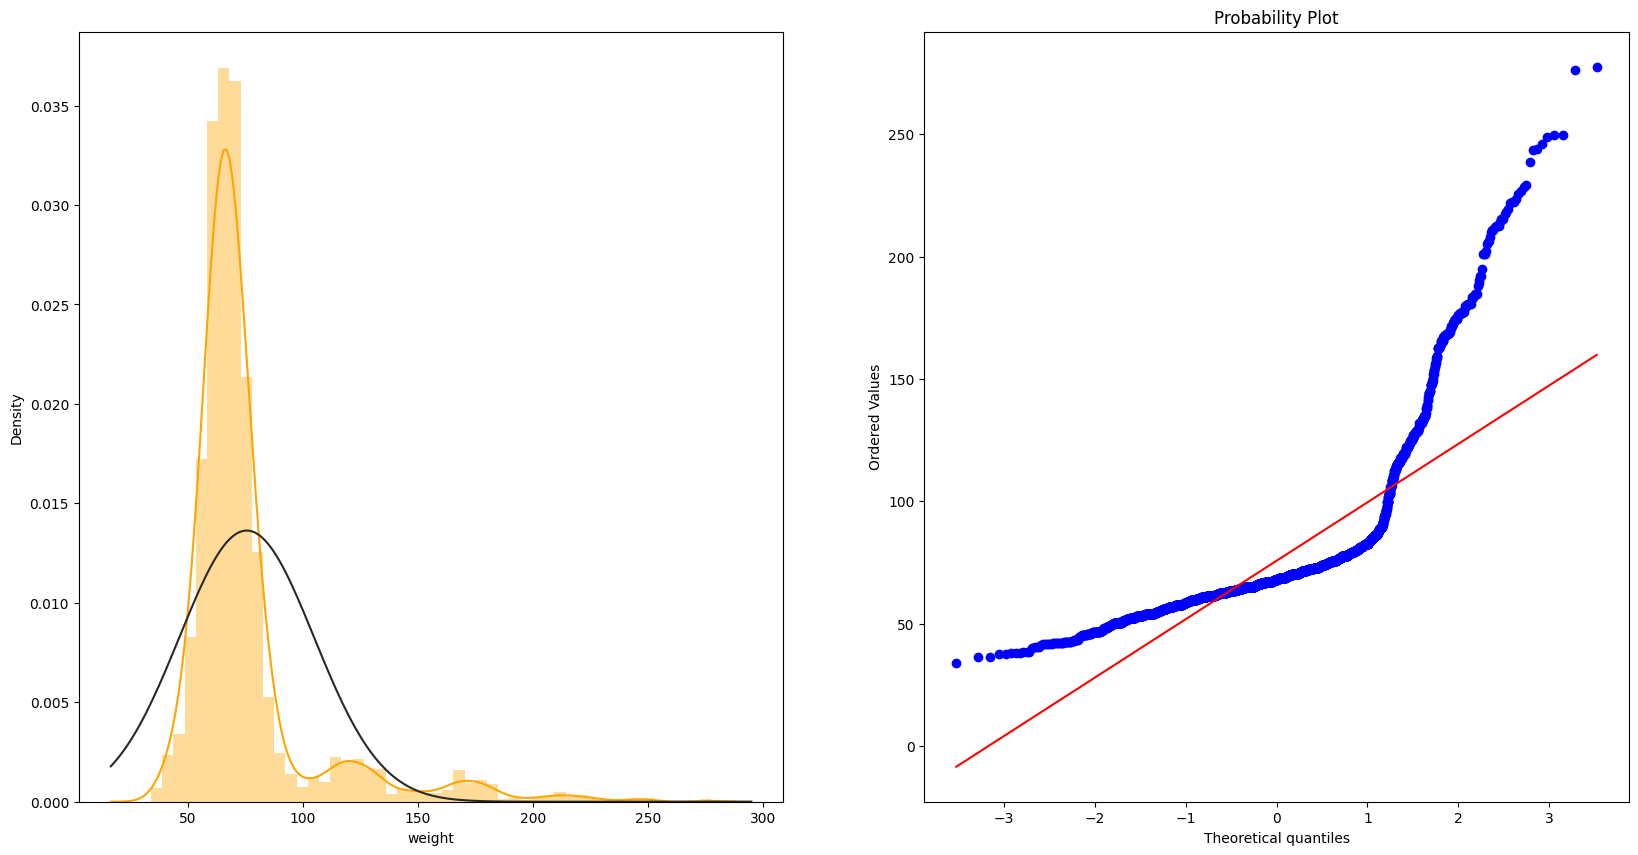

In [ ]:
for x in transformations:
    trying_different_transformations('weight',x)

# Trying different transformations on days_used feature

BoxCox - days_used
mu  3496.8060650127313  sigma  1439.0443935003193
Log - days_used
mu  6.468905953652584  sigma  0.4336628749605923
Reciprocal - days_used
mu  0.0017471434574026178  sigma  0.0011108860529121054
Square_Root - days_used
mu  25.917714586315785  sigma  4.895654067969873
Exponential - days_used
mu  231.58748020692875  sigma  67.54464188114896


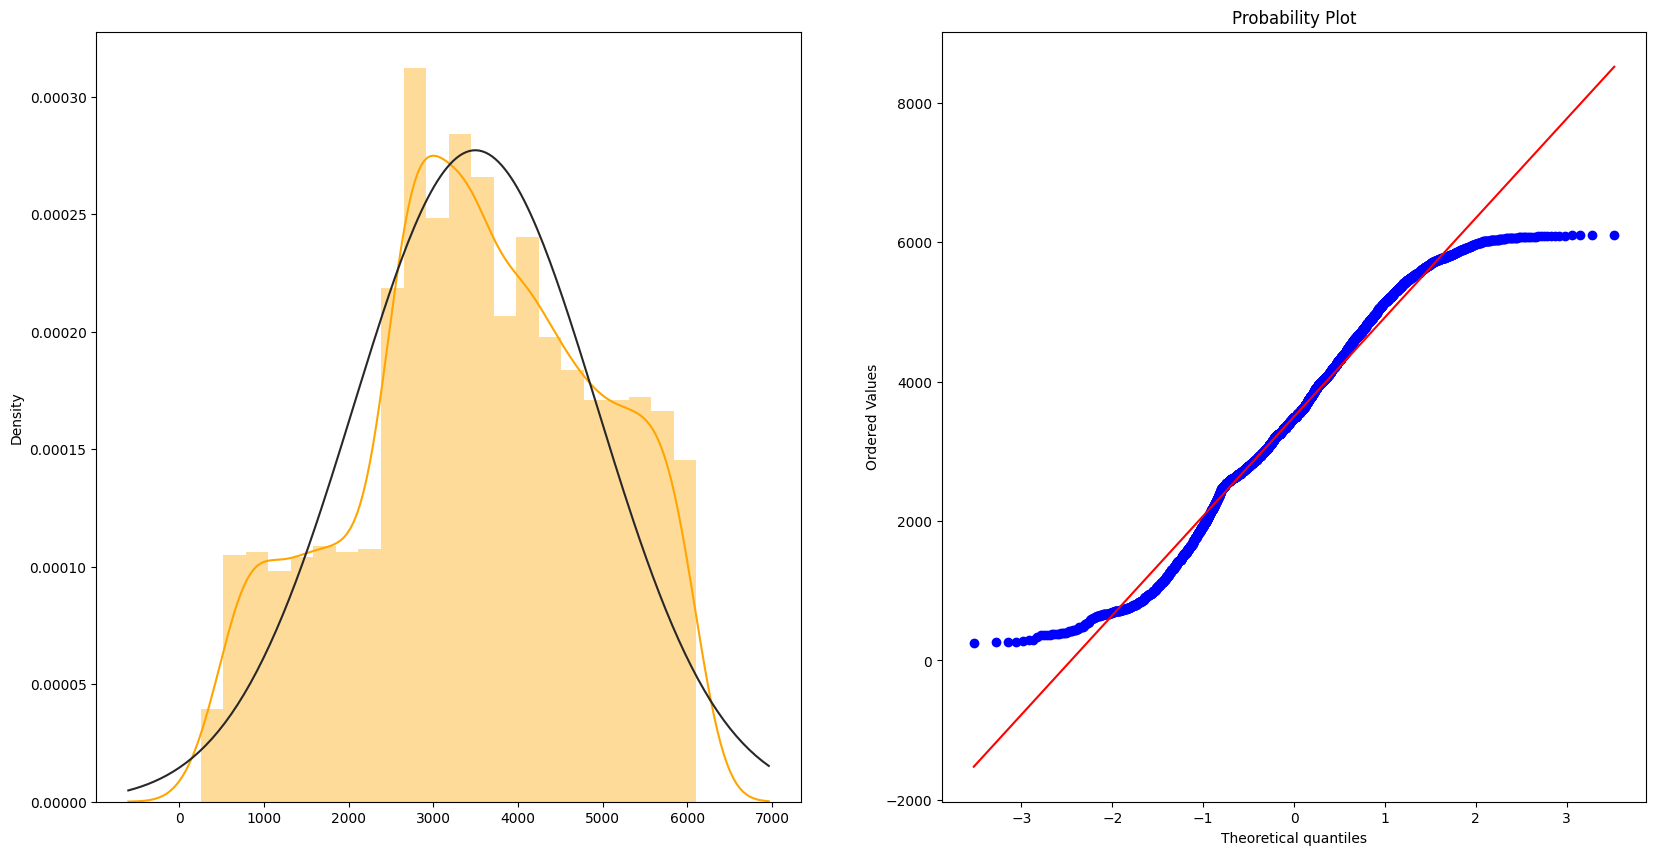

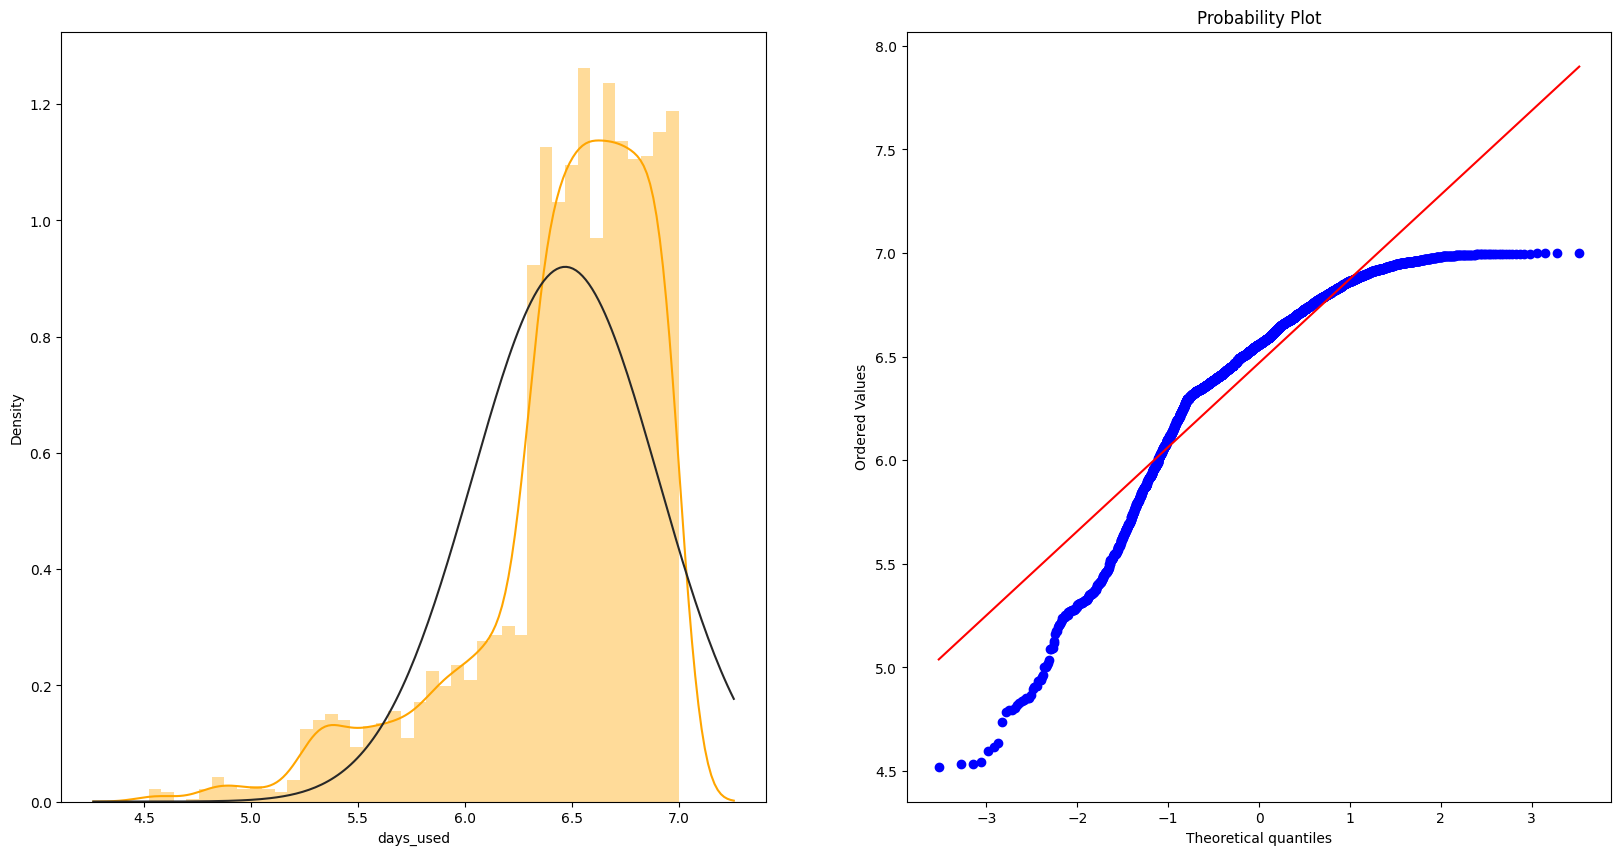

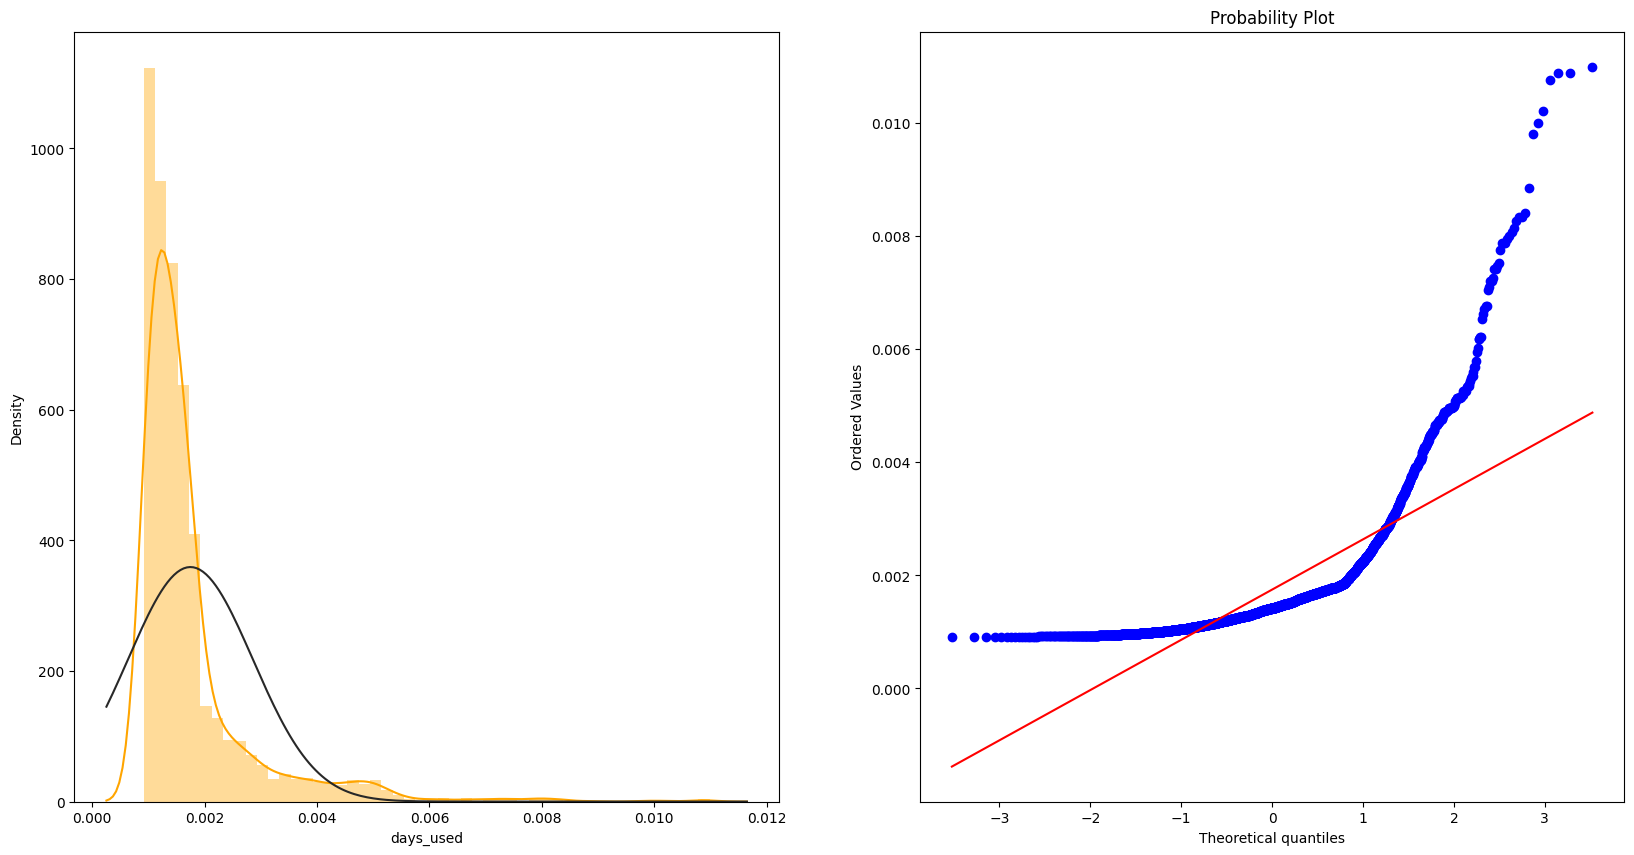

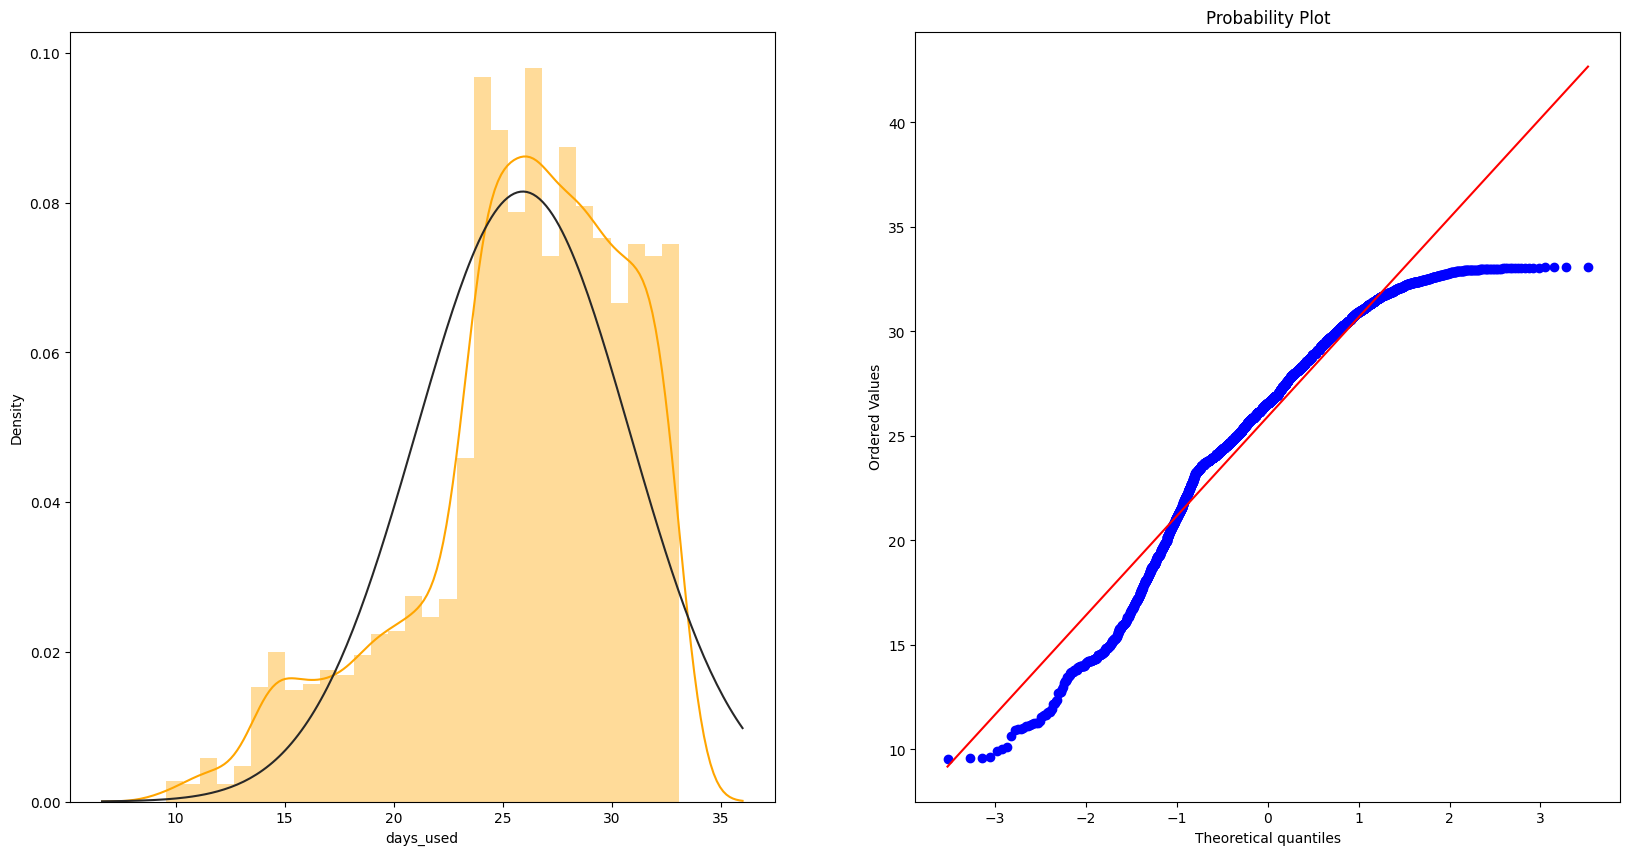

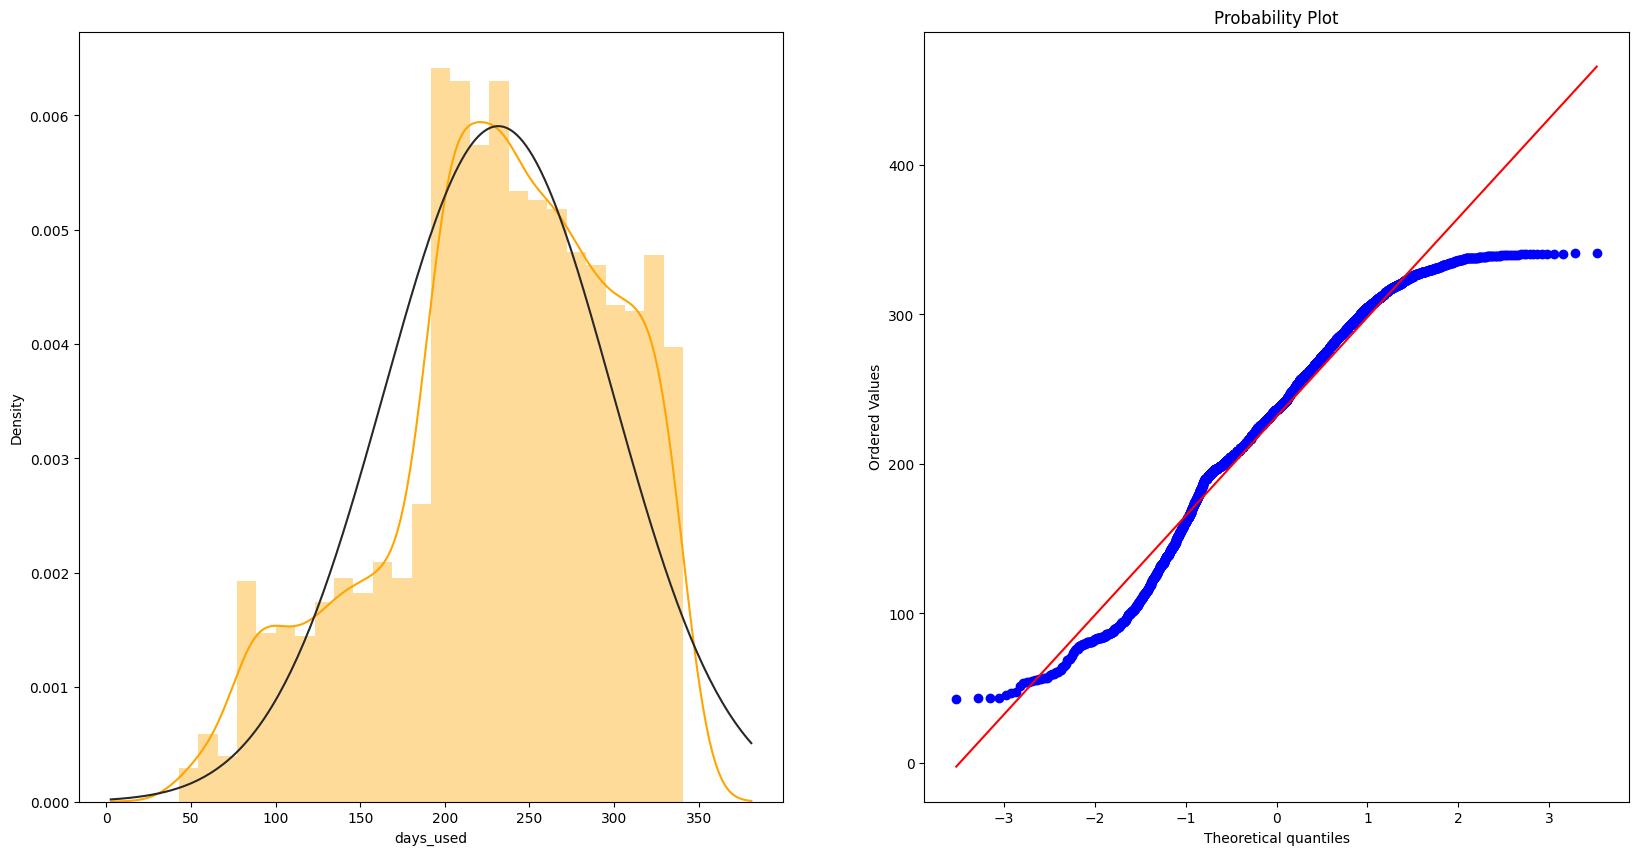

In [ ]:
for x in transformations:
    trying_different_transformations('days_used',x)

# Applying transformations

In [ ]:
def skweness_correction(columnName):
    if columnName == 'front_camera_mp' or columnName == 'screen_size' or columnName == 'battery':
        data[columnName], temp_params = boxcox(
        data[columnName]+1)
    elif columnName == 'weight':
        data[columnName] = 1/data[columnName].replace([np.inf, -np.inf], 0)
    elif columnName =='rear_camera_mp':
        data[columnName] = data[columnName]**(1/2)
    print('''After Correcting''')
    (mu, sigma) = norm.fit(data[columnName])
    print("Mu after correcting {} : {}, Sigma after correcting {} : {}".format(
        columnName.upper(), mu, columnName.upper(), sigma))
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    sns.distplot(data[columnName], fit=norm, color="orange")
    plt.title(columnName.upper() +
              " Distplot After Skewness Correction", color="black")
    plt.subplot(1,2,2)
    stats.probplot(data[columnName], plot = plt)
    plt.show();

After Correcting
Mu after correcting SCREEN_SIZE : 3.569840560136016, Sigma after correcting SCREEN_SIZE : 0.45451365943440997


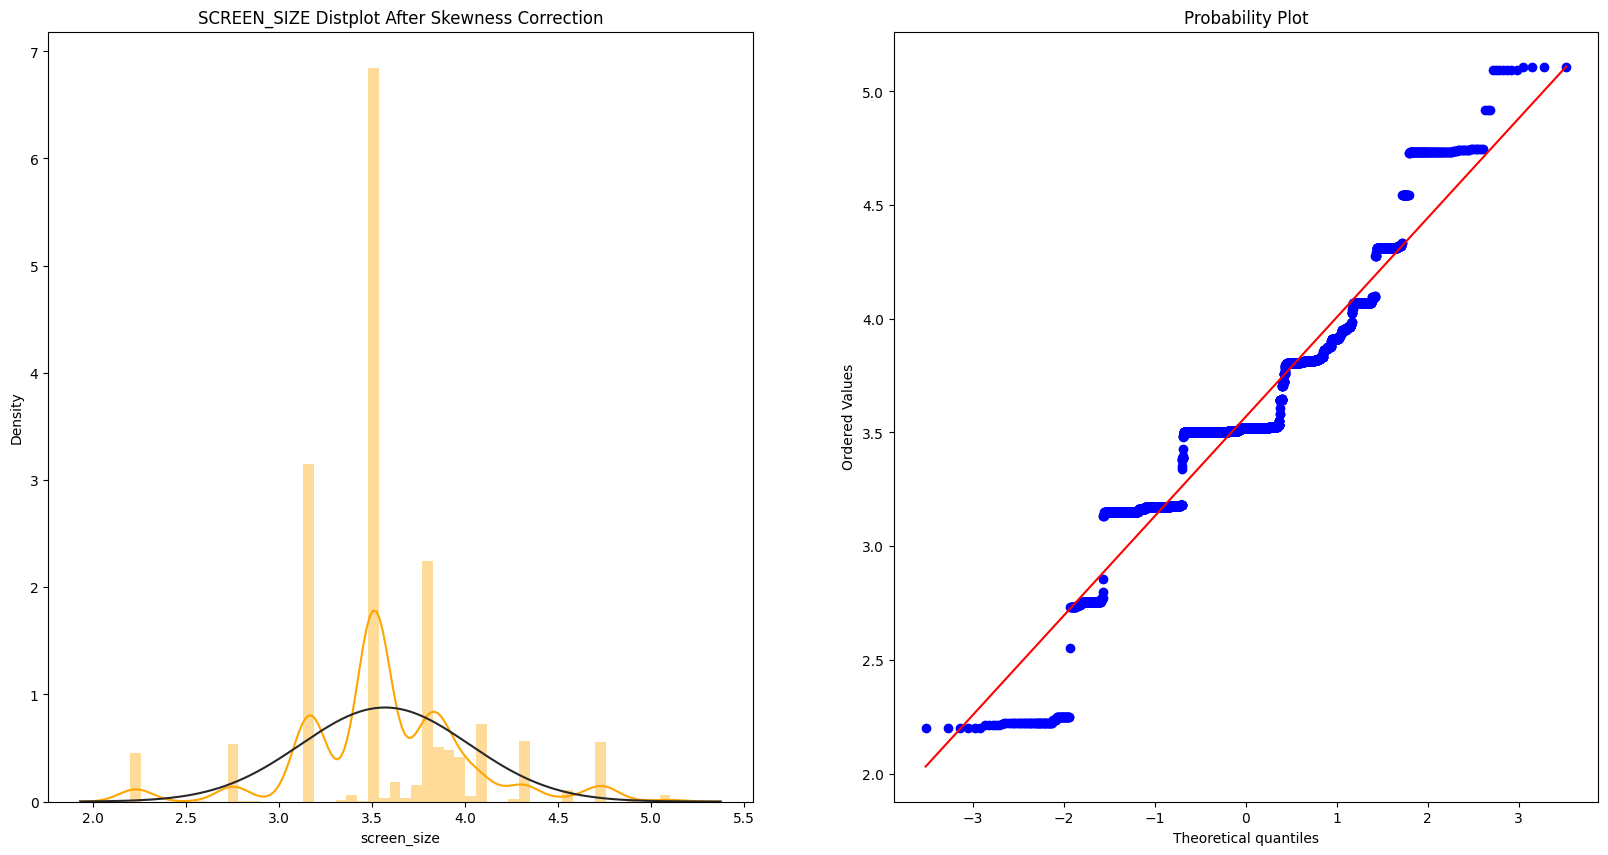

After Correcting
Mu after correcting REAR_CAMERA_MP : 2.9592967600910938, Sigma after correcting REAR_CAMERA_MP : 0.847889627462975


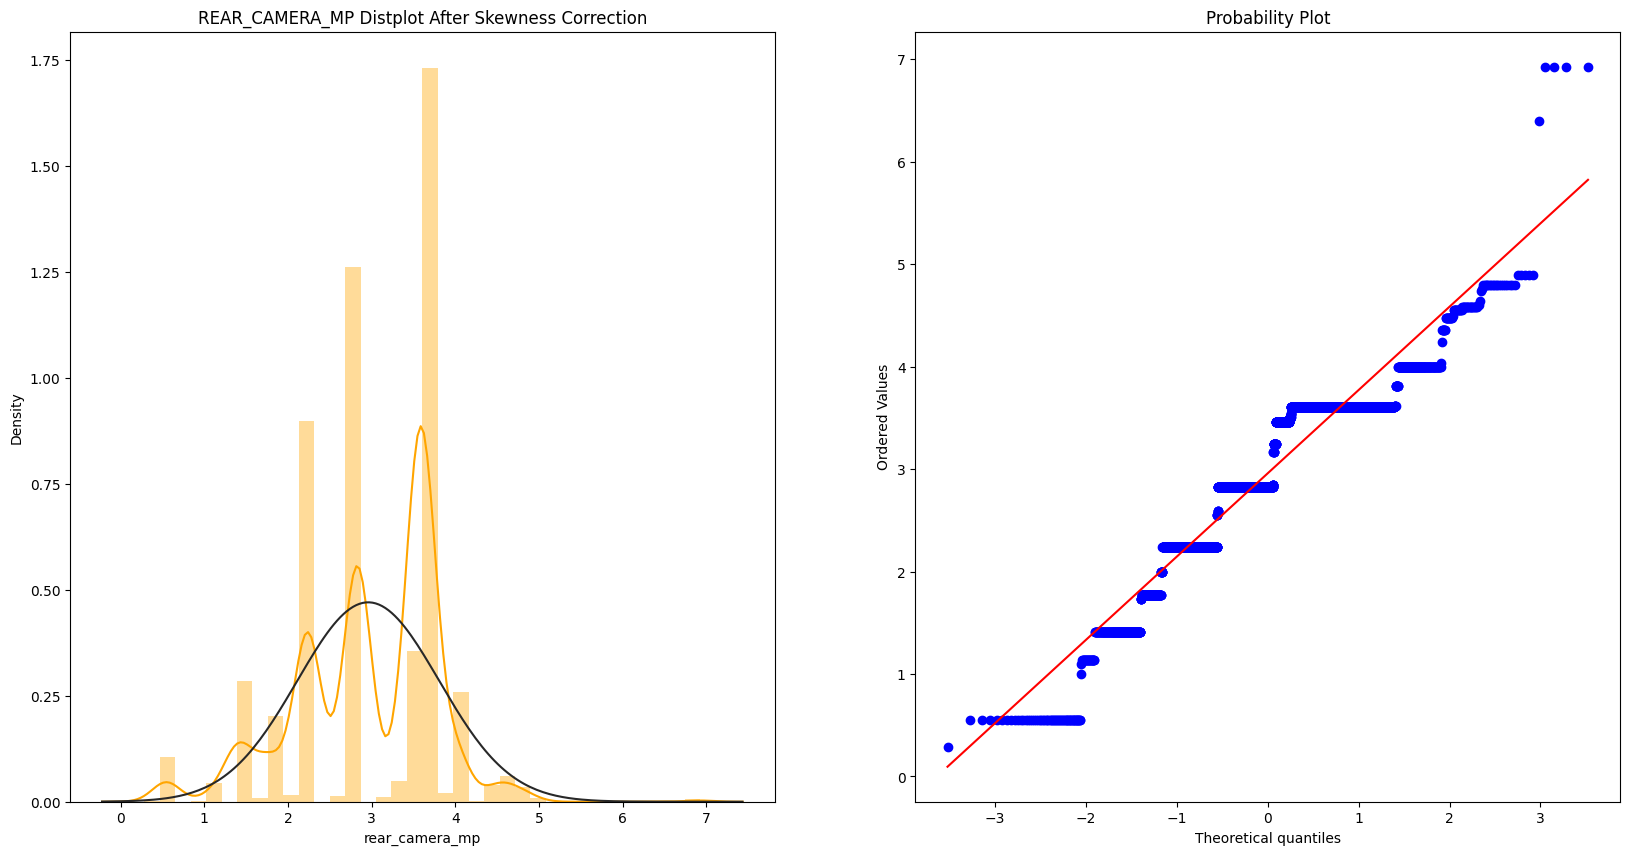

After Correcting
Mu after correcting FRONT_CAMERA_MP : 1.526814487656646, Sigma after correcting FRONT_CAMERA_MP : 0.8193688155070813


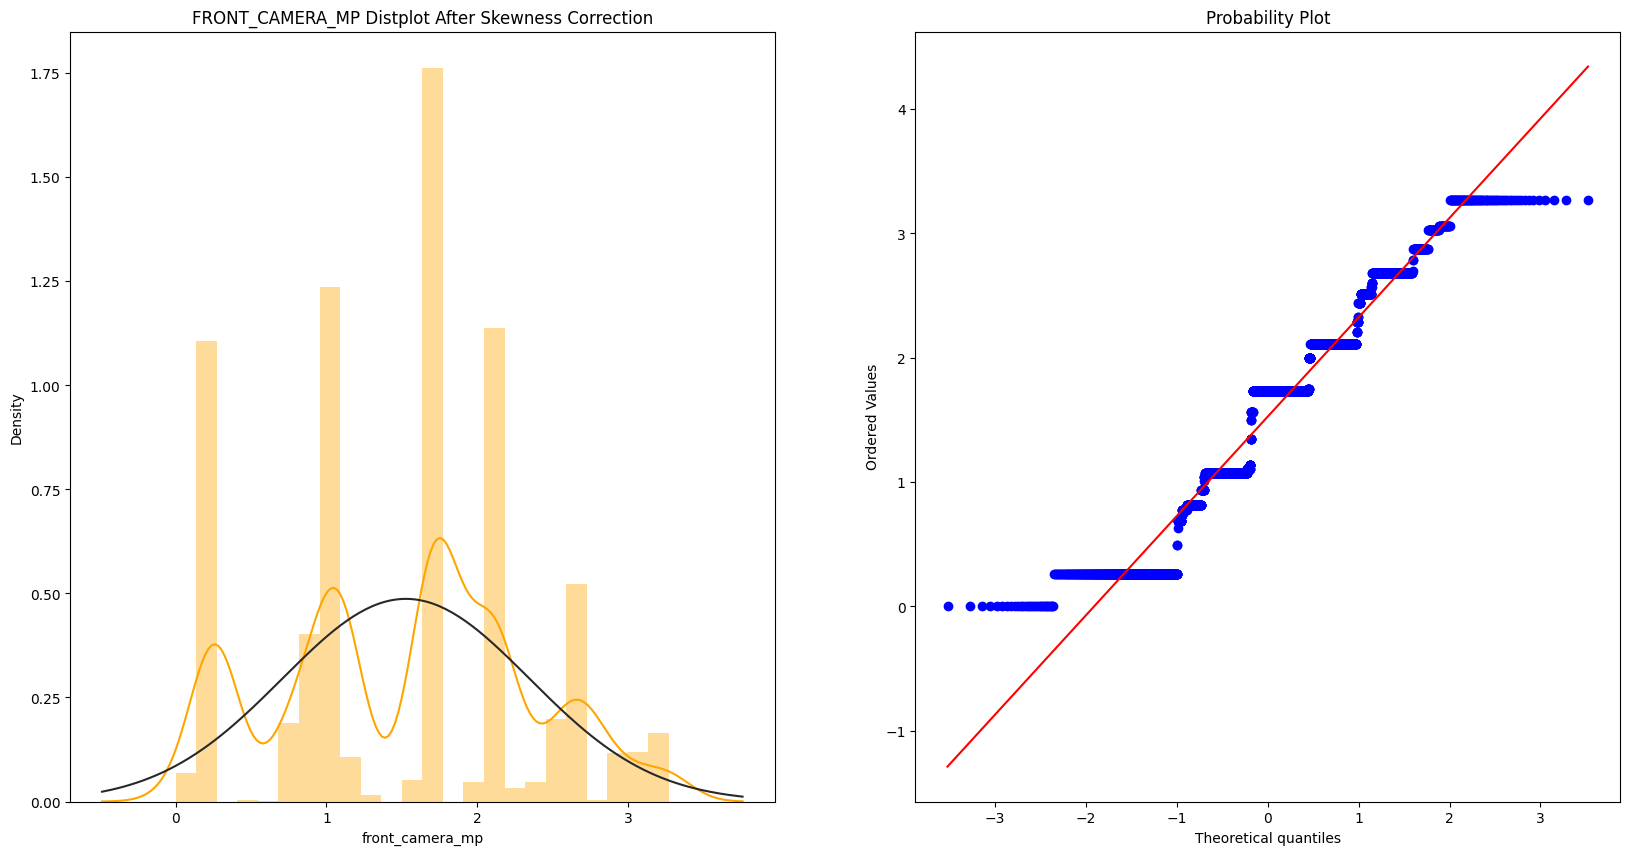

After Correcting
Mu after correcting BATTERY : 9.140953964131787, Sigma after correcting BATTERY : 0.5274075304905204


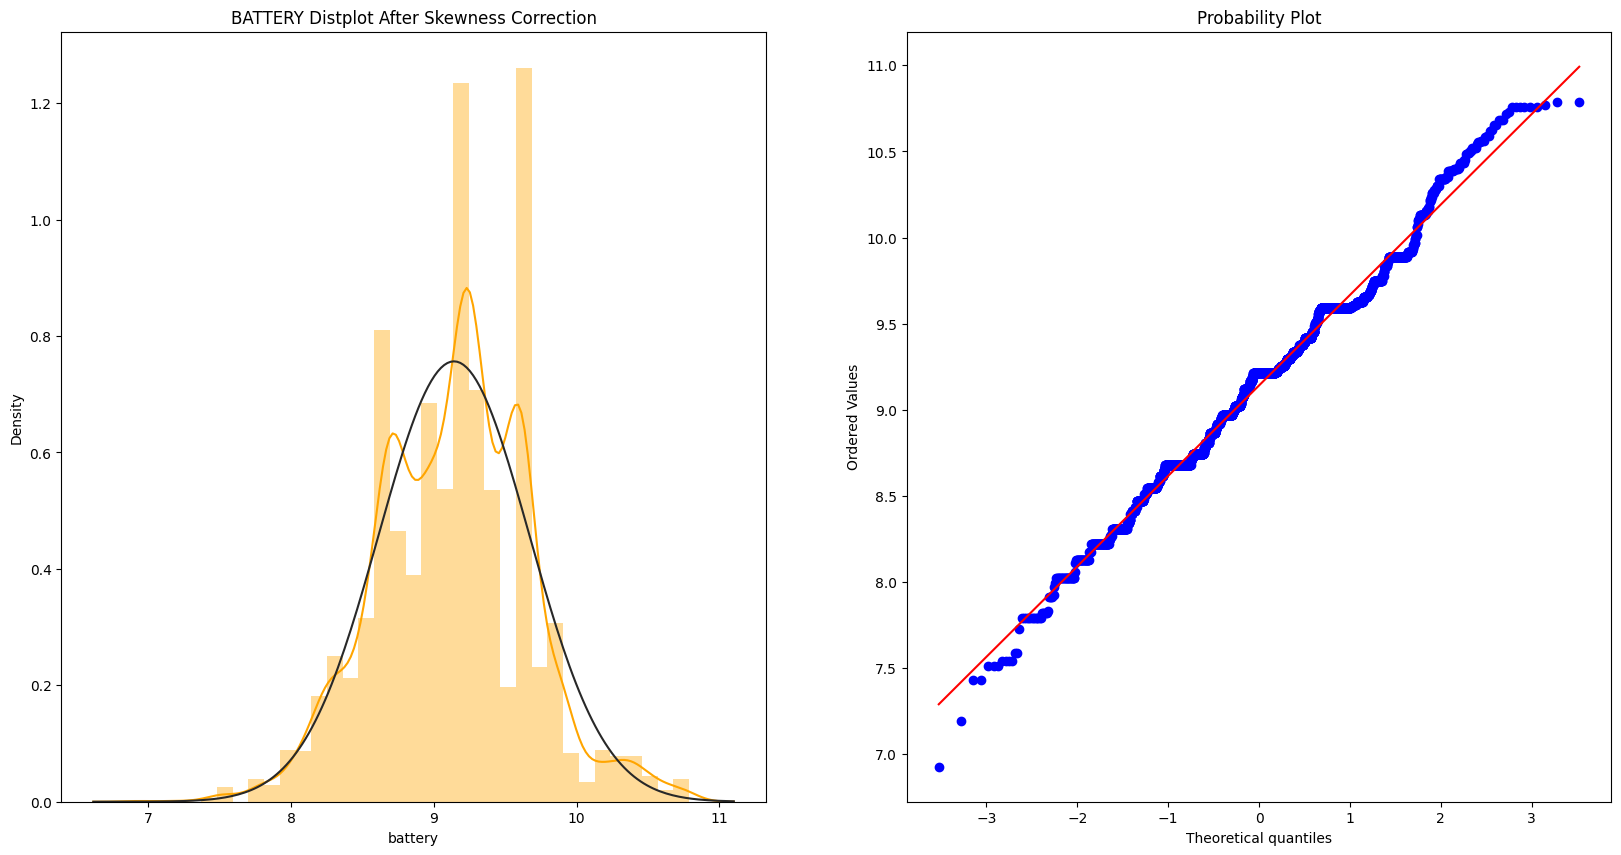

After Correcting
Mu after correcting WEIGHT : 0.006213180426972396, Sigma after correcting WEIGHT : 0.0017488702471315902


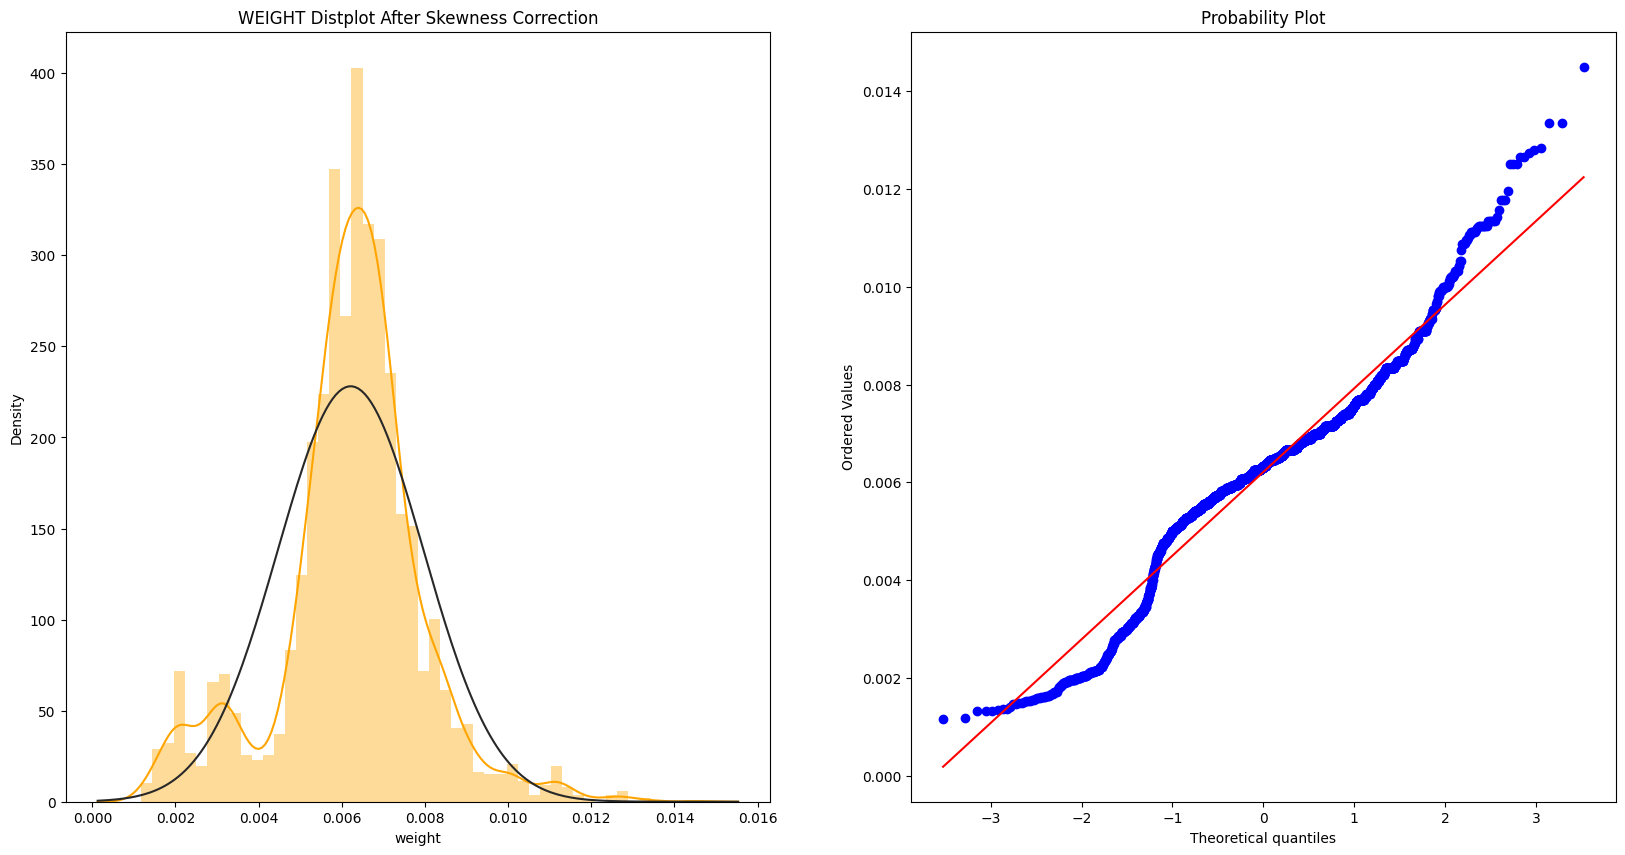

In [ ]:
skewColumnList1 = ['screen_size','rear_camera_mp','front_camera_mp','battery','weight']
for columns in skewColumnList1:
    skweness_correction(columns)

# Dropping Outliers

In [ ]:
len(detect_outliers(cols))

435

In [ ]:
data = data.drop(detect_outliers(cols),axis = 0).reset_index(drop = True)

In [ ]:
data.shape[0]

2818

# Encoding categorical features

In [ ]:
data = data.drop(['os','device_brand'],axis=1)

In [ ]:
data.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  ram  \
0     3.720275   1   0        3.605551         1.731322             64.0  3.0   
1     4.023023   1   1        3.605551         2.684077            128.0  8.0   
2     3.960345   1   1        3.605551         2.106805            128.0  8.0   
3     3.813117   1   0        3.605551         2.106805             64.0  3.0   
4     3.911944   1   0        3.605551         2.106805             64.0  4.0   

    battery    weight  release_year  days_used  normalized_used_price  \
0  9.219593  0.006849          2020        127               4.307572   
1  9.687111  0.004695          2020        325               5.162097   
2  9.655801  0.004695          2020        162               5.111084   
3  9.888401  0.005405          2020        293               4.389995   
4  9.590962  0.005682          2020        223               4.413889   

   normalized_new_price  Device_Brand  
0              4.715100      4.683326  
1              5.519018      4.683326  
2              5.884631      4.683326  
3              4.947837      4.683326  
4              5.060694      4.683326

In [ ]:
dummies_year = pd.get_dummies(data['release_year'],drop_first=True)
data = pd.concat([data,dummies_year],axis=1)
data = data.drop('release_year',axis=1)

In [ ]:
data.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  ram  \
0     3.720275   1   0        3.605551         1.731322             64.0  3.0   
1     4.023023   1   1        3.605551         2.684077            128.0  8.0   
2     3.960345   1   1        3.605551         2.106805            128.0  8.0   
3     3.813117   1   0        3.605551         2.106805             64.0  3.0   
4     3.911944   1   0        3.605551         2.106805             64.0  4.0   

    battery    weight  days_used  normalized_used_price  normalized_new_price  \
0  9.219593  0.006849        127               4.307572              4.715100   
1  9.687111  0.004695        325               5.162097              5.519018   
2  9.655801  0.004695        162               5.111084              5.884631   
3  9.888401  0.005405        293               4.389995              4.947837   
4  9.590962  0.005682        223               4.413889              5.060694   

   Device_Brand   2014   2015   2016   2017   2018   2019  2020  
0      4.683326  False  False  False  False  False  False  True  
1      4.683326  False  False  False  False  False  False  True  
2      4.683326  False  False  False  False  False  False  True  
3      4.683326  False  False  False  False  False  False  True  
4      4.683326  False  False  False  False  False  False  True

In [ ]:
Y = data['normalized_used_price']
X = data.loc[:, data.columns != 'normalized_used_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
X_train.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
206      3.815335   1   0        2.828427         2.684077             64.0   
2037     3.171335   1   0        2.236068         1.075690             32.0   
1824     3.502049   0   0        3.605551         1.075690             16.0   
2029     3.524854   1   0        4.000000         1.731322             32.0   
2441     3.518543   1   0        3.605551         1.731322             16.0   

      ram   battery    weight  days_used  normalized_new_price  Device_Brand  \
206   4.0  9.590962  0.005051        517              5.772655      4.322144   
2037  4.0  8.805268  0.006494        882              5.393628      4.510090   
1824  4.0  8.971908  0.007092       1089              5.473195      4.282206   
2029  4.0  9.232594  0.006623       1048              5.942537      4.510090   
2441  4.0  9.253990  0.005405        980              4.941857      4.630935   

       2014   2015   2016   2017   2018   2019   2020  
206   False  False  False  False  False   True  False  
2037  False   True  False  False  False  False  False  
1824   True  False  False  False  False  False  False  
2029  False   True  False  False  False  False  False  
2441  False   True  False  False  False  False  False

In [ ]:
X_train.columns

Index([         'screen_size',                   '4g',                   '5g',
             'rear_camera_mp',      'front_camera_mp',      'internal_memory',
                        'ram',              'battery',               'weight',
                  'days_used', 'normalized_new_price',         'Device_Brand',
                         2014,                   2015,                   2016,
                         2017,                   2018,                   2019,
                         2020],
      dtype='object')

# Scaling features

In [ ]:
sc=StandardScaler()
X_train.iloc[:,[0,3,4,5,6,7,8,9,10,11]]=sc.fit_transform(X_train.iloc[:,[0,3,4,5,6,7,8,9,10,11]])
X_test.iloc[:,[0,3,4,5,6,7,8,9,10,11]]=sc.fit_transform(X_test.iloc[:,[0,3,4,5,6,7,8,9,10,11]])

In [ ]:
X_test.shape[0]

846

In [ ]:
X_train.head()

screen_size  4g  5g  rear_camera_mp  front_camera_mp  internal_memory  \
206      0.966499   1   0       -0.343085         1.322530         0.218023   
2037    -1.463198   1   0       -1.117681        -0.661686        -0.248495   
1824    -0.215474   0   0        0.673119        -0.661686        -0.481754   
2029    -0.129433   1   0        1.188919         0.147146        -0.248495   
2441    -0.153245   1   0        0.673119         0.147146        -0.481754   

          ram   battery    weight  days_used  normalized_new_price  \
206  -0.10769  1.097924 -1.026277  -0.724345              0.827879   
2037 -0.10769 -0.768738  0.130485   0.793385              0.202005   
1824 -0.10769 -0.372832  0.610418   1.654125              0.333391   
2029 -0.10769  0.246509  0.233904   1.483641              1.108398   
2441 -0.10769  0.297343 -0.741776   1.200885             -0.543988   

      Device_Brand   2014   2015   2016   2017   2018   2019   2020  
206      -0.213414  False  False  False  False  False   True  False  
2037      0.478266  False   True  False  False  False  False  False  
1824     -0.360393   True  False  False  False  False  False  False  
2029      0.478266  False   True  False  False  False  False  False  
2441      0.923002  False   True  False  False  False  False  False

# Linear Regression Model

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)

# Convert categorical variables to numerical (if any)
X_train = pd.get_dummies(X_train, drop_first=True)

# Ensure target variable is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Remove any NaN values from target and features
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep matching indices

# Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predictions
X_train_Prediction = linear_model.predict(X_train)

# Metrics
print("MSE:", mean_squared_error(y_train, X_train_Prediction))
print("R2 Score:", r2_score(y_train, X_train_Prediction))

# Store scores
linear_model_score = r2_score(y_train, X_train_Prediction)
linear_model_ms = mean_squared_error(y_train, X_train_Prediction)


MSE: 0.04747644575672615
R2 Score: 0.8073472801847509


In [ ]:
from sklearn.model_selection import cross_val_score

# Ensure column names are strings
X_train.columns = X_train.columns.astype(str)

# Convert categorical variables to numerical (if any)
X_train = pd.get_dummies(X_train, drop_first=True)

# Ensure target variable is numeric
y_train = pd.to_numeric(y_train, errors='coerce')

# Remove any NaN values from features and target
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Ensure indices match

# Initialize and train model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Cross-validation
cross_linear = cross_val_score(linear_model, X_train, y_train, scoring="neg_mean_squared_error", cv=5)

# Compute mean cross-validation score
mean_cross_linear = np.mean(cross_linear)
print("Mean Cross-Validation Score:", mean_cross_linear)


Mean Cross-Validation Score: -0.04884531697606337


# Ridge Regression Model

In [ ]:
ridge_model = Ridge()
ridge_model.fit(X_train,y_train)
X_train_pred_ridge = ridge_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_ridge))
print("R2 Score : ",r2_score(y_train,X_train_pred_ridge))
ridge_model_score=r2_score(y_train,X_train_pred_ridge)
ridge_model_ms=mean_squared_error(y_train,X_train_pred_ridge)

MSE :  0.04747662315927708
R2 Score :  0.8073465603102238


In [ ]:
cross_ridge = cross_val_score(ridge_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_ridge = np.mean(cross_ridge)
print(mean_cross_ridge)
ridge_model_cval=cross_val_score(ridge_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

-0.048832516656568715


# SVM Regressor

In [ ]:
svmreg_model = SVR()
svmreg_model.fit(X_train,y_train)
X_train_pred_svmreg = svmreg_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_svmreg))
print("R2 Score : ",r2_score(y_train,X_train_pred_svmreg))
svm_model_score=r2_score(y_train,X_train_pred_svmreg)
svm_model_ms=mean_squared_error(y_train,X_train_pred_svmreg)

MSE :  0.033478659430736385
R2 Score :  0.8641483225566429


In [ ]:
cross_svmreg = cross_val_score(svmreg_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_svmreg = np.mean(cross_svmreg)
print(mean_cross_svmreg)
svm_model_cval=cross_val_score(svmreg_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

-0.05471329956246338


# DecisionTree Regressor

In [ ]:
dtree_model = DecisionTreeRegressor(max_depth=10)
dtree_model.fit(X_train,y_train)
X_train_pred_dtree = dtree_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_dtree))
print("R2 Score : ",r2_score(y_train,X_train_pred_dtree))
dtree_model_score=r2_score(y_train,X_train_pred_dtree)
dtree_model_ms=mean_squared_error(y_train,X_train_pred_dtree)

MSE :  0.01694584609269659
R2 Score :  0.9312361469504887


In [ ]:
cross_dtree = cross_val_score(dtree_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_dtree = np.mean(cross_dtree)
print(mean_cross_dtree)
dtree_model_cval=cross_val_score(dtree_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

-0.081512959451755


# RandomForest Regressor

In [ ]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
X_train_pred_rfr = rfr_model.predict(X_train)
print("MSE : ",mean_squared_error(y_train,X_train_pred_rfr))
print("R2 Score : ",r2_score(y_train,X_train_pred_rfr))
rfr_model_score=r2_score(y_train,X_train_pred_rfr)
rfr_model_ms=mean_squared_error(y_train,X_train_pred_rfr)

MSE :  0.007106825879694109
R2 Score :  0.9711615030747642


In [ ]:
cross_rfr = cross_val_score(rfr_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_cross_rfr = np.mean(cross_rfr)
print(mean_cross_rfr)
rfr_model_cval=cross_val_score(rfr_model,X_train,y_train,scoring="neg_mean_squared_error",cv=5)

-0.051012337885335324


In [ ]:
# Ensure all feature names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Convert categorical variables to numerical (if any)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Ensure both datasets have the same columns
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Ensure target variable is numeric
y_test = pd.to_numeric(y_test, errors='coerce')

# Make predictions
X_test_pred_rfr = rfr_model.predict(X_test)

# Compute metrics
print("MSE : ", mean_squared_error(y_test, X_test_pred_rfr))
print("R2 Score : ", r2_score(y_test, X_test_pred_rfr))


MSE :  0.05238448663784954
R2 Score :  0.7837075024759093


# Comparing R2 score of models

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


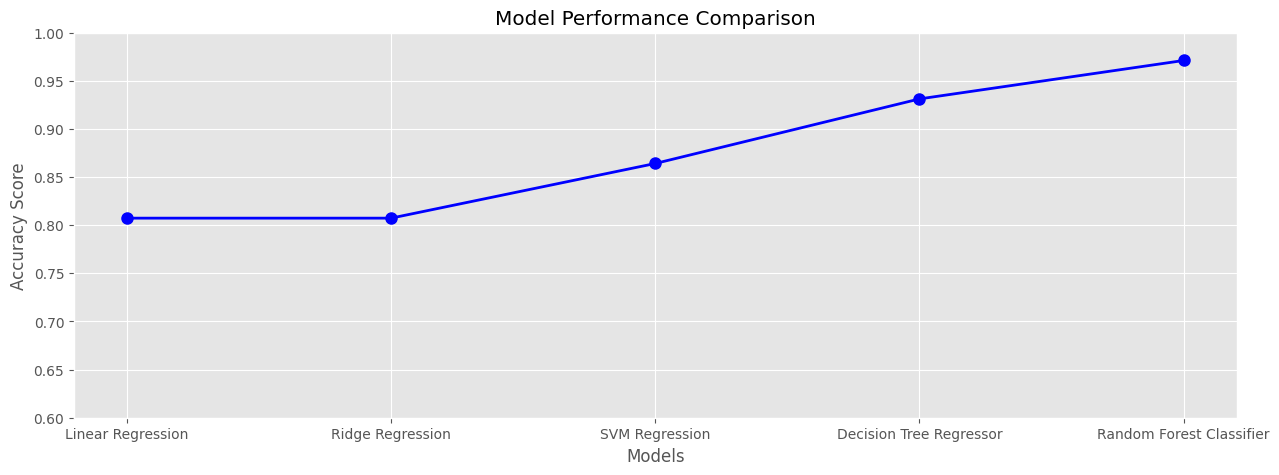

In [ ]:
import matplotlib.pyplot as plt

# Check available styles and choose a valid one
print(plt.style.available)  # Run this to see valid styles in your environment

# Use a default style that exists
plt.style.use('ggplot')  # Alternative: 'bmh', 'classic', 'fivethirtyeight'

# Create the plot
plt.figure(figsize=(15, 5))
models = ['Linear Regression', 'Ridge Regression', 'SVM Regression', 'Decision Tree Regressor', "Random Forest Classifier"]
test_accuracy = [linear_model_score, ridge_model_score, svm_model_score, dtree_model_score, rfr_model_score]

plt.plot(models, test_accuracy, '-o', color='b', marker='o', markersize=8, linewidth=2)
plt.ylim(0.60, 1.0)
plt.ylabel("Accuracy Score")
plt.xlabel("Models")
plt.title("Model Performance Comparison")
plt.grid(True)
plt.show()


# Comparing Mean square error of the models

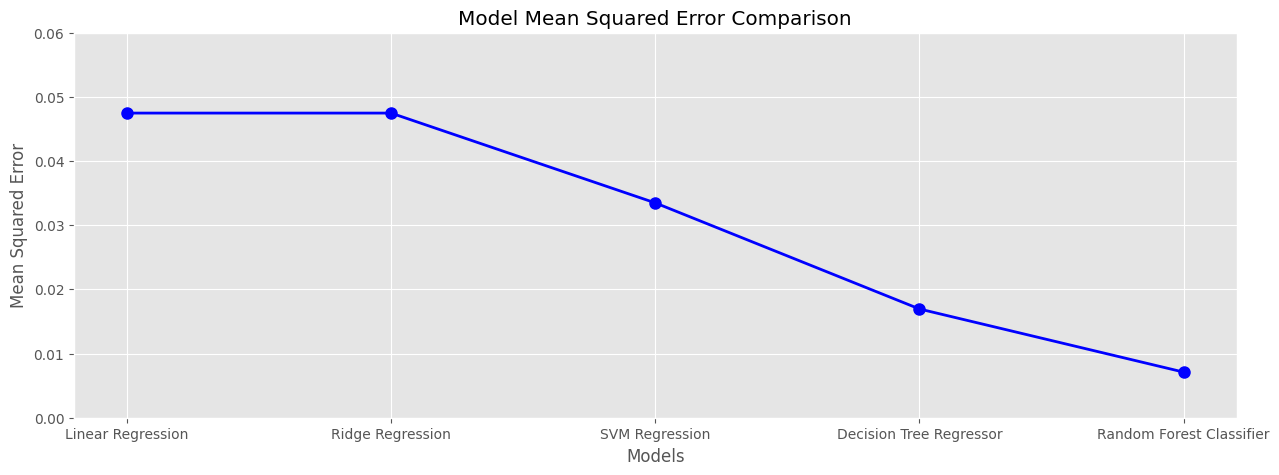

In [ ]:
import matplotlib.pyplot as plt

# Use a built-in style that is available
plt.style.use('ggplot')  # Alternative: 'bmh', 'classic', 'fivethirtyeight'

# Plot
plt.figure(figsize=(15, 5))
models = ['Linear Regression', 'Ridge Regression', 'SVM Regression', 'Decision Tree Regressor', "Random Forest Classifier"]
test_accuracy = [linear_model_ms, ridge_model_ms, svm_model_ms, dtree_model_ms, rfr_model_ms]

plt.plot(models, test_accuracy, '-o', color='b', marker='o', markersize=8, linewidth=2)
plt.ylim(0.0, 0.06)
plt.ylabel("Mean Squared Error")
plt.xlabel("Models")
plt.title("Model Mean Squared Error Comparison")
plt.grid(True)
plt.show()


# Conclusion

## Random Forest performs the best for the given problem

In [ ]:
pk.dump(rfr_model,open("Price_Predictor.pkl",'wb'))

In [ ]:
pk.dump(sc,open("Scaler.pkl",'wb'))

In [ ]:
# Reverse the mapping of median price to device brand
reversed_brand_dict = {v: k for k, v in brand_dict.items()}

# Print the reversed mapping in a vertical list
for price, brand in reversed_brand_dict.items():
    print(f"Median Price: {price} -> Device Brand: {brand}")



Median Price: 4.294424174 -> Device Brand: Acer
Median Price: 4.026422546 -> Device Brand: Alcatel
Median Price: 5.011901159 -> Device Brand: Apple
Median Price: 4.4673986215 -> Device Brand: Asus
Median Price: 4.2931666795000005 -> Device Brand: BlackBerry
Median Price: 3.116621591 -> Device Brand: Celkon
Median Price: 4.243339115 -> Device Brand: Coolpad
Median Price: 4.349177705 -> Device Brand: Gionee
Median Price: 4.870146421 -> Device Brand: Google
Median Price: 4.432936787999999 -> Device Brand: HTC
Median Price: 4.6833263 -> Device Brand: Honor
Median Price: 4.69015451 -> Device Brand: Huawei
Median Price: 3.654546775 -> Device Brand: Karbonn
Median Price: 4.322143925 -> Device Brand: LG
Median Price: 3.9323964145000003 -> Device Brand: Lava
Median Price: 4.423648309 -> Device Brand: Lenovo
Median Price: 4.533451438 -> Device Brand: Meizu
Median Price: 3.867443962 -> Device Brand: Micromax
Median Price: 4.195245147 -> Device Brand: Microsoft
Median Price: 4.38256042 -> Device B

In [ ]:
# Assuming the scaler was fitted on a pandas DataFrame and has the column names
print("Features the scaler is trained on:")
print(scaler.feature_names_in_)


Features the scaler is trained on:
['screen_size' 'rear_camera_mp' 'front_camera_mp' 'internal_memory' 'ram'
 'battery' 'weight' 'days_used' 'normalized_new_price' 'Device_Brand']


In [ ]:
import pickle
import pandas as pd

# Load the trained scaler
scaler = pickle.load(open('Scaler.pkl', 'rb'))

# Example iPhone 12 data (adjust the actual price accordingly)
iphone_12_data = {
    'screen_size': 6.1,
    'rear_camera_mp': 12,
    'front_camera_mp': 12,
    'internal_memory': 64,  # 64 GB
    'ram': 4,  # 4 GB
    'battery': 2815,  # mAh
    'weight': 164,  # grams
    'days_used': 100,  # days
    'Device_Brand': 'Apple',  # This will be converted to a median price
    'new_price': 699  # Actual price in USD
}

# Convert to DataFrame
iphone_12_df = pd.DataFrame([iphone_12_data])

# The median prices of each device brand (from your previous groupby step)
brand_dict = {
    'Acer': 4.294424174,
    'Alcatel': 4.026422546,
    'Apple': 5.011901159,
    'Asus': 4.4673986215,
    'BlackBerry': 4.2931666795000005,
    'Celkon': 3.116621591,
    'Coolpad': 4.243339115,
    'Gionee': 4.349177705,
    'Google': 4.870146421,
    'HTC': 4.432936787999999,
    'Honor': 4.6833263,
    'Huawei': 4.69015451,
    'Karbonn': 3.654546775,
    'LG': 4.322143925,
    'Lava': 3.9323964145000003,
    'Lenovo': 4.423648309,
    'Meizu': 4.533451438,
    'Micromax': 3.867443962,
    'Microsoft': 4.195245147,
    'Motorola': 4.38256042,
    'Nokia': 4.052654135,
    'OnePlus': 4.679163866,
    'Oppo': 4.69701984,
    'Others': 4.2107191964999995,
    'Panasonic': 4.282206299,
    'Realme': 4.668802046,
    'Samsung': 4.51008998,
    'Sony': 4.527100531,
    'Spice': 3.6704561995000002,
    'Vivo': 4.761831996,
    'XOLO': 3.947337803,
    'Xiaomi': 4.630935394,
    'ZTE': 4.360214212500001
}

# Calculate the normalized new price (price divided by the median price for the brand)
iphone_12_df['normalized_new_price'] = iphone_12_df['new_price'] / brand_dict[iphone_12_df['Device_Brand'][0]]

# Drop the 'new_price' column as we will use 'normalized_new_price' for prediction
iphone_12_df = iphone_12_df.drop(columns=['new_price'])

# Replace 'Device_Brand' with the median price for the Apple brand (from the previous steps)
iphone_12_df['Device_Brand'] = brand_dict[iphone_12_df['Device_Brand'][0]]

# Ensure the column order matches the model's expected feature order
expected_features = [
    'screen_size', 'rear_camera_mp', 'front_camera_mp', 'internal_memory', 'ram',
    'battery', 'weight', 'days_used', 'normalized_new_price', 'Device_Brand'
]

# Create the year columns (assuming the iPhone 12 is released in 2020)
for year in range(2014, 2021):
    iphone_12_df[str(year)] = 1 if year == 2020 else 0  # Set 2020 as 1, others as 0

# Reorder the DataFrame to match the model's expected feature order
iphone_12_df = iphone_12_df[expected_features]

# Scale the features using the loaded scaler
iphone_12_scaled = scaler.transform(iphone_12_df)

# Save the scaled data for use in the second block
import pickle
with open('iphone_12_scaled.pkl', 'wb') as f:
    pickle.dump(iphone_12_scaled, f)

# Output the scaled data to check
print("Scaled iPhone 12 data:")
print(iphone_12_scaled)


Scaled iPhone 12 data:
[[ 9.69889623e+00  1.17573127e+01  1.29834145e+01  1.71998900e-01
  -3.21796406e-02  6.78145559e+03  1.30949581e+05 -2.61204487e+00
   2.26383394e+02  2.23185892e+00]]


In [ ]:
import pickle
import numpy as np

# Load the trained regressor model and scaled iPhone 12 data
rfr_model = pickle.load(open('Price_Predictor.pkl', 'rb'))
with open('iphone_12_scaled.pkl', 'rb') as f:
    iphone_12_scaled = pickle.load(f)

# Add the missing features (years) manually since they are not part of the scaling process
iphone_12_year_features = {
    '2014': 0, '2015': 0, '2016': 0, '2017': 0, '2018': 0, '2019': 0, '2020': 1
}

# Convert iphone_12_year_features to a NumPy array
iphone_12_year_array = np.array([list(iphone_12_year_features.values())])

# Concatenate the scaled features with the year features
final_features = np.concatenate([iphone_12_scaled, iphone_12_year_array], axis=1)

# Make the prediction using the Random Forest Regressor model
predicted_price = rfr_model.predict(final_features)

# Output the predicted price
print(f"Predicted Price of iPhone 12: ${predicted_price[0]:.2f}")


ValueError: X has 17 features, but RandomForestRegressor is expecting 19 features as input.